In [1]:
from helpers import load_all_data, vectorized_flatten, sigmoid, get_log_loss, get_accuracy, sigmoid_derivative, gradient_update, get_loss_plot, plot_loss
import numpy as np


In [2]:
X_train, y_train, X_dev, y_dev, X_test, y_test = load_all_data("../setup/data")

In [3]:
h1 = 32
lr = 0.1

In [4]:
def initialize(X): 

    
    dim1 = 1/np.sqrt(X.shape[0])
    W1 = dim1 * np.random.randn(h1, 28**2)
    
    dim2 = 1/np.sqrt(W1.shape[1])
    W2 = dim2 * np.random.randn(1, h1)
    
    b1 = np.zeros((h1, 1))
    b2 = np.zeros((1, 1))
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [5]:
def forward_pass(X, weights, biases):

    W1, W2 = weights
    b1, b2 = biases
    
    z1 = W1 @ X + b1
    a1 = sigmoid(z1)
    
    z2 = W2 @ a1 + b2
    a2 = sigmoid(z2)
    
    
    
    activations = (z1, a1, z2, a2)
    
    return activations

In [9]:
def backpropagation(X, y, weights, biases, activations):
    
    W1, W2 = weights
    b1, b2 = biases
    z1, a1, z2, a2 = activations
    m = y.shape[1]
    #print(m)   
    dz2 = a2 - y
    #print("dz3", dz3.shape)
    
   
    dW2 = np.dot(dz2, a1.T)/m
    #print("dW2", dW2.shape)
    
    db2 = np.sum(dz2, axis=1).reshape(-1, 1)/m
    #print("db2", db2.shape)
    
    da1 = np.dot(W2.T, dz2)
    #print("da1", da1.shape)
    
    dz1 = da1 * sigmoid_derivative(z1)
    #print("dz1", dz1.shape)
    
    dW1 = np.dot(dz1, X.T)/m
    #print("dW1", dW1.shape)
    
    db1 = np.sum(dz1, axis=1).reshape(-1, 1)/m
    #print("db1", db1.shape)
    
    return db1, dW1, db2, dW2

In [7]:
def update_parameters(weights, biases, gradients, learning_rate):
    
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    
    W1 = gradient_update(W1, learning_rate, dW1)
    W2 = gradient_update(W2, learning_rate, dW2)
   
    b1 = gradient_update(b1, learning_rate, db1)
    b2 = gradient_update(b2, learning_rate, db2)
    
    weights = (W1, W2)
    biases = (b1, b2)
    
    return weights, biases

In [8]:
X_train_flattened = vectorized_flatten(X_train)
X_dev_flattened = vectorized_flatten(X_dev)
X_test_flattened = vectorized_flatten(X_test)

y_train = y_train.reshape(1, -1)
y_dev = y_dev.reshape(1, -1)
y_test = y_test.reshape(1, -1)



In [10]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
    
}
def batch_training_without_momentum(batch_size,weights,biases,history,X,y):
    offset = 0
    for epoch in range(epochs):
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        while offset <max(y_train.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y_train.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            

            activations = forward_pass(X_batch, weights, biases)
            gradients = backpropagation(X_batch, y_batch, weights, biases, activations)

            
            weights, biases = update_parameters(weights, biases, gradients, lr)
            offset = offset+batch_size
        activations_full = forward_pass(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        #print(y,y_prob)
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["accuracies"].append(accuracy)

        if np.isnan(loss):
            break

        print("loss after epoch: ",epoch,": ",loss)
    return history

# 3.4.1 (a) full batch without momentum

In [11]:
history = batch_training_without_momentum(max(y_train.shape),weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
loss after epoch:  0 :  8379.13565306225
epoch : 1  batch: 0
loss after epoch:  1 :  8354.040951243502
epoch : 2  batch: 0
loss after epoch:  2 :  8336.597506282234
epoch : 3  batch: 0
loss after epoch:  3 :  8323.64758362845
epoch : 4  batch: 0
loss after epoch:  4 :  8313.32294410543
epoch : 5  batch: 0
loss after epoch:  5 :  8304.517427165458
epoch : 6  batch: 0
loss after epoch:  6 :  8296.574206585146
epoch : 7  batch: 0
loss after epoch:  7 :  8289.100916116251
epoch : 8  batch: 0
loss after epoch:  8 :  8281.860632289528
epoch : 9  batch: 0
loss after epoch:  9 :  8274.707710818293
epoch : 10  batch: 0
loss after epoch:  10 :  8267.550076137268
epoch : 11  batch: 0
loss after epoch:  11 :  8260.327081276493
epoch : 12  batch: 0
loss after epoch:  12 :  8252.99651887163
epoch : 13  batch: 0
loss after epoch:  13 :  8245.527004730957
epoch : 14  batch: 0
loss after epoch:  14 :  8237.893513150531
epoch : 15  batch: 0
loss after epoch:  15 :  8230.07476018051
e

loss after epoch:  133 :  4591.392758022334
epoch : 134  batch: 0
loss after epoch:  134 :  4560.054145937281
epoch : 135  batch: 0
loss after epoch:  135 :  4529.031295096418
epoch : 136  batch: 0
loss after epoch:  136 :  4498.321524875302
epoch : 137  batch: 0
loss after epoch:  137 :  4467.922160794726
epoch : 138  batch: 0
loss after epoch:  138 :  4437.830542940922
epoch : 139  batch: 0
loss after epoch:  139 :  4408.044033093945
epoch : 140  batch: 0
loss after epoch:  140 :  4378.560020658004
epoch : 141  batch: 0
loss after epoch:  141 :  4349.375927486717
epoch : 142  batch: 0
loss after epoch:  142 :  4320.489211694705
epoch : 143  batch: 0
loss after epoch:  143 :  4291.897370544881
epoch : 144  batch: 0
loss after epoch:  144 :  4263.597942498315
epoch : 145  batch: 0
loss after epoch:  145 :  4235.588508510521
epoch : 146  batch: 0
loss after epoch:  146 :  4207.866692654789
epoch : 147  batch: 0
loss after epoch:  147 :  4180.430162149583
epoch : 148  batch: 0
loss after

In [12]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9415
best loss: 3112.21596122422
best epoch: 198


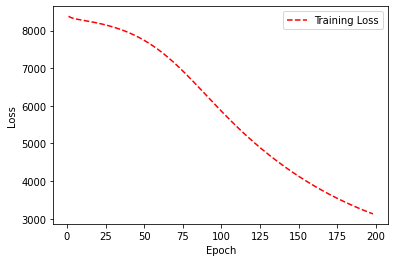

In [13]:
plot_loss("loss.png", history["losses"][:-2])

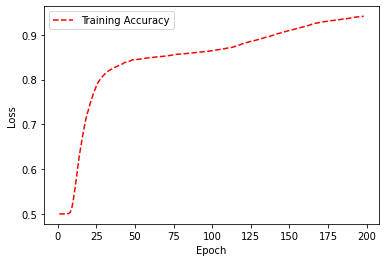

In [14]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (b) stochastic without momentum 

In [14]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(1,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  10852.87901100449
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  21438.2783257501
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  6899.718607042584
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch :

/Users/sarthak/intro-dl/src/helpers.py:137: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 4  batch: 4000
epoch : 4  batch: 5000
epoch : 4  batch: 6000
epoch : 4  batch: 7000
epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  12713.31491482382
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  14184.924885838314
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  8675.334844275094
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
epoch : 7  batch: 4000
epoch : 7  batch: 5000
ep

epoch : 29  batch: 6000
epoch : 29  batch: 7000
epoch : 29  batch: 8000
epoch : 29  batch: 9000
epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  7136.174689551746
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 30  batch: 7000
epoch : 30  batch: 8000
epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  7975.721134412976
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  46042.20728036162
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch : 32  batch: 3000
epoch : 32  batch: 4000
epoch : 32  batch: 5000
epoch : 32

epoch : 54  batch: 4000
epoch : 54  batch: 5000
epoch : 54  batch: 6000
epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  7980.747328177039
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  10379.945406620021
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  9195.179258635637
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 5

epoch : 79  batch: 2000
epoch : 79  batch: 3000
epoch : 79  batch: 4000
epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  8031.406769021016
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  8510.353356511261
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  7526.552311413585
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82

loss after epoch:  103 :  6963.045563515421
epoch : 104  batch: 0
epoch : 104  batch: 1000
epoch : 104  batch: 2000
epoch : 104  batch: 3000
epoch : 104  batch: 4000
epoch : 104  batch: 5000
epoch : 104  batch: 6000
epoch : 104  batch: 7000
epoch : 104  batch: 8000
epoch : 104  batch: 9000
epoch : 104  batch: 10000
epoch : 104  batch: 11000
loss after epoch:  104 :  6979.134269696635
epoch : 105  batch: 0
epoch : 105  batch: 1000
epoch : 105  batch: 2000
epoch : 105  batch: 3000
epoch : 105  batch: 4000
epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  6946.909702857431
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 100

loss after epoch:  127 :  6834.07140265664
epoch : 128  batch: 0
epoch : 128  batch: 1000
epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5000
epoch : 128  batch: 6000
epoch : 128  batch: 7000
epoch : 128  batch: 8000
epoch : 128  batch: 9000
epoch : 128  batch: 10000
epoch : 128  batch: 11000
loss after epoch:  128 :  6867.498376296966
epoch : 129  batch: 0
epoch : 129  batch: 1000
epoch : 129  batch: 2000
epoch : 129  batch: 3000
epoch : 129  batch: 4000
epoch : 129  batch: 5000
epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
loss after epoch:  129 :  6898.543781425185
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 1000

loss after epoch:  151 :  7043.606643168841
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  7138.1136452928495
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2000
epoch : 153  batch: 3000
epoch : 153  batch: 4000
epoch : 153  batch: 5000
epoch : 153  batch: 6000
epoch : 153  batch: 7000
epoch : 153  batch: 8000
epoch : 153  batch: 9000
epoch : 153  batch: 10000
epoch : 153  batch: 11000
loss after epoch:  153 :  7140.315217674595
epoch : 154  batch: 0
epoch : 154  batch: 1000
epoch : 154  batch: 2000
epoch : 154  batch: 3000
epoch : 154  batch: 4000
epoch : 154  batch: 5000
epoch : 154  batch: 6000
epoch : 154  batch: 7000
epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10

loss after epoch:  175 :  7337.286328643371
epoch : 176  batch: 0
epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  7208.619374948967
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
loss after epoch:  177 :  7365.968558188006
epoch : 178  batch: 0
epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 8000
epoch : 178  batch: 9000
epoch : 178  batch: 100

loss after epoch:  199 :  7333.732366686096


In [15]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.96825
best loss: 6141.352900597695
best epoch: 70


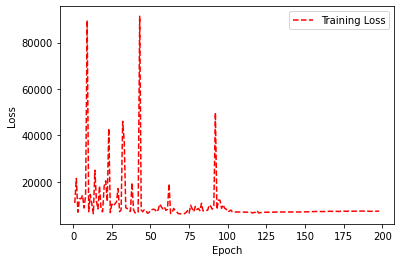

In [16]:
plot_loss("loss.png", history["losses"][:-2])

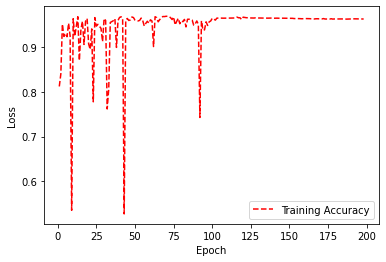

In [17]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (c) minibatch without momentum


In [15]:
weights, biases = initialize(X_train_flattened)
epochs = 200

history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": []
}

history = batch_training_without_momentum(100,weights,biases,history,X_train_flattened,y_train)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  5012.122438489083
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  2603.581840686552
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1959.3215175798452
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch

epoch : 26  batch: 10000
epoch : 26  batch: 11000
loss after epoch:  26 :  1021.322766464031
epoch : 27  batch: 0
epoch : 27  batch: 1000
epoch : 27  batch: 2000
epoch : 27  batch: 3000
epoch : 27  batch: 4000
epoch : 27  batch: 5000
epoch : 27  batch: 6000
epoch : 27  batch: 7000
epoch : 27  batch: 8000
epoch : 27  batch: 9000
epoch : 27  batch: 10000
epoch : 27  batch: 11000
loss after epoch:  27 :  1008.3036993616047
epoch : 28  batch: 0
epoch : 28  batch: 1000
epoch : 28  batch: 2000
epoch : 28  batch: 3000
epoch : 28  batch: 4000
epoch : 28  batch: 5000
epoch : 28  batch: 6000
epoch : 28  batch: 7000
epoch : 28  batch: 8000
epoch : 28  batch: 9000
epoch : 28  batch: 10000
epoch : 28  batch: 11000
loss after epoch:  28 :  995.7017984900509
epoch : 29  batch: 0
epoch : 29  batch: 1000
epoch : 29  batch: 2000
epoch : 29  batch: 3000
epoch : 29  batch: 4000
epoch : 29  batch: 5000
epoch : 29  batch: 6000
epoch : 29  batch: 7000
epoch : 29  batch: 8000
epoch : 29  batch: 9000
epoch : 2

epoch : 54  batch: 6000
epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  747.6189296349426
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  740.0746026753991
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  732.6708424902505
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 57  batch: 4000
epoch : 57  batch: 5000
epoch : 57

epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  587.5298979524141
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82  batch: 2000
epoch : 82  batch: 3000
epoch : 82  batch: 4000
epoch : 82  batch: 5000
epoch : 82  batch: 6000
epoch : 82  batch: 7000
epoch : 82  batch: 8000
epoch : 82  batch: 9000
epoch : 82  batch: 10000
epoch : 82  batch: 11000
loss after epoch:  82 :  582.9732445995774
epoch : 83  batch: 0
epoch : 83  batch: 1000
epoch : 83  batch: 2000
epoch : 83  batch: 3000
epoch : 83  batch: 4000
epoch : 83  batch: 5000
epoch : 83  batch: 6000
epoch : 83  batch: 7000
epoch : 83  batch: 8000
epoch : 83  batch: 9000
epoch : 83  batch: 10000
epoch : 83  batch: 11000
loss after epoch:  83 :  578.4871675900131
epoch : 84  batch: 0
epoch : 84

loss after epoch:  107 :  487.65706126686905
epoch : 108  batch: 0
epoch : 108  batch: 1000
epoch : 108  batch: 2000
epoch : 108  batch: 3000
epoch : 108  batch: 4000
epoch : 108  batch: 5000
epoch : 108  batch: 6000
epoch : 108  batch: 7000
epoch : 108  batch: 8000
epoch : 108  batch: 9000
epoch : 108  batch: 10000
epoch : 108  batch: 11000
loss after epoch:  108 :  484.43605419431543
epoch : 109  batch: 0
epoch : 109  batch: 1000
epoch : 109  batch: 2000
epoch : 109  batch: 3000
epoch : 109  batch: 4000
epoch : 109  batch: 5000
epoch : 109  batch: 6000
epoch : 109  batch: 7000
epoch : 109  batch: 8000
epoch : 109  batch: 9000
epoch : 109  batch: 10000
epoch : 109  batch: 11000
loss after epoch:  109 :  481.2514621717198
epoch : 110  batch: 0
epoch : 110  batch: 1000
epoch : 110  batch: 2000
epoch : 110  batch: 3000
epoch : 110  batch: 4000
epoch : 110  batch: 5000
epoch : 110  batch: 6000
epoch : 110  batch: 7000
epoch : 110  batch: 8000
epoch : 110  batch: 9000
epoch : 110  batch: 1

epoch : 134  batch: 5000
epoch : 134  batch: 6000
epoch : 134  batch: 7000
epoch : 134  batch: 8000
epoch : 134  batch: 9000
epoch : 134  batch: 10000
epoch : 134  batch: 11000
loss after epoch:  134 :  411.59094286993343
epoch : 135  batch: 0
epoch : 135  batch: 1000
epoch : 135  batch: 2000
epoch : 135  batch: 3000
epoch : 135  batch: 4000
epoch : 135  batch: 5000
epoch : 135  batch: 6000
epoch : 135  batch: 7000
epoch : 135  batch: 8000
epoch : 135  batch: 9000
epoch : 135  batch: 10000
epoch : 135  batch: 11000
loss after epoch:  135 :  409.14226552522973
epoch : 136  batch: 0
epoch : 136  batch: 1000
epoch : 136  batch: 2000
epoch : 136  batch: 3000
epoch : 136  batch: 4000
epoch : 136  batch: 5000
epoch : 136  batch: 6000
epoch : 136  batch: 7000
epoch : 136  batch: 8000
epoch : 136  batch: 9000
epoch : 136  batch: 10000
epoch : 136  batch: 11000
loss after epoch:  136 :  406.71571302292307
epoch : 137  batch: 0
epoch : 137  batch: 1000
epoch : 137  batch: 2000
epoch : 137  batch

epoch : 161  batch: 1000
epoch : 161  batch: 2000
epoch : 161  batch: 3000
epoch : 161  batch: 4000
epoch : 161  batch: 5000
epoch : 161  batch: 6000
epoch : 161  batch: 7000
epoch : 161  batch: 8000
epoch : 161  batch: 9000
epoch : 161  batch: 10000
epoch : 161  batch: 11000
loss after epoch:  161 :  352.3041733652298
epoch : 162  batch: 0
epoch : 162  batch: 1000
epoch : 162  batch: 2000
epoch : 162  batch: 3000
epoch : 162  batch: 4000
epoch : 162  batch: 5000
epoch : 162  batch: 6000
epoch : 162  batch: 7000
epoch : 162  batch: 8000
epoch : 162  batch: 9000
epoch : 162  batch: 10000
epoch : 162  batch: 11000
loss after epoch:  162 :  350.34602442657115
epoch : 163  batch: 0
epoch : 163  batch: 1000
epoch : 163  batch: 2000
epoch : 163  batch: 3000
epoch : 163  batch: 4000
epoch : 163  batch: 5000
epoch : 163  batch: 6000
epoch : 163  batch: 7000
epoch : 163  batch: 8000
epoch : 163  batch: 9000
epoch : 163  batch: 10000
epoch : 163  batch: 11000
loss after epoch:  163 :  348.402636

epoch : 187  batch: 5000
epoch : 187  batch: 6000
epoch : 187  batch: 7000
epoch : 187  batch: 8000
epoch : 187  batch: 9000
epoch : 187  batch: 10000
epoch : 187  batch: 11000
loss after epoch:  187 :  305.7690266896384
epoch : 188  batch: 0
epoch : 188  batch: 1000
epoch : 188  batch: 2000
epoch : 188  batch: 3000
epoch : 188  batch: 4000
epoch : 188  batch: 5000
epoch : 188  batch: 6000
epoch : 188  batch: 7000
epoch : 188  batch: 8000
epoch : 188  batch: 9000
epoch : 188  batch: 10000
epoch : 188  batch: 11000
loss after epoch:  188 :  304.1444963977891
epoch : 189  batch: 0
epoch : 189  batch: 1000
epoch : 189  batch: 2000
epoch : 189  batch: 3000
epoch : 189  batch: 4000
epoch : 189  batch: 5000
epoch : 189  batch: 6000
epoch : 189  batch: 7000
epoch : 189  batch: 8000
epoch : 189  batch: 9000
epoch : 189  batch: 10000
epoch : 189  batch: 11000
loss after epoch:  189 :  302.5310499519459
epoch : 190  batch: 0
epoch : 190  batch: 1000
epoch : 190  batch: 2000
epoch : 190  batch: 3

In [16]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9940833333333333
best loss: 288.49084196725335
best epoch: 198


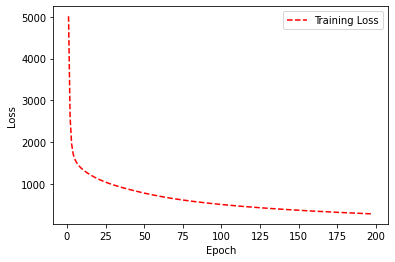

In [17]:
plot_loss("loss.png", history["losses"][:-2])

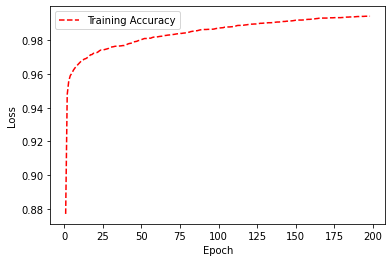

In [18]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

In [39]:
from helpers import sgd_with_momentum_update

def initialize_velocity(weights,biases):
    W1, W2 = weights
    b1, b2 = biases
    vw1 = np.zeros(W1.shape)
    vw2 = np.zeros(W2.shape)
    vb1 = np.zeros(b1.shape)
    vb2 = np.zeros(b2.shape)
    return vw1,vw2,vb1,vb2

weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity],
    "dev_accuracies" :[],
    "dev_loss":[]
}
momentum = 0.001
def update_parameters_with_momentum(weights,biases,gradients,learning_rate,velocity,momentum):
    W1, W2 = weights
    b1, b2 = biases
    
    db1, dW1, db2, dW2 = gradients
    vw1,vw2,vb1,vb2 = velocity
    W1,vw1 = sgd_with_momentum_update(W1, learning_rate, dW1,vw1,momentum)
    W2,vw2 = sgd_with_momentum_update(W2, learning_rate, dW2,vw2,momentum)
   
    b1,vb1 = sgd_with_momentum_update(b1, learning_rate, db1,vb1,momentum)
    b2,vb2 = sgd_with_momentum_update(b2, learning_rate, db2,vb2,momentum)
    
    weights = (W1, W2)
    biases = (b1, b2)
    velocity = (vw1,vw2,vb1,vb2)
    return weights ,biases,velocity
    

def batch_training_with_momentum(batch_size,weights,biases,history,X,y,momentum,lr,X_dev,y_dev):
    offset = 0
    for epoch in range(epochs):
        offset = 0
        weights = history['weights'][epoch]
        biases = history['biases'][epoch]
        velocity = history['velocity'][epoch]
        while offset <max(y_train.shape):
            if offset%1000==0 :
                print("epoch :",epoch," batch:",offset)
            else :
                a=1
            if offset+batch_size >=max(y_train.shape):
                X_batch = X[:,offset:]
                y_batch = y[:,offset:]
            else :    
                X_batch = X[:,offset:offset+batch_size]
                y_batch = y[:,offset:offset+batch_size]
            
            

            activations = forward_pass(X_batch, weights, biases)
            gradients = backpropagation(X_batch, y_batch, weights, biases, activations)

            
            weights, biases,velocity = update_parameters_with_momentum(weights, biases, gradients, lr,velocity,momentum)
            offset = offset+batch_size
        activations_full = forward_pass(X, weights, biases)
        y_prob = activations_full[-1]
        y_pred = np.where(y_prob > 0.5, 1, 0)

        #print(y,y_prob)
        loss = get_log_loss(y, y_prob)
        accuracy = get_accuracy(y, y_pred)
        
        activations_dev = forward_pass(X_dev,weights,biases)
        y_dev_prob =  activations_dev[-1]
        y_dev_pred = np.where(y_dev_prob > 0.5, 1, 0)
        loss_dev = get_log_loss(y_dev,y_dev_prob)
        accuracy_dev = get_accuracy(y_dev,y_dev_pred)

        history["weights"].append(weights)
        history["losses"].append(loss)
        history["biases"].append(biases)
        history["velocity"].append(velocity)
        history["accuracies"].append(accuracy)
        history["dev_accuracies"].append(accuracy_dev)
        history['dev_loss'].append(loss_dev)

        if np.isnan(loss):
            break

        print("loss after epoch: ",epoch,": ",loss)
    return history

# 3.4.1 (d) full batch with momentum

In [45]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(max(y_train.shape),weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
loss after epoch:  0 :  8232.732010322628
epoch : 1  batch: 0
loss after epoch:  1 :  8212.216369976986
epoch : 2  batch: 0
loss after epoch:  2 :  8192.051204229218
epoch : 3  batch: 0
loss after epoch:  3 :  8172.128226639132
epoch : 4  batch: 0
loss after epoch:  4 :  8152.349978383339
epoch : 5  batch: 0
loss after epoch:  5 :  8132.627314288696
epoch : 6  batch: 0
loss after epoch:  6 :  8112.877385824151
epoch : 7  batch: 0
loss after epoch:  7 :  8093.0220234915
epoch : 8  batch: 0
loss after epoch:  8 :  8072.986429923085
epoch : 9  batch: 0
loss after epoch:  9 :  8052.698117373099
epoch : 10  batch: 0
loss after epoch:  10 :  8032.086039850937
epoch : 11  batch: 0
loss after epoch:  11 :  8011.07988262269
epoch : 12  batch: 0
loss after epoch:  12 :  7989.609481408093
epoch : 13  batch: 0
loss after epoch:  13 :  7967.604351167255
epoch : 14  batch: 0
loss after epoch:  14 :  7944.99331049681
epoch : 15  batch: 0
loss after epoch:  15 :  7921.7041927565915

loss after epoch:  127 :  2869.4259698217306
epoch : 128  batch: 0
loss after epoch:  128 :  2849.3035935510643
epoch : 129  batch: 0
loss after epoch:  129 :  2829.5693657770353
epoch : 130  batch: 0
loss after epoch:  130 :  2810.2152784094205
epoch : 131  batch: 0
loss after epoch:  131 :  2791.2334300966577
epoch : 132  batch: 0
loss after epoch:  132 :  2772.616030365707
epoch : 133  batch: 0
loss after epoch:  133 :  2754.3554032937272
epoch : 134  batch: 0
loss after epoch:  134 :  2736.4439907252618
epoch : 135  batch: 0
loss after epoch:  135 :  2718.8743550511235
epoch : 136  batch: 0
loss after epoch:  136 :  2701.639181567158
epoch : 137  batch: 0
loss after epoch:  137 :  2684.7312804325416
epoch : 138  batch: 0
loss after epoch:  138 :  2668.143588248361
epoch : 139  batch: 0
loss after epoch:  139 :  2651.8691692779216
epoch : 140  batch: 0
loss after epoch:  140 :  2635.901216330612
epoch : 141  batch: 0
loss after epoch:  141 :  2620.233051331278
epoch : 142  batch: 0


In [46]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9525833333333333
best loss: 2062.000667220541
best epoch: 198


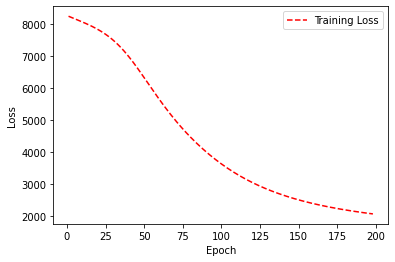

In [47]:
plot_loss("loss.png", history["losses"][:-2])

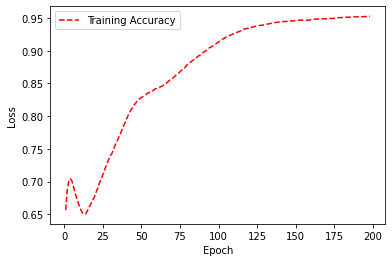

In [48]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (e) stochastic with momentum

In [53]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(1,weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  6564.766759809836
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  19013.045397241454
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  19932.77814298495
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoch

/Users/sarthak/intro-dl/src/helpers.py:137: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-x))


epoch : 4  batch: 8000
epoch : 4  batch: 9000
epoch : 4  batch: 10000
epoch : 4  batch: 11000
loss after epoch:  4 :  9679.845636887168
epoch : 5  batch: 0
epoch : 5  batch: 1000
epoch : 5  batch: 2000
epoch : 5  batch: 3000
epoch : 5  batch: 4000
epoch : 5  batch: 5000
epoch : 5  batch: 6000
epoch : 5  batch: 7000
epoch : 5  batch: 8000
epoch : 5  batch: 9000
epoch : 5  batch: 10000
epoch : 5  batch: 11000
loss after epoch:  5 :  6090.189888672201
epoch : 6  batch: 0
epoch : 6  batch: 1000
epoch : 6  batch: 2000
epoch : 6  batch: 3000
epoch : 6  batch: 4000
epoch : 6  batch: 5000
epoch : 6  batch: 6000
epoch : 6  batch: 7000
epoch : 6  batch: 8000
epoch : 6  batch: 9000
epoch : 6  batch: 10000
epoch : 6  batch: 11000
loss after epoch:  6 :  13402.283350312253
epoch : 7  batch: 0
epoch : 7  batch: 1000
epoch : 7  batch: 2000
epoch : 7  batch: 3000
epoch : 7  batch: 4000
epoch : 7  batch: 5000
epoch : 7  batch: 6000
epoch : 7  batch: 7000
epoch : 7  batch: 8000
epoch : 7  batch: 9000
ep

epoch : 29  batch: 10000
epoch : 29  batch: 11000
loss after epoch:  29 :  7280.766512172444
epoch : 30  batch: 0
epoch : 30  batch: 1000
epoch : 30  batch: 2000
epoch : 30  batch: 3000
epoch : 30  batch: 4000
epoch : 30  batch: 5000
epoch : 30  batch: 6000
epoch : 30  batch: 7000
epoch : 30  batch: 8000
epoch : 30  batch: 9000
epoch : 30  batch: 10000
epoch : 30  batch: 11000
loss after epoch:  30 :  8520.628045403379
epoch : 31  batch: 0
epoch : 31  batch: 1000
epoch : 31  batch: 2000
epoch : 31  batch: 3000
epoch : 31  batch: 4000
epoch : 31  batch: 5000
epoch : 31  batch: 6000
epoch : 31  batch: 7000
epoch : 31  batch: 8000
epoch : 31  batch: 9000
epoch : 31  batch: 10000
epoch : 31  batch: 11000
loss after epoch:  31 :  9383.626865793718
epoch : 32  batch: 0
epoch : 32  batch: 1000
epoch : 32  batch: 2000
epoch : 32  batch: 3000
epoch : 32  batch: 4000
epoch : 32  batch: 5000
epoch : 32  batch: 6000
epoch : 32  batch: 7000
epoch : 32  batch: 8000
epoch : 32  batch: 9000
epoch : 32

epoch : 54  batch: 7000
epoch : 54  batch: 8000
epoch : 54  batch: 9000
epoch : 54  batch: 10000
epoch : 54  batch: 11000
loss after epoch:  54 :  13701.199212138099
epoch : 55  batch: 0
epoch : 55  batch: 1000
epoch : 55  batch: 2000
epoch : 55  batch: 3000
epoch : 55  batch: 4000
epoch : 55  batch: 5000
epoch : 55  batch: 6000
epoch : 55  batch: 7000
epoch : 55  batch: 8000
epoch : 55  batch: 9000
epoch : 55  batch: 10000
epoch : 55  batch: 11000
loss after epoch:  55 :  14529.351093926869
epoch : 56  batch: 0
epoch : 56  batch: 1000
epoch : 56  batch: 2000
epoch : 56  batch: 3000
epoch : 56  batch: 4000
epoch : 56  batch: 5000
epoch : 56  batch: 6000
epoch : 56  batch: 7000
epoch : 56  batch: 8000
epoch : 56  batch: 9000
epoch : 56  batch: 10000
epoch : 56  batch: 11000
loss after epoch:  56 :  14247.748737026872
epoch : 57  batch: 0
epoch : 57  batch: 1000
epoch : 57  batch: 2000
epoch : 57  batch: 3000
epoch : 57  batch: 4000
epoch : 57  batch: 5000
epoch : 57  batch: 6000
epoch :

epoch : 79  batch: 5000
epoch : 79  batch: 6000
epoch : 79  batch: 7000
epoch : 79  batch: 8000
epoch : 79  batch: 9000
epoch : 79  batch: 10000
epoch : 79  batch: 11000
loss after epoch:  79 :  17567.726196834134
epoch : 80  batch: 0
epoch : 80  batch: 1000
epoch : 80  batch: 2000
epoch : 80  batch: 3000
epoch : 80  batch: 4000
epoch : 80  batch: 5000
epoch : 80  batch: 6000
epoch : 80  batch: 7000
epoch : 80  batch: 8000
epoch : 80  batch: 9000
epoch : 80  batch: 10000
epoch : 80  batch: 11000
loss after epoch:  80 :  17535.91279600382
epoch : 81  batch: 0
epoch : 81  batch: 1000
epoch : 81  batch: 2000
epoch : 81  batch: 3000
epoch : 81  batch: 4000
epoch : 81  batch: 5000
epoch : 81  batch: 6000
epoch : 81  batch: 7000
epoch : 81  batch: 8000
epoch : 81  batch: 9000
epoch : 81  batch: 10000
epoch : 81  batch: 11000
loss after epoch:  81 :  17616.68148425808
epoch : 82  batch: 0
epoch : 82  batch: 1000
epoch : 82  batch: 2000
epoch : 82  batch: 3000
epoch : 82  batch: 4000
epoch : 8

epoch : 104  batch: 2000
epoch : 104  batch: 3000
epoch : 104  batch: 4000
epoch : 104  batch: 5000
epoch : 104  batch: 6000
epoch : 104  batch: 7000
epoch : 104  batch: 8000
epoch : 104  batch: 9000
epoch : 104  batch: 10000
epoch : 104  batch: 11000
loss after epoch:  104 :  17923.302684682687
epoch : 105  batch: 0
epoch : 105  batch: 1000
epoch : 105  batch: 2000
epoch : 105  batch: 3000
epoch : 105  batch: 4000
epoch : 105  batch: 5000
epoch : 105  batch: 6000
epoch : 105  batch: 7000
epoch : 105  batch: 8000
epoch : 105  batch: 9000
epoch : 105  batch: 10000
epoch : 105  batch: 11000
loss after epoch:  105 :  17923.351531487337
epoch : 106  batch: 0
epoch : 106  batch: 1000
epoch : 106  batch: 2000
epoch : 106  batch: 3000
epoch : 106  batch: 4000
epoch : 106  batch: 5000
epoch : 106  batch: 6000
epoch : 106  batch: 7000
epoch : 106  batch: 8000
epoch : 106  batch: 9000
epoch : 106  batch: 10000
epoch : 106  batch: 11000
loss after epoch:  106 :  17917.52513188037
epoch : 107  bat

epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5000
epoch : 128  batch: 6000
epoch : 128  batch: 7000
epoch : 128  batch: 8000
epoch : 128  batch: 9000
epoch : 128  batch: 10000
epoch : 128  batch: 11000
loss after epoch:  128 :  14988.844528211364
epoch : 129  batch: 0
epoch : 129  batch: 1000
epoch : 129  batch: 2000
epoch : 129  batch: 3000
epoch : 129  batch: 4000
epoch : 129  batch: 5000
epoch : 129  batch: 6000
epoch : 129  batch: 7000
epoch : 129  batch: 8000
epoch : 129  batch: 9000
epoch : 129  batch: 10000
epoch : 129  batch: 11000
loss after epoch:  129 :  8873.285324163604
epoch : 130  batch: 0
epoch : 130  batch: 1000
epoch : 130  batch: 2000
epoch : 130  batch: 3000
epoch : 130  batch: 4000
epoch : 130  batch: 5000
epoch : 130  batch: 6000
epoch : 130  batch: 7000
epoch : 130  batch: 8000
epoch : 130  batch: 9000
epoch : 130  batch: 10000
epoch : 130  batch: 11000
loss after epoch:  130 :  8974.767021559479
epoch : 131  batc

epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  9393.088540531788
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2000
epoch : 153  batch: 3000
epoch : 153  batch: 4000
epoch : 153  batch: 5000
epoch : 153  batch: 6000
epoch : 153  batch: 7000
epoch : 153  batch: 8000
epoch : 153  batch: 9000
epoch : 153  batch: 10000
epoch : 153  batch: 11000
loss after epoch:  153 :  9396.8524368266
epoch : 154  batch: 0
epoch : 154  batch: 1000
epoch : 154  batch: 2000
epoch : 154  batch: 3000
epoch : 154  batch: 4000
epoch : 154  batch: 5000
epoch : 154  batch: 6000
epoch : 154  batch: 7000
epoch : 154  batch: 8000
epoch : 154  batch: 9000
epoch : 154  batch: 10000
epoch : 154  batch: 11000
loss after epoch:  154 :  9443.608750774329
epoch : 155  batch: 

epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  9674.992796812909
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6000
epoch : 177  batch: 7000
epoch : 177  batch: 8000
epoch : 177  batch: 9000
epoch : 177  batch: 10000
epoch : 177  batch: 11000
loss after epoch:  177 :  10088.406771035936
epoch : 178  batch: 0
epoch : 178  batch: 1000
epoch : 178  batch: 2000
epoch : 178  batch: 3000
epoch : 178  batch: 4000
epoch : 178  batch: 5000
epoch : 178  batch: 6000
epoch : 178  batch: 7000
epoch : 178  batch: 8000
epoch : 178  batch: 9000
epoch : 178  batch: 10000
epoch : 178  batch: 11000
loss after epoch:  178 :  10086.2566

In [54]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9655833333333333
best loss: 6090.189888672201
best epoch: 5


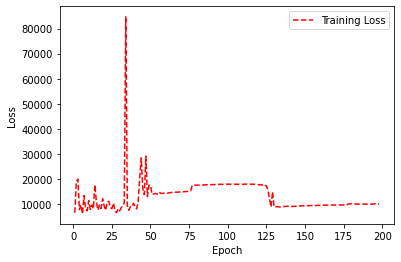

In [55]:
plot_loss("loss.png", history["losses"][:-2])

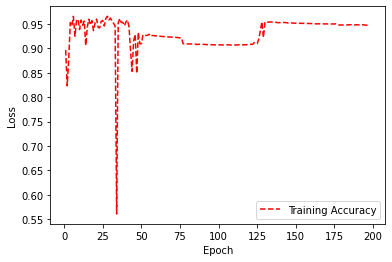

In [56]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.1 (f) minibatch with momentum 

In [49]:
weights, biases = initialize(X_train_flattened)
epochs = 200
velocity = initialize_velocity(weights,biases)
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity]
}
history = batch_training_with_momentum(100,weights,biases,history,X_train_flattened,y_train,momentum,lr)

epoch : 0  batch: 0
epoch : 0  batch: 1000
epoch : 0  batch: 2000
epoch : 0  batch: 3000
epoch : 0  batch: 4000
epoch : 0  batch: 5000
epoch : 0  batch: 6000
epoch : 0  batch: 7000
epoch : 0  batch: 8000
epoch : 0  batch: 9000
epoch : 0  batch: 10000
epoch : 0  batch: 11000
loss after epoch:  0 :  3122.7403938485463
epoch : 1  batch: 0
epoch : 1  batch: 1000
epoch : 1  batch: 2000
epoch : 1  batch: 3000
epoch : 1  batch: 4000
epoch : 1  batch: 5000
epoch : 1  batch: 6000
epoch : 1  batch: 7000
epoch : 1  batch: 8000
epoch : 1  batch: 9000
epoch : 1  batch: 10000
epoch : 1  batch: 11000
loss after epoch:  1 :  1926.5870208084314
epoch : 2  batch: 0
epoch : 2  batch: 1000
epoch : 2  batch: 2000
epoch : 2  batch: 3000
epoch : 2  batch: 4000
epoch : 2  batch: 5000
epoch : 2  batch: 6000
epoch : 2  batch: 7000
epoch : 2  batch: 8000
epoch : 2  batch: 9000
epoch : 2  batch: 10000
epoch : 2  batch: 11000
loss after epoch:  2 :  1663.776553470095
epoch : 3  batch: 0
epoch : 3  batch: 1000
epoc

epoch : 25  batch: 9000
epoch : 25  batch: 10000
epoch : 25  batch: 11000
loss after epoch:  25 :  1141.1834086183883
epoch : 26  batch: 0
epoch : 26  batch: 1000
epoch : 26  batch: 2000
epoch : 26  batch: 3000
epoch : 26  batch: 4000
epoch : 26  batch: 5000
epoch : 26  batch: 6000
epoch : 26  batch: 7000
epoch : 26  batch: 8000
epoch : 26  batch: 9000
epoch : 26  batch: 10000
epoch : 26  batch: 11000
loss after epoch:  26 :  1135.3593235302055
epoch : 27  batch: 0
epoch : 27  batch: 1000
epoch : 27  batch: 2000
epoch : 27  batch: 3000
epoch : 27  batch: 4000
epoch : 27  batch: 5000
epoch : 27  batch: 6000
epoch : 27  batch: 7000
epoch : 27  batch: 8000
epoch : 27  batch: 9000
epoch : 27  batch: 10000
epoch : 27  batch: 11000
loss after epoch:  27 :  1129.7428759097584
epoch : 28  batch: 0
epoch : 28  batch: 1000
epoch : 28  batch: 2000
epoch : 28  batch: 3000
epoch : 28  batch: 4000
epoch : 28  batch: 5000
epoch : 28  batch: 6000
epoch : 28  batch: 7000
epoch : 28  batch: 8000
epoch :

epoch : 50  batch: 7000
epoch : 50  batch: 8000
epoch : 50  batch: 9000
epoch : 50  batch: 10000
epoch : 50  batch: 11000
loss after epoch:  50 :  1038.4910573459945
epoch : 51  batch: 0
epoch : 51  batch: 1000
epoch : 51  batch: 2000
epoch : 51  batch: 3000
epoch : 51  batch: 4000
epoch : 51  batch: 5000
epoch : 51  batch: 6000
epoch : 51  batch: 7000
epoch : 51  batch: 8000
epoch : 51  batch: 9000
epoch : 51  batch: 10000
epoch : 51  batch: 11000
loss after epoch:  51 :  1035.8588915163195
epoch : 52  batch: 0
epoch : 52  batch: 1000
epoch : 52  batch: 2000
epoch : 52  batch: 3000
epoch : 52  batch: 4000
epoch : 52  batch: 5000
epoch : 52  batch: 6000
epoch : 52  batch: 7000
epoch : 52  batch: 8000
epoch : 52  batch: 9000
epoch : 52  batch: 10000
epoch : 52  batch: 11000
loss after epoch:  52 :  1033.3193828895276
epoch : 53  batch: 0
epoch : 53  batch: 1000
epoch : 53  batch: 2000
epoch : 53  batch: 3000
epoch : 53  batch: 4000
epoch : 53  batch: 5000
epoch : 53  batch: 6000
epoch :

epoch : 75  batch: 7000
epoch : 75  batch: 8000
epoch : 75  batch: 9000
epoch : 75  batch: 10000
epoch : 75  batch: 11000
loss after epoch:  75 :  994.1636160320454
epoch : 76  batch: 0
epoch : 76  batch: 1000
epoch : 76  batch: 2000
epoch : 76  batch: 3000
epoch : 76  batch: 4000
epoch : 76  batch: 5000
epoch : 76  batch: 6000
epoch : 76  batch: 7000
epoch : 76  batch: 8000
epoch : 76  batch: 9000
epoch : 76  batch: 10000
epoch : 76  batch: 11000
loss after epoch:  76 :  993.0448522568616
epoch : 77  batch: 0
epoch : 77  batch: 1000
epoch : 77  batch: 2000
epoch : 77  batch: 3000
epoch : 77  batch: 4000
epoch : 77  batch: 5000
epoch : 77  batch: 6000
epoch : 77  batch: 7000
epoch : 77  batch: 8000
epoch : 77  batch: 9000
epoch : 77  batch: 10000
epoch : 77  batch: 11000
loss after epoch:  77 :  991.9570609950496
epoch : 78  batch: 0
epoch : 78  batch: 1000
epoch : 78  batch: 2000
epoch : 78  batch: 3000
epoch : 78  batch: 4000
epoch : 78  batch: 5000
epoch : 78  batch: 6000
epoch : 78

epoch : 100  batch: 5000
epoch : 100  batch: 6000
epoch : 100  batch: 7000
epoch : 100  batch: 8000
epoch : 100  batch: 9000
epoch : 100  batch: 10000
epoch : 100  batch: 11000
loss after epoch:  100 :  971.4939056292965
epoch : 101  batch: 0
epoch : 101  batch: 1000
epoch : 101  batch: 2000
epoch : 101  batch: 3000
epoch : 101  batch: 4000
epoch : 101  batch: 5000
epoch : 101  batch: 6000
epoch : 101  batch: 7000
epoch : 101  batch: 8000
epoch : 101  batch: 9000
epoch : 101  batch: 10000
epoch : 101  batch: 11000
loss after epoch:  101 :  970.6389233153257
epoch : 102  batch: 0
epoch : 102  batch: 1000
epoch : 102  batch: 2000
epoch : 102  batch: 3000
epoch : 102  batch: 4000
epoch : 102  batch: 5000
epoch : 102  batch: 6000
epoch : 102  batch: 7000
epoch : 102  batch: 8000
epoch : 102  batch: 9000
epoch : 102  batch: 10000
epoch : 102  batch: 11000
loss after epoch:  102 :  969.7750705972064
epoch : 103  batch: 0
epoch : 103  batch: 1000
epoch : 103  batch: 2000
epoch : 103  batch: 3

epoch : 125  batch: 7000
epoch : 125  batch: 8000
epoch : 125  batch: 9000
epoch : 125  batch: 10000
epoch : 125  batch: 11000
loss after epoch:  125 :  945.2223012764632
epoch : 126  batch: 0
epoch : 126  batch: 1000
epoch : 126  batch: 2000
epoch : 126  batch: 3000
epoch : 126  batch: 4000
epoch : 126  batch: 5000
epoch : 126  batch: 6000
epoch : 126  batch: 7000
epoch : 126  batch: 8000
epoch : 126  batch: 9000
epoch : 126  batch: 10000
epoch : 126  batch: 11000
loss after epoch:  126 :  943.8869917748387
epoch : 127  batch: 0
epoch : 127  batch: 1000
epoch : 127  batch: 2000
epoch : 127  batch: 3000
epoch : 127  batch: 4000
epoch : 127  batch: 5000
epoch : 127  batch: 6000
epoch : 127  batch: 7000
epoch : 127  batch: 8000
epoch : 127  batch: 9000
epoch : 127  batch: 10000
epoch : 127  batch: 11000
loss after epoch:  127 :  942.5279340803079
epoch : 128  batch: 0
epoch : 128  batch: 1000
epoch : 128  batch: 2000
epoch : 128  batch: 3000
epoch : 128  batch: 4000
epoch : 128  batch: 5

epoch : 150  batch: 4000
epoch : 150  batch: 5000
epoch : 150  batch: 6000
epoch : 150  batch: 7000
epoch : 150  batch: 8000
epoch : 150  batch: 9000
epoch : 150  batch: 10000
epoch : 150  batch: 11000
loss after epoch:  150 :  909.1121895065394
epoch : 151  batch: 0
epoch : 151  batch: 1000
epoch : 151  batch: 2000
epoch : 151  batch: 3000
epoch : 151  batch: 4000
epoch : 151  batch: 5000
epoch : 151  batch: 6000
epoch : 151  batch: 7000
epoch : 151  batch: 8000
epoch : 151  batch: 9000
epoch : 151  batch: 10000
epoch : 151  batch: 11000
loss after epoch:  151 :  907.9116833561238
epoch : 152  batch: 0
epoch : 152  batch: 1000
epoch : 152  batch: 2000
epoch : 152  batch: 3000
epoch : 152  batch: 4000
epoch : 152  batch: 5000
epoch : 152  batch: 6000
epoch : 152  batch: 7000
epoch : 152  batch: 8000
epoch : 152  batch: 9000
epoch : 152  batch: 10000
epoch : 152  batch: 11000
loss after epoch:  152 :  906.7594015135468
epoch : 153  batch: 0
epoch : 153  batch: 1000
epoch : 153  batch: 2

epoch : 174  batch: 8000
epoch : 174  batch: 9000
epoch : 174  batch: 10000
epoch : 174  batch: 11000
loss after epoch:  174 :  891.4996976095503
epoch : 175  batch: 0
epoch : 175  batch: 1000
epoch : 175  batch: 2000
epoch : 175  batch: 3000
epoch : 175  batch: 4000
epoch : 175  batch: 5000
epoch : 175  batch: 6000
epoch : 175  batch: 7000
epoch : 175  batch: 8000
epoch : 175  batch: 9000
epoch : 175  batch: 10000
epoch : 175  batch: 11000
loss after epoch:  175 :  891.4552898515808
epoch : 176  batch: 0
epoch : 176  batch: 1000
epoch : 176  batch: 2000
epoch : 176  batch: 3000
epoch : 176  batch: 4000
epoch : 176  batch: 5000
epoch : 176  batch: 6000
epoch : 176  batch: 7000
epoch : 176  batch: 8000
epoch : 176  batch: 9000
epoch : 176  batch: 10000
epoch : 176  batch: 11000
loss after epoch:  176 :  891.4971050847154
epoch : 177  batch: 0
epoch : 177  batch: 1000
epoch : 177  batch: 2000
epoch : 177  batch: 3000
epoch : 177  batch: 4000
epoch : 177  batch: 5000
epoch : 177  batch: 6

epoch : 199  batch: 3000
epoch : 199  batch: 4000
epoch : 199  batch: 5000
epoch : 199  batch: 6000
epoch : 199  batch: 7000
epoch : 199  batch: 8000
epoch : 199  batch: 9000
epoch : 199  batch: 10000
epoch : 199  batch: 11000
loss after epoch:  199 :  948.3865491979168


In [50]:
best_epoch = np.array(history["losses"][:-1]).argmin()
print(f"best accuracy: {history['accuracies'][best_epoch]}")
print(f"best loss: {history['losses'][best_epoch]}")
print(f"best epoch: {best_epoch}")

best accuracy: 0.9795833333333334
best loss: 891.4552898515808
best epoch: 175


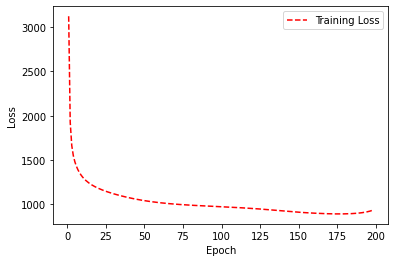

In [51]:
plot_loss("loss.png", history["losses"][:-2])

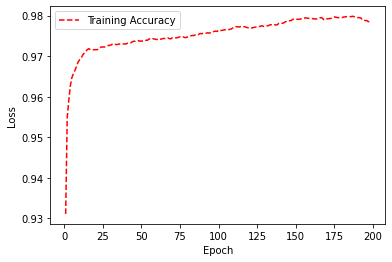

In [52]:
plot_loss("accuracy.png", history["accuracies"][:-2], label='Training Accuracy')

# 3.4.2 Hyperparameter tuning using gridsearch

In [23]:
momentum = np.arange(0.001,0.01,0.001)
lr = np.arange(0.01,0.1,0.01)
batch_size = [16,64,256,1024,4096]
best_params = {}
best_params['loss'] = 999999999
best_params['momentum'] = 0
best_params['lr'] = 0
best_params['batch_size'] = 0
best_params["weights"] = 0
best_params["biases"] = 0
for m in momentum :
    for l in lr :
        for bs in batch_size :
            weights, biases = initialize(X_train_flattened)
            epochs = 50
            velocity = initialize_velocity(weights,biases)
            history = {
                "weights": [weights],
                "losses": [], 
                "biases": [biases],
                "accuracies": [],
                "velocity":[velocity]
            }
            history = batch_training_with_momentum(bs,weights,biases,history,X_train_flattened,y_train,m,l)
            best_epoch = np.array(history["losses"][:-1]).argmin()
            print(history['accuracies'][best_epoch],best_epoch)
            activations_dev = forward_pass(X_dev_flattened, history["weights"][best_epoch], history["biases"][best_epoch])
            y_prob = activations_dev[-1]
            dev_loss = get_log_loss(y_dev,y_prob)
            if dev_loss <best_params['loss'] :
                best_params['momentum'] = m
                best_params['lr'] = l
                best_params['batch_size'] = bs
                best_params['loss'] = dev_loss
                best_params["weights"] = history["weights"][best_epoch]
                best_params["biases"] = history["biases"][best_epoch]
            
print (best_params)           

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  6943.903416885112
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  4098.952073606626
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  2767.6319099208613
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  2197.340456181676
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1924.9398577317738
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8

epoch : 45  batch: 10000
loss after epoch:  45 :  1004.272378109416
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  996.4262922445098
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  988.7184428949383
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  981.1430848288376
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  973.6948588454247
0.9750833333333333 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  8160.955142647165
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  7913.0680086514385

loss after epoch:  46 :  2687.9071166184967
epoch : 47  batch: 0
loss after epoch:  47 :  2639.7873746575215
epoch : 48  batch: 0
loss after epoch:  48 :  2594.2205711821225
epoch : 49  batch: 0
loss after epoch:  49 :  2551.049759953406
0.9485833333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8311.047163497624
epoch : 1  batch: 0
loss after epoch:  1 :  8296.97942036408
epoch : 2  batch: 0
loss after epoch:  2 :  8286.256508693288
epoch : 3  batch: 0
loss after epoch:  3 :  8277.3775415058
epoch : 4  batch: 0
loss after epoch:  4 :  8269.472139865384
epoch : 5  batch: 0
loss after epoch:  5 :  8262.031112124025
epoch : 6  batch: 0
loss after epoch:  6 :  8254.752598448984
epoch : 7  batch: 0
loss after epoch:  7 :  8247.453873831499
epoch : 8  batch: 0
loss after epoch:  8 :  8240.02066925232
epoch : 9  batch: 0
loss after epoch:  9 :  8232.378008143362
epoch : 10  batch: 0
loss after epoch:  10 :  8224.473412546226
epoch : 11  batch: 0
loss after epoch:  11 :  8216.267233004

loss after epoch:  8 :  1321.6612480668086
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1289.5538111970418
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1260.3323226882796
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1233.4303799423733
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1208.4447636399013
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1185.0777399666322
epoch : 14  batch: 0
epoch : 14  b

loss after epoch:  8 :  2035.2651265227255
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1921.3914899799215
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1835.7049908967488
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1769.1601523528136
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1716.0194135195893
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1672.5248706131717
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1636.1421334715988
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1605.116158929999
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1578.2021226830234
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1554.4975308697137
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1533.3346308687546
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1

loss after epoch:  23 :  7439.34840357334
epoch : 24  batch: 0
loss after epoch:  24 :  7359.426326460516
epoch : 25  batch: 0
loss after epoch:  25 :  7275.281949844903
epoch : 26  batch: 0
loss after epoch:  26 :  7187.096577933238
epoch : 27  batch: 0
loss after epoch:  27 :  7095.112862463417
epoch : 28  batch: 0
loss after epoch:  28 :  6999.632731727763
epoch : 29  batch: 0
loss after epoch:  29 :  6901.012707120672
epoch : 30  batch: 0
loss after epoch:  30 :  6799.656643565769
epoch : 31  batch: 0
loss after epoch:  31 :  6696.006147298294
epoch : 32  batch: 0
loss after epoch:  32 :  6590.529143045072
epoch : 33  batch: 0
loss after epoch:  33 :  6483.707252695435
epoch : 34  batch: 0
loss after epoch:  34 :  6376.022775152607
epoch : 35  batch: 0
loss after epoch:  35 :  6267.946095287591
epoch : 36  batch: 0
loss after epoch:  36 :  6159.924289292398
epoch : 37  batch: 0
loss after epoch:  37 :  6052.371546045786
epoch : 38  batch: 0
loss after epoch:  38 :  5945.66181827794

epoch : 18  batch: 10000
loss after epoch:  18 :  931.7465758447055
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  912.7819219045223
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  894.5209160960296
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  876.8974932219296
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  859.8548646844533
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  843.3442817590999
epoch :

epoch : 30  batch: 8000
loss after epoch:  30 :  1236.9183327326255
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1226.2807222472688
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1215.9512645035256
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1205.9161488650843
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1196.1618045904559
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1186.675122955352
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1177.4435987329252
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1168.4553905610962
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1159.6993160906668
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1151.1648045435118
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1142.841828909673
epoch : 41  batch: 0
epoch : 41  batch: 8000

loss after epoch:  3 :  8311.501742023043
epoch : 4  batch: 0
loss after epoch:  4 :  8305.269038034341
epoch : 5  batch: 0
loss after epoch:  5 :  8299.19541408312
epoch : 6  batch: 0
loss after epoch:  6 :  8293.21652035394
epoch : 7  batch: 0
loss after epoch:  7 :  8287.286442851742
epoch : 8  batch: 0
loss after epoch:  8 :  8281.37133730675
epoch : 9  batch: 0
loss after epoch:  9 :  8275.445278573858
epoch : 10  batch: 0
loss after epoch:  10 :  8269.487551459724
epoch : 11  batch: 0
loss after epoch:  11 :  8263.480879456443
epoch : 12  batch: 0
loss after epoch:  12 :  8257.410263973907
epoch : 13  batch: 0
loss after epoch:  13 :  8251.262221217481
epoch : 14  batch: 0
loss after epoch:  14 :  8245.024278332927
epoch : 15  batch: 0
loss after epoch:  15 :  8238.68463884488
epoch : 16  batch: 0
loss after epoch:  16 :  8232.231958872175
epoch : 17  batch: 0
loss after epoch:  17 :  8225.655196048392
epoch : 18  batch: 0
loss after epoch:  18 :  8218.943506367723
epoch : 19  ba

epoch : 28  batch: 10000
loss after epoch:  28 :  657.2105843741201
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  643.5379474072894
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  630.4970893740726
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  618.0332475041675
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  606.0966552982235
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  594.6426162730004
epoch :

loss after epoch:  49 :  971.4603061256731
0.9754166666666667 48
epoch : 0  batch: 0
loss after epoch:  0 :  8103.28502086996
epoch : 1  batch: 0
loss after epoch:  1 :  7766.916097199594
epoch : 2  batch: 0
loss after epoch:  2 :  7203.5098823984135
epoch : 3  batch: 0
loss after epoch:  3 :  6453.1709180155185
epoch : 4  batch: 0
loss after epoch:  4 :  5680.934830563013
epoch : 5  batch: 0
loss after epoch:  5 :  4999.404600933816
epoch : 6  batch: 0
loss after epoch:  6 :  4423.370048380383
epoch : 7  batch: 0
loss after epoch:  7 :  3937.5200973074016
epoch : 8  batch: 0
loss after epoch:  8 :  3531.225134098434
epoch : 9  batch: 0
loss after epoch:  9 :  3197.1569744040826
epoch : 10  batch: 0
loss after epoch:  10 :  2926.1699379689744
epoch : 11  batch: 0
loss after epoch:  11 :  2707.4766980691406
epoch : 12  batch: 0
loss after epoch:  12 :  2530.6176906948713
epoch : 13  batch: 0
loss after epoch:  13 :  2386.653212253014
epoch : 14  batch: 0
loss after epoch:  14 :  2268.43

loss after epoch:  28 :  8064.329781570298
epoch : 29  batch: 0
loss after epoch:  29 :  8049.273632960366
epoch : 30  batch: 0
loss after epoch:  30 :  8033.534101330818
epoch : 31  batch: 0
loss after epoch:  31 :  8017.081962456876
epoch : 32  batch: 0
loss after epoch:  32 :  7999.888018572665
epoch : 33  batch: 0
loss after epoch:  33 :  7981.92320972323
epoch : 34  batch: 0
loss after epoch:  34 :  7963.158738948598
epoch : 35  batch: 0
loss after epoch:  35 :  7943.566211051591
epoch : 36  batch: 0
loss after epoch:  36 :  7923.117784346913
epoch : 37  batch: 0
loss after epoch:  37 :  7901.7863343962235
epoch : 38  batch: 0
loss after epoch:  38 :  7879.545628321292
epoch : 39  batch: 0
loss after epoch:  39 :  7856.370507880199
epoch : 40  batch: 0
loss after epoch:  40 :  7832.237079121128
epoch : 41  batch: 0
loss after epoch:  41 :  7807.122906127819
epoch : 42  batch: 0
loss after epoch:  42 :  7781.007206173366
epoch : 43  batch: 0
loss after epoch:  43 :  7753.8710435309

epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  482.04850375944443
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  473.0278860286104
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  464.2552706294091
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  455.71501661785834
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  447.39365432736724
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000


loss after epoch:  23 :  1628.312972479387
epoch : 24  batch: 0
loss after epoch:  24 :  1608.827148996537
epoch : 25  batch: 0
loss after epoch:  25 :  1591.0140839632077
epoch : 26  batch: 0
loss after epoch:  26 :  1574.6169328361643
epoch : 27  batch: 0
loss after epoch:  27 :  1559.4252842921376
epoch : 28  batch: 0
loss after epoch:  28 :  1545.2660668520634
epoch : 29  batch: 0
loss after epoch:  29 :  1531.996627187274
epoch : 30  batch: 0
loss after epoch:  30 :  1519.49931394928
epoch : 31  batch: 0
loss after epoch:  31 :  1507.677067092825
epoch : 32  batch: 0
loss after epoch:  32 :  1496.4496805066854
epoch : 33  batch: 0
loss after epoch:  33 :  1485.7505698184978
epoch : 34  batch: 0
loss after epoch:  34 :  1475.5240027208322
epoch : 35  batch: 0
loss after epoch:  35 :  1465.7228049257653
epoch : 36  batch: 0
loss after epoch:  36 :  1456.3065437464918
epoch : 37  batch: 0
loss after epoch:  37 :  1447.2401482851153
epoch : 38  batch: 0
loss after epoch:  38 :  1438.4

loss after epoch:  0 :  1783.5705136887277
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1460.8593460432717
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1327.6987840120414
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1234.2321169517518
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1161.1800205259985
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1101.0981744659346
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4

epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  352.56155387230575
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  345.59465962211306
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  338.7759473725158
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  332.09951207852305
0.9925833333333334 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  5357.629008295557
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2798.995263297547
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2051.759416117952
e

loss after epoch:  49 :  1306.4788091006944
0.96725 48
epoch : 0  batch: 0
loss after epoch:  0 :  8276.245976398332
epoch : 1  batch: 0
loss after epoch:  1 :  8228.240532538712
epoch : 2  batch: 0
loss after epoch:  2 :  8169.696620466384
epoch : 3  batch: 0
loss after epoch:  3 :  8094.978395806838
epoch : 4  batch: 0
loss after epoch:  4 :  7998.342110831041
epoch : 5  batch: 0
loss after epoch:  5 :  7874.294431038019
epoch : 6  batch: 0
loss after epoch:  6 :  7718.105632450986
epoch : 7  batch: 0
loss after epoch:  7 :  7526.612919183291
epoch : 8  batch: 0
loss after epoch:  8 :  7299.420754723747
epoch : 9  batch: 0
loss after epoch:  9 :  7039.9786042767555
epoch : 10  batch: 0
loss after epoch:  10 :  6755.677570759489
epoch : 11  batch: 0
loss after epoch:  11 :  6456.626962543429
epoch : 12  batch: 0
loss after epoch:  12 :  6153.515572433035
epoch : 13  batch: 0
loss after epoch:  13 :  5855.477762912644
epoch : 14  batch: 0
loss after epoch:  14 :  5568.851400893165
epoc

epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  803.608198032259
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  769.2351546539135
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  737.0203523732066
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  707.0175872437078
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  679.2307451315071
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoc

loss after epoch:  12 :  1250.8812523458796
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1226.9076949832531
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1204.3968554107191
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1183.1656649612946
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1163.0678489393836
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1143.980263817665
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1125.7952677579187
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1108.4172919579842
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1091.761529256717
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1075.753411244786
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1060.3282108557823
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 : 

loss after epoch:  27 :  2654.2373407774476
epoch : 28  batch: 0
loss after epoch:  28 :  2572.965657385621
epoch : 29  batch: 0
loss after epoch:  29 :  2499.084537117801
epoch : 30  batch: 0
loss after epoch:  30 :  2431.812949954131
epoch : 31  batch: 0
loss after epoch:  31 :  2370.448498940142
epoch : 32  batch: 0
loss after epoch:  32 :  2314.3635553451704
epoch : 33  batch: 0
loss after epoch:  33 :  2262.9997813088316
epoch : 34  batch: 0
loss after epoch:  34 :  2215.86190959784
epoch : 35  batch: 0
loss after epoch:  35 :  2172.51136007788
epoch : 36  batch: 0
loss after epoch:  36 :  2132.560052485362
epoch : 37  batch: 0
loss after epoch:  37 :  2095.6646195613735
epoch : 38  batch: 0
loss after epoch:  38 :  2061.521120424288
epoch : 39  batch: 0
loss after epoch:  39 :  2029.8602875375195
epoch : 40  batch: 0
loss after epoch:  40 :  2000.4433003097633
epoch : 41  batch: 0
loss after epoch:  41 :  1973.0580555628035
epoch : 42  batch: 0
loss after epoch:  42 :  1947.51589

epoch : 19  batch: 10000
loss after epoch:  19 :  551.1968329352487
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  533.3310829838906
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  516.4567640262477
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  500.4842756406961
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  485.341975678283
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  470.96448919237287
epoch :

loss after epoch:  29 :  909.8084041062472
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  897.7028845911827
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  885.8656786559675
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  874.2801550021574
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  862.9344957272837
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  851.821109881635
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  840.935866598537
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  830.2772002081557
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  819.8451527316377
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  809.6404252972227
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  799.663518588732
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  789.914045

loss after epoch:  2 :  8303.973749791905
epoch : 3  batch: 0
loss after epoch:  3 :  8287.580024651403
epoch : 4  batch: 0
loss after epoch:  4 :  8270.969340274552
epoch : 5  batch: 0
loss after epoch:  5 :  8253.883627572597
epoch : 6  batch: 0
loss after epoch:  6 :  8236.078000341564
epoch : 7  batch: 0
loss after epoch:  7 :  8217.316002210162
epoch : 8  batch: 0
loss after epoch:  8 :  8197.367041665533
epoch : 9  batch: 0
loss after epoch:  9 :  8176.004804926333
epoch : 10  batch: 0
loss after epoch:  10 :  8153.006202730643
epoch : 11  batch: 0
loss after epoch:  11 :  8128.150669799699
epoch : 12  batch: 0
loss after epoch:  12 :  8101.21974343886
epoch : 13  batch: 0
loss after epoch:  13 :  8071.996908762996
epoch : 14  batch: 0
loss after epoch:  14 :  8040.26774511399
epoch : 15  batch: 0
loss after epoch:  15 :  8005.820448660459
epoch : 16  batch: 0
loss after epoch:  16 :  7968.446837962869
epoch : 17  batch: 0
loss after epoch:  17 :  7927.9439672871995
epoch : 18  b

loss after epoch:  28 :  386.4335615989683
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  375.37787128215035
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  364.7723226587342
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  354.5886764423092
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  344.7976919146229
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  335.3704996927238
epoch : 34  batch: 0
epoch : 34

loss after epoch:  1 :  6162.473888875335
epoch : 2  batch: 0
loss after epoch:  2 :  4567.027033375787
epoch : 3  batch: 0
loss after epoch:  3 :  3518.670384359172
epoch : 4  batch: 0
loss after epoch:  4 :  2856.0955566699827
epoch : 5  batch: 0
loss after epoch:  5 :  2447.7708652889114
epoch : 6  batch: 0
loss after epoch:  6 :  2189.0942887018514
epoch : 7  batch: 0
loss after epoch:  7 :  2017.0756078117333
epoch : 8  batch: 0
loss after epoch:  8 :  1896.941822458
epoch : 9  batch: 0
loss after epoch:  9 :  1809.242695730238
epoch : 10  batch: 0
loss after epoch:  10 :  1742.6748385979954
epoch : 11  batch: 0
loss after epoch:  11 :  1690.392267108622
epoch : 12  batch: 0
loss after epoch:  12 :  1648.085284873665
epoch : 13  batch: 0
loss after epoch:  13 :  1612.9447092832959
epoch : 14  batch: 0
loss after epoch:  14 :  1583.081447253144
epoch : 15  batch: 0
loss after epoch:  15 :  1557.1890582916003
epoch : 16  batch: 0
loss after epoch:  16 :  1534.340997163346
epoch : 17

loss after epoch:  31 :  6057.449890806868
epoch : 32  batch: 0
loss after epoch:  32 :  5945.998415249827
epoch : 33  batch: 0
loss after epoch:  33 :  5836.128953652237
epoch : 34  batch: 0
loss after epoch:  34 :  5728.102644269351
epoch : 35  batch: 0
loss after epoch:  35 :  5622.11809760735
epoch : 36  batch: 0
loss after epoch:  36 :  5518.317094472513
epoch : 37  batch: 0
loss after epoch:  37 :  5416.791557149316
epoch : 38  batch: 0
loss after epoch:  38 :  5317.591158724848
epoch : 39  batch: 0
loss after epoch:  39 :  5220.731041573243
epoch : 40  batch: 0
loss after epoch:  40 :  5126.19923610882
epoch : 41  batch: 0
loss after epoch:  41 :  5033.963489316971
epoch : 42  batch: 0
loss after epoch:  42 :  4943.977318756587
epoch : 43  batch: 0
loss after epoch:  43 :  4856.185196170997
epoch : 44  batch: 0
loss after epoch:  44 :  4770.52683395736
epoch : 45  batch: 0
loss after epoch:  45 :  4686.940598567251
epoch : 46  batch: 0
loss after epoch:  46 :  4605.366109913711


loss after epoch:  38 :  1064.7659562000113
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1056.0407075165854
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  1047.5073527020775
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  1039.1546775369243
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  1030.9723995094048
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  1022.9510862911955
epoch : 44  batch: 0
epoch

loss after epoch:  31 :  3791.975852194574
epoch : 32  batch: 0
loss after epoch:  32 :  3685.3956640511765
epoch : 33  batch: 0
loss after epoch:  33 :  3584.280684943833
epoch : 34  batch: 0
loss after epoch:  34 :  3488.398802872735
epoch : 35  batch: 0
loss after epoch:  35 :  3397.5266379140203
epoch : 36  batch: 0
loss after epoch:  36 :  3311.4460018443697
epoch : 37  batch: 0
loss after epoch:  37 :  3229.941728433491
epoch : 38  batch: 0
loss after epoch:  38 :  3152.800669937995
epoch : 39  batch: 0
loss after epoch:  39 :  3079.811586364953
epoch : 40  batch: 0
loss after epoch:  40 :  3010.7656469788303
epoch : 41  batch: 0
loss after epoch:  41 :  2945.457293449167
epoch : 42  batch: 0
loss after epoch:  42 :  2883.685261965572
epoch : 43  batch: 0
loss after epoch:  43 :  2825.2536143172188
epoch : 44  batch: 0
loss after epoch:  44 :  2769.9726770918915
epoch : 45  batch: 0
loss after epoch:  45 :  2717.6598294793707
epoch : 46  batch: 0
loss after epoch:  46 :  2668.140

epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1603.5950762995399
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1515.4804113412029
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1454.7652830845248
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1407.0106030277125
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1366.5386553386243
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1330.784381

epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  706.3343113880982
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  697.9689796239156
0.9813333333333333 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  8006.80720806104
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  6967.224494008001
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  5403.774617461832
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  4197.846725563302
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  3366.418350331659
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  2815.8576574398685
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  2458.7260002186495
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  2221.380042376

loss after epoch:  4 :  8218.910577286399
epoch : 5  batch: 0
loss after epoch:  5 :  8197.456162184477
epoch : 6  batch: 0
loss after epoch:  6 :  8174.496139803052
epoch : 7  batch: 0
loss after epoch:  7 :  8149.745328764793
epoch : 8  batch: 0
loss after epoch:  8 :  8122.942257360102
epoch : 9  batch: 0
loss after epoch:  9 :  8093.8335689050255
epoch : 10  batch: 0
loss after epoch:  10 :  8062.170203844155
epoch : 11  batch: 0
loss after epoch:  11 :  8027.707462714325
epoch : 12  batch: 0
loss after epoch:  12 :  7990.206506105259
epoch : 13  batch: 0
loss after epoch:  13 :  7949.436607827501
epoch : 14  batch: 0
loss after epoch:  14 :  7905.17804318263
epoch : 15  batch: 0
loss after epoch:  15 :  7857.225669582434
epoch : 16  batch: 0
loss after epoch:  16 :  7805.393291395783
epoch : 17  batch: 0
loss after epoch:  17 :  7749.518864728716
epoch : 18  batch: 0
loss after epoch:  18 :  7689.470506972085
epoch : 19  batch: 0
loss after epoch:  19 :  7625.153137668598
epoch : 

loss after epoch:  11 :  1084.6409339662696
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1057.072551587125
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1031.1810461036785
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1006.6919638134974
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  983.4116562941854
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  961.2026500113125
epoch : 17  batch: 0
epoch : 

loss after epoch:  13 :  1488.6502170057793
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1464.8622406096044
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1443.1902491044593
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1423.1835347816227
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1404.5413646258605
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1387.0504196041147
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1370.547331329353
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1354.9008979852772
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1340.0032292509777
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1325.7642682570713
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1312.1080666368869
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 

loss after epoch:  27 :  6080.408469032266
epoch : 28  batch: 0
loss after epoch:  28 :  5930.889110445772
epoch : 29  batch: 0
loss after epoch:  29 :  5783.854167484817
epoch : 30  batch: 0
loss after epoch:  30 :  5639.875504202062
epoch : 31  batch: 0
loss after epoch:  31 :  5499.358569728034
epoch : 32  batch: 0
loss after epoch:  32 :  5362.564915544898
epoch : 33  batch: 0
loss after epoch:  33 :  5229.638870810848
epoch : 34  batch: 0
loss after epoch:  34 :  5100.635005721145
epoch : 35  batch: 0
loss after epoch:  35 :  4975.543879745244
epoch : 36  batch: 0
loss after epoch:  36 :  4854.314451090617
epoch : 37  batch: 0
loss after epoch:  37 :  4736.872293123596
epoch : 38  batch: 0
loss after epoch:  38 :  4623.133371619848
epoch : 39  batch: 0
loss after epoch:  39 :  4513.013578902874
epoch : 40  batch: 0
loss after epoch:  40 :  4406.434515453414
epoch : 41  batch: 0
loss after epoch:  41 :  4303.326181631647
epoch : 42  batch: 0
loss after epoch:  42 :  4203.6273156624

epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  773.29507263949
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  754.1207485138236
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  735.8432158945486
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  718.4584989661921
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  701.9512214449578
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  686

epoch : 32  batch: 8000
loss after epoch:  32 :  1121.469430258957
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1110.8305848827695
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1100.4669091516355
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1090.3630068503605
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1080.504266882103
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1070.8768246810846
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1061.4675458912163
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1052.2640250660806
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1043.2545913638376
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1034.4283149338785
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1025.7750099986192
epoch : 43  batch: 0
epoch : 43  batch: 8000

loss after epoch:  7 :  8257.373297422218
epoch : 8  batch: 0
loss after epoch:  8 :  8248.069024631906
epoch : 9  batch: 0
loss after epoch:  9 :  8238.567282419983
epoch : 10  batch: 0
loss after epoch:  10 :  8228.838509490834
epoch : 11  batch: 0
loss after epoch:  11 :  8218.85334152562
epoch : 12  batch: 0
loss after epoch:  12 :  8208.582581341381
epoch : 13  batch: 0
loss after epoch:  13 :  8197.997172482028
epoch : 14  batch: 0
loss after epoch:  14 :  8187.068175492895
epoch : 15  batch: 0
loss after epoch:  15 :  8175.766746555024
epoch : 16  batch: 0
loss after epoch:  16 :  8164.064118396414
epoch : 17  batch: 0
loss after epoch:  17 :  8151.931583565144
epoch : 18  batch: 0
loss after epoch:  18 :  8139.340480296876
epoch : 19  batch: 0
loss after epoch:  19 :  8126.262181360561
epoch : 20  batch: 0
loss after epoch:  20 :  8112.668086428234
epoch : 21  batch: 0
loss after epoch:  21 :  8098.529618686038
epoch : 22  batch: 0
loss after epoch:  22 :  8083.8182265769665
ep

epoch : 30  batch: 10000
loss after epoch:  30 :  555.2400816069727
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  543.8342968247287
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  532.843912369721
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  522.232742937588
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  511.9712600056853
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  502.0357805380385
epoch : 3

loss after epoch:  5 :  4064.387405385326
epoch : 6  batch: 0
loss after epoch:  6 :  3525.249580105783
epoch : 7  batch: 0
loss after epoch:  7 :  3107.231612863877
epoch : 8  batch: 0
loss after epoch:  8 :  2789.0552334218696
epoch : 9  batch: 0
loss after epoch:  9 :  2547.754080158724
epoch : 10  batch: 0
loss after epoch:  10 :  2363.167050187778
epoch : 11  batch: 0
loss after epoch:  11 :  2219.8828788621922
epoch : 12  batch: 0
loss after epoch:  12 :  2106.797832204007
epoch : 13  batch: 0
loss after epoch:  13 :  2016.0480634618648
epoch : 14  batch: 0
loss after epoch:  14 :  1942.0536736558838
epoch : 15  batch: 0
loss after epoch:  15 :  1880.8153367861153
epoch : 16  batch: 0
loss after epoch:  16 :  1829.4283181616163
epoch : 17  batch: 0
loss after epoch:  17 :  1785.7527346787124
epoch : 18  batch: 0
loss after epoch:  18 :  1748.1898096631767
epoch : 19  batch: 0
loss after epoch:  19 :  1715.5288156203444
epoch : 20  batch: 0
loss after epoch:  20 :  1686.8411469702

loss after epoch:  33 :  7775.536967523607
epoch : 34  batch: 0
loss after epoch:  34 :  7741.3719953957825
epoch : 35  batch: 0
loss after epoch:  35 :  7705.623883414279
epoch : 36  batch: 0
loss after epoch:  36 :  7668.266549224174
epoch : 37  batch: 0
loss after epoch:  37 :  7629.27917700121
epoch : 38  batch: 0
loss after epoch:  38 :  7588.646877963385
epoch : 39  batch: 0
loss after epoch:  39 :  7546.361348318269
epoch : 40  batch: 0
loss after epoch:  40 :  7502.421504628959
epoch : 41  batch: 0
loss after epoch:  41 :  7456.834073975659
epoch : 42  batch: 0
loss after epoch:  42 :  7409.614114580974
epoch : 43  batch: 0
loss after epoch:  43 :  7360.7854420369285
epoch : 44  batch: 0
loss after epoch:  44 :  7310.380937140041
epoch : 45  batch: 0
loss after epoch:  45 :  7258.442713731672
epoch : 46  batch: 0
loss after epoch:  46 :  7205.022128853716
epoch : 47  batch: 0
loss after epoch:  47 :  7150.1796228224985
epoch : 48  batch: 0
loss after epoch:  48 :  7093.98438321

epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  391.5678879614703
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  383.7153643085004
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  376.0798526770622
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  368.65011282108185
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  361.4160779449076
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
ep

loss after epoch:  35 :  1413.658335111558
epoch : 36  batch: 0
loss after epoch:  36 :  1405.0149435498486
epoch : 37  batch: 0
loss after epoch:  37 :  1396.6169081639457
epoch : 38  batch: 0
loss after epoch:  38 :  1388.4383815918943
epoch : 39  batch: 0
loss after epoch:  39 :  1380.4572594845233
epoch : 40  batch: 0
loss after epoch:  40 :  1372.6549435041234
epoch : 41  batch: 0
loss after epoch:  41 :  1365.0161192304313
epoch : 42  batch: 0
loss after epoch:  42 :  1357.5284789355655
epoch : 43  batch: 0
loss after epoch:  43 :  1350.182347774915
epoch : 44  batch: 0
loss after epoch:  44 :  1342.9702216477106
epoch : 45  batch: 0
loss after epoch:  45 :  1335.886270664828
epoch : 46  batch: 0
loss after epoch:  46 :  1328.9258776239249
epoch : 47  batch: 0
loss after epoch:  47 :  1322.0852615239094
epoch : 48  batch: 0
loss after epoch:  48 :  1315.361200983894
epoch : 49  batch: 0
loss after epoch:  49 :  1308.7508446368454
0.9673333333333334 48
epoch : 0  batch: 0
loss aft

epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1050.8232245721583
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  998.3269631313767
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  952.6681266955421
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  911.750382880713
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  874.237877882647
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  ba

epoch : 2  batch: 8000
loss after epoch:  2 :  1875.6966826817606
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1678.645190878688
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1575.5631899298114
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1507.678639268653
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1456.0139927957907
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1413.095612755575
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1375.5695123623873
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1341.7467027011426
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1310.6951108239482
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1281.8735400225828
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1254.9533270636396
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :

loss after epoch:  14 :  4771.206152213715
epoch : 15  batch: 0
loss after epoch:  15 :  4504.566991305159
epoch : 16  batch: 0
loss after epoch:  16 :  4260.98313845354
epoch : 17  batch: 0
loss after epoch:  17 :  4038.063032402658
epoch : 18  batch: 0
loss after epoch:  18 :  3833.9078021350037
epoch : 19  batch: 0
loss after epoch:  19 :  3647.064031274848
epoch : 20  batch: 0
loss after epoch:  20 :  3476.3599304591435
epoch : 21  batch: 0
loss after epoch:  21 :  3320.748087907834
epoch : 22  batch: 0
loss after epoch:  22 :  3179.2040543462176
epoch : 23  batch: 0
loss after epoch:  23 :  3050.684253324459
epoch : 24  batch: 0
loss after epoch:  24 :  2934.12598626219
epoch : 25  batch: 0
loss after epoch:  25 :  2828.468732007017
epoch : 26  batch: 0
loss after epoch:  26 :  2732.680835368185
epoch : 27  batch: 0
loss after epoch:  27 :  2645.782550628255
epoch : 28  batch: 0
loss after epoch:  28 :  2566.861940211119
epoch : 29  batch: 0
loss after epoch:  29 :  2495.083465827

epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  614.1738313286827
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  593.3656203363105
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  574.1434917653585
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  556.2285845136086
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  539.4346531683833
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epo

loss after epoch:  23 :  997.7215928975652
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  982.5494353331293
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  967.7738984461846
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  953.3587602480396
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  939.2763049538341
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  925.5052085520274
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  912.0284754937243
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  898.8317909480913
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  885.9024474613084
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  873.2288463564969
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  860.8004695550858
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  848.608

loss after epoch:  45 :  1775.1714791869267
epoch : 46  batch: 0
loss after epoch:  46 :  1760.3818032402555
epoch : 47  batch: 0
loss after epoch:  47 :  1746.407492364047
epoch : 48  batch: 0
loss after epoch:  48 :  1733.1811223346372
epoch : 49  batch: 0
loss after epoch:  49 :  1720.6420209837333
0.9588333333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8338.121309422195
epoch : 1  batch: 0
loss after epoch:  1 :  8315.341575351937
epoch : 2  batch: 0
loss after epoch:  2 :  8298.69215503926
epoch : 3  batch: 0
loss after epoch:  3 :  8283.628251813156
epoch : 4  batch: 0
loss after epoch:  4 :  8268.628747000526
epoch : 5  batch: 0
loss after epoch:  5 :  8253.093969152449
epoch : 6  batch: 0
loss after epoch:  6 :  8236.70314937412
epoch : 7  batch: 0
loss after epoch:  7 :  8219.217962119212
epoch : 8  batch: 0
loss after epoch:  8 :  8200.423210618219
epoch : 9  batch: 0
loss after epoch:  9 :  8180.1096945967665
epoch : 10  batch: 0
loss after epoch:  10 :  8158.07002

epoch : 25  batch: 10000
loss after epoch:  25 :  428.3857015557986
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  416.00957666758484
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  404.1090390859433
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  392.6221701094642
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  381.5183926075921
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  370.79425440646116
epoch

epoch : 44  batch: 8000
loss after epoch:  44 :  681.7730208080233
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  672.9930874655176
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  664.4613794038494
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  656.1692986466843
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  648.1077141498535
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  640.267160072959
0.9834166666666667 48
epoch : 0  batch: 0
loss after epoch:  0 :  7725.479882165938
epoch : 1  batch: 0
loss after epoch:  1 :  6174.787410540823
epoch : 2  batch: 0
loss after epoch:  2 :  4580.672390480645
epoch : 3  batch: 0
loss after epoch:  3 :  3507.468027692882
epoch : 4  batch: 0
loss after epoch:  4 :  2838.7062190289944
epoch : 5  batch: 0
loss after epoch:  5 :  2432.4737076305014
epoch : 6  batch: 0
loss after epoch:  6 :  2176.8420992547476
epoch : 7  batch: 0
loss after epoc

loss after epoch:  21 :  7546.763101627181
epoch : 22  batch: 0
loss after epoch:  22 :  7465.514794665393
epoch : 23  batch: 0
loss after epoch:  23 :  7378.958120511799
epoch : 24  batch: 0
loss after epoch:  24 :  7287.266832379826
epoch : 25  batch: 0
loss after epoch:  25 :  7190.709913777537
epoch : 26  batch: 0
loss after epoch:  26 :  7089.650620300854
epoch : 27  batch: 0
loss after epoch:  27 :  6984.54030675409
epoch : 28  batch: 0
loss after epoch:  28 :  6875.906956085831
epoch : 29  batch: 0
loss after epoch:  29 :  6764.338998028286
epoch : 30  batch: 0
loss after epoch:  30 :  6650.465620423917
epoch : 31  batch: 0
loss after epoch:  31 :  6534.935185731115
epoch : 32  batch: 0
loss after epoch:  32 :  6418.393492439174
epoch : 33  batch: 0
loss after epoch:  33 :  6301.463484831296
epoch : 34  batch: 0
loss after epoch:  34 :  6184.727698184637
epoch : 35  batch: 0
loss after epoch:  35 :  6068.714325126399
epoch : 36  batch: 0
loss after epoch:  36 :  5953.88737350511

epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  1099.081401762516
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  1089.7741051527782
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  1080.6710612329143
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  1071.760833950153
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  1063.0328745761426
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :

loss after epoch:  17 :  6043.725382255492
epoch : 18  batch: 0
loss after epoch:  18 :  5839.220744789747
epoch : 19  batch: 0
loss after epoch:  19 :  5639.787814889897
epoch : 20  batch: 0
loss after epoch:  20 :  5446.90983118109
epoch : 21  batch: 0
loss after epoch:  21 :  5261.510815339623
epoch : 22  batch: 0
loss after epoch:  22 :  5084.053257287608
epoch : 23  batch: 0
loss after epoch:  23 :  4914.654471414584
epoch : 24  batch: 0
loss after epoch:  24 :  4753.199183048932
epoch : 25  batch: 0
loss after epoch:  25 :  4599.4347452637085
epoch : 26  batch: 0
loss after epoch:  26 :  4453.043246812639
epoch : 27  batch: 0
loss after epoch:  27 :  4313.690411429401
epoch : 28  batch: 0
loss after epoch:  28 :  4181.054493117277
epoch : 29  batch: 0
loss after epoch:  29 :  4054.8398036708804
epoch : 30  batch: 0
loss after epoch:  30 :  3934.779675783142
epoch : 31  batch: 0
loss after epoch:  31 :  3820.633100406374
epoch : 32  batch: 0
loss after epoch:  32 :  3712.178372896

loss after epoch:  47 :  8177.155961468037
epoch : 48  batch: 0
loss after epoch:  48 :  8174.26075377273
epoch : 49  batch: 0
loss after epoch:  49 :  8171.33699394182
0.71925 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  4037.097650050808
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  2169.19426071074
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1755.4797396319536
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1596.9016319302782
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 

epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  747.0424252074124
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  737.5968707307607
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  728.3614437803442
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  719.3361617508164
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  710.5202979918007
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  7

loss after epoch:  46 :  1759.1140705660573
epoch : 47  batch: 0
loss after epoch:  47 :  1744.9832222240964
epoch : 48  batch: 0
loss after epoch:  48 :  1731.6177001523706
epoch : 49  batch: 0
loss after epoch:  49 :  1718.9555209809612
0.95925 48
epoch : 0  batch: 0
loss after epoch:  0 :  8278.845291813184
epoch : 1  batch: 0
loss after epoch:  1 :  8261.61036430762
epoch : 2  batch: 0
loss after epoch:  2 :  8243.845887826048
epoch : 3  batch: 0
loss after epoch:  3 :  8225.176272811426
epoch : 4  batch: 0
loss after epoch:  4 :  8205.307270039595
epoch : 5  batch: 0
loss after epoch:  5 :  8183.9730427522445
epoch : 6  batch: 0
loss after epoch:  6 :  8160.917801623578
epoch : 7  batch: 0
loss after epoch:  7 :  8135.889673950964
epoch : 8  batch: 0
loss after epoch:  8 :  8108.639214558047
epoch : 9  batch: 0
loss after epoch:  9 :  8078.9198868590265
epoch : 10  batch: 0
loss after epoch:  10 :  8046.489502165368
epoch : 11  batch: 0
loss after epoch:  11 :  8011.112182458259
e

epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1137.4800573154203
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1104.956373519224
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1075.1952402312884
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1047.731155319189
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1022.202815074663
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss

loss after epoch:  9 :  1635.7018215671621
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1592.5110662358923
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1556.8603155343862
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1526.4837357598572
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1499.899919396879
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1476.1094397510033
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1454.4271038856537
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1434.3849573915986
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1415.6673250174206
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1398.0588898933095
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1381.4051182691949
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :

loss after epoch:  23 :  6103.743570417098
epoch : 24  batch: 0
loss after epoch:  24 :  5949.804943638837
epoch : 25  batch: 0
loss after epoch:  25 :  5798.684171757393
epoch : 26  batch: 0
loss after epoch:  26 :  5651.1182594948705
epoch : 27  batch: 0
loss after epoch:  27 :  5507.625928569674
epoch : 28  batch: 0
loss after epoch:  28 :  5368.531342888551
epoch : 29  batch: 0
loss after epoch:  29 :  5233.996331755084
epoch : 30  batch: 0
loss after epoch:  30 :  5104.055639473613
epoch : 31  batch: 0
loss after epoch:  31 :  4978.651111421578
epoch : 32  batch: 0
loss after epoch:  32 :  4857.662192648421
epoch : 33  batch: 0
loss after epoch:  33 :  4740.931376769881
epoch : 34  batch: 0
loss after epoch:  34 :  4628.284187521537
epoch : 35  batch: 0
loss after epoch:  35 :  4519.543903064839
epoch : 36  batch: 0
loss after epoch:  36 :  4414.541599101227
epoch : 37  batch: 0
loss after epoch:  37 :  4313.122261300257
epoch : 38  batch: 0
loss after epoch:  38 :  4215.147764539

epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  816.110095438851
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  795.9164542243434
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  776.5080578535345
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  757.8571788128779
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  739.9440023795031
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
los

loss after epoch:  29 :  1157.7575243844024
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1146.5699155644593
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1135.693520704044
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1125.1086212521918
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1114.797027582226
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1104.7419804134151
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1094.9280724603886
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1085.3411746703391
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1075.968358712768
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1066.7978128153313
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1057.8187516322532
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 : 

loss after epoch:  3 :  8298.670073892157
epoch : 4  batch: 0
loss after epoch:  4 :  8290.307485259855
epoch : 5  batch: 0
loss after epoch:  5 :  8282.346386503446
epoch : 6  batch: 0
loss after epoch:  6 :  8274.51838517068
epoch : 7  batch: 0
loss after epoch:  7 :  8266.67078219368
epoch : 8  batch: 0
loss after epoch:  8 :  8258.711355184885
epoch : 9  batch: 0
loss after epoch:  9 :  8250.579407683883
epoch : 10  batch: 0
loss after epoch:  10 :  8242.230592175354
epoch : 11  batch: 0
loss after epoch:  11 :  8233.628961694967
epoch : 12  batch: 0
loss after epoch:  12 :  8224.742815784459
epoch : 13  batch: 0
loss after epoch:  13 :  8215.542537582147
epoch : 14  batch: 0
loss after epoch:  14 :  8205.999475196328
epoch : 15  batch: 0
loss after epoch:  15 :  8196.085370470659
epoch : 16  batch: 0
loss after epoch:  16 :  8185.772074694194
epoch : 17  batch: 0
loss after epoch:  17 :  8175.031414979496
epoch : 18  batch: 0
loss after epoch:  18 :  8163.835140156533
epoch : 19  

epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  572.4535995337383
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  559.9192285770063
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  547.9422306101571
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  536.4817317554771
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  525.500011128582
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  51

epoch : 48  batch: 8000
loss after epoch:  48 :  903.9203349190007
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  896.2996307866077
0.9771666666666666 48
epoch : 0  batch: 0
loss after epoch:  0 :  8092.382823571722
epoch : 1  batch: 0
loss after epoch:  1 :  7644.837369616693
epoch : 2  batch: 0
loss after epoch:  2 :  6829.520405388987
epoch : 3  batch: 0
loss after epoch:  3 :  5835.579980870851
epoch : 4  batch: 0
loss after epoch:  4 :  4947.374656578571
epoch : 5  batch: 0
loss after epoch:  5 :  4228.009897389098
epoch : 6  batch: 0
loss after epoch:  6 :  3653.8494154972227
epoch : 7  batch: 0
loss after epoch:  7 :  3206.804153209666
epoch : 8  batch: 0
loss after epoch:  8 :  2866.575287866328
epoch : 9  batch: 0
loss after epoch:  9 :  2608.9916200992093
epoch : 10  batch: 0
loss after epoch:  10 :  2412.324781100676
epoch : 11  batch: 0
loss after epoch:  11 :  2259.920055402502
epoch : 12  batch: 0
loss after epoch:  12 :  2139.8046635570963
epoch : 

loss after epoch:  28 :  7888.398385022384
epoch : 29  batch: 0
loss after epoch:  29 :  7859.54362755761
epoch : 30  batch: 0
loss after epoch:  30 :  7829.255622759804
epoch : 31  batch: 0
loss after epoch:  31 :  7797.492243030814
epoch : 32  batch: 0
loss after epoch:  32 :  7764.215105999374
epoch : 33  batch: 0
loss after epoch:  33 :  7729.390190575037
epoch : 34  batch: 0
loss after epoch:  34 :  7692.988468007443
epoch : 35  batch: 0
loss after epoch:  35 :  7654.986534724683
epoch : 36  batch: 0
loss after epoch:  36 :  7615.367232076893
epoch : 37  batch: 0
loss after epoch:  37 :  7574.1202367662445
epoch : 38  batch: 0
loss after epoch:  38 :  7531.242604811565
epoch : 39  batch: 0
loss after epoch:  39 :  7486.7392514940075
epoch : 40  batch: 0
loss after epoch:  40 :  7440.623349974765
epoch : 41  batch: 0
loss after epoch:  41 :  7392.916632257643
epoch : 42  batch: 0
loss after epoch:  42 :  7343.64957793335
epoch : 43  batch: 0
loss after epoch:  43 :  7292.8614786712

loss after epoch:  37 :  409.04872720120716
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  400.5892485888036
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  392.4082703648413
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  384.48828317836944
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  376.81286155601776
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  369.3667667780659
epoch : 43  batch: 0
epoch : 

loss after epoch:  27 :  1503.9058400016206
epoch : 28  batch: 0
loss after epoch:  28 :  1491.513132351176
epoch : 29  batch: 0
loss after epoch:  29 :  1479.7384103334239
epoch : 30  batch: 0
loss after epoch:  30 :  1468.499044146723
epoch : 31  batch: 0
loss after epoch:  31 :  1457.7268718080848
epoch : 32  batch: 0
loss after epoch:  32 :  1447.3658530003381
epoch : 33  batch: 0
loss after epoch:  33 :  1437.3700909701934
epoch : 34  batch: 0
loss after epoch:  34 :  1427.7020725364814
epoch : 35  batch: 0
loss after epoch:  35 :  1418.3310511215504
epoch : 36  batch: 0
loss after epoch:  36 :  1409.2315739396977
epoch : 37  batch: 0
loss after epoch:  37 :  1400.3822043806285
epoch : 38  batch: 0
loss after epoch:  38 :  1391.764494280242
epoch : 39  batch: 0
loss after epoch:  39 :  1383.3622253724975
epoch : 40  batch: 0
loss after epoch:  40 :  1375.1608934548472
epoch : 41  batch: 0
loss after epoch:  41 :  1367.1473792371542
epoch : 42  batch: 0
loss after epoch:  42 :  135

epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1280.2488841543911
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1188.549522943535
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1115.995749490573
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1055.1857396116718
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1002.281144577925
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch

epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  290.0495682084035
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  283.6717180810164
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  277.467604803461
0.9935833333333334 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  4569.5398325175565
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2392.485973805145
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1867.2149970863427
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1670.4052422379843
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1566.8418610055328
epoch : 5  batch: 0
epoch : 5  batch: 80

loss after epoch:  4 :  7869.785570865697
epoch : 5  batch: 0
loss after epoch:  5 :  7679.348400038116
epoch : 6  batch: 0
loss after epoch:  6 :  7437.427961791398
epoch : 7  batch: 0
loss after epoch:  7 :  7145.226918858419
epoch : 8  batch: 0
loss after epoch:  8 :  6811.848032259608
epoch : 9  batch: 0
loss after epoch:  9 :  6453.362534353175
epoch : 10  batch: 0
loss after epoch:  10 :  6088.339056800187
epoch : 11  batch: 0
loss after epoch:  11 :  5732.569593277378
epoch : 12  batch: 0
loss after epoch:  12 :  5396.1758280579215
epoch : 13  batch: 0
loss after epoch:  13 :  5083.708807985066
epoch : 14  batch: 0
loss after epoch:  14 :  4795.8768354194035
epoch : 15  batch: 0
loss after epoch:  15 :  4531.437565746355
epoch : 16  batch: 0
loss after epoch:  16 :  4288.536735525135
epoch : 17  batch: 0
loss after epoch:  17 :  4065.399989857617
epoch : 18  batch: 0
loss after epoch:  18 :  3860.555841386781
epoch : 19  batch: 0
loss after epoch:  19 :  3672.8072017996083
epoch

epoch : 11  batch: 10000
loss after epoch:  11 :  752.7095580073322
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  717.3964904973526
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  685.6912635603553
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  657.2887297733948
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  631.7079397075379
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  608.5054754876212
epoch :

epoch : 14  batch: 8000
loss after epoch:  14 :  1147.0773937889867
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1124.7887204785447
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1103.7224075725294
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1083.7298391243344
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1064.6873341087473
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1046.4912042686913
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1029.052788808298
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1012.2951791581618
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  996.1513042208908
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  980.5627395987971
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  965.4788418173589
epoch : 25  batch: 0
epoch : 25  batch: 8000
l

loss after epoch:  29 :  2319.4429585694425
epoch : 30  batch: 0
loss after epoch:  30 :  2262.386108868766
epoch : 31  batch: 0
loss after epoch:  31 :  2210.5619537454927
epoch : 32  batch: 0
loss after epoch:  32 :  2163.36997910857
epoch : 33  batch: 0
loss after epoch:  33 :  2120.2854230953635
epoch : 34  batch: 0
loss after epoch:  34 :  2080.8498912896794
epoch : 35  batch: 0
loss after epoch:  35 :  2044.662817473542
epoch : 36  batch: 0
loss after epoch:  36 :  2011.373849576578
epoch : 37  batch: 0
loss after epoch:  37 :  1980.6761524285857
epoch : 38  batch: 0
loss after epoch:  38 :  1952.3005709112363
epoch : 39  batch: 0
loss after epoch:  39 :  1926.0105741986413
epoch : 40  batch: 0
loss after epoch:  40 :  1901.5978939997165
epoch : 41  batch: 0
loss after epoch:  41 :  1878.8787706232781
epoch : 42  batch: 0
loss after epoch:  42 :  1857.690726228444
epoch : 43  batch: 0
loss after epoch:  43 :  1837.8897923216248
epoch : 44  batch: 0
loss after epoch:  44 :  1819.3

epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  466.95851458859266
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  452.45779513411395
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  438.6706816995905
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  425.5330513354745
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  412.99157840214286
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000


loss after epoch:  34 :  786.8012580492928
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  775.1721258861077
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  763.8600752892855
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  752.8659136392628
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  742.1897075526003
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  731.8302298075434
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  721.7846194342803
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  712.0482489511461
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  702.6147660799684
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  693.4762628032983
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  684.6235222061896
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  676.046

loss after epoch:  6 :  8106.280789414072
epoch : 7  batch: 0
loss after epoch:  7 :  8073.115358041411
epoch : 8  batch: 0
loss after epoch:  8 :  8036.80067454197
epoch : 9  batch: 0
loss after epoch:  9 :  7997.012614537847
epoch : 10  batch: 0
loss after epoch:  10 :  7953.43430751677
epoch : 11  batch: 0
loss after epoch:  11 :  7905.760080450292
epoch : 12  batch: 0
loss after epoch:  12 :  7853.700523015526
epoch : 13  batch: 0
loss after epoch:  13 :  7796.988871156957
epoch : 14  batch: 0
loss after epoch:  14 :  7735.388855843682
epoch : 15  batch: 0
loss after epoch:  15 :  7668.704047347464
epoch : 16  batch: 0
loss after epoch:  16 :  7596.788524269679
epoch : 17  batch: 0
loss after epoch:  17 :  7519.558411501434
epoch : 18  batch: 0
loss after epoch:  18 :  7437.003493325591
epoch : 19  batch: 0
loss after epoch:  19 :  7349.197782070053
epoch : 20  batch: 0
loss after epoch:  20 :  7256.307698918352
epoch : 21  batch: 0
loss after epoch:  21 :  7158.596491829698
epoch 

epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1161.97828262782
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  1150.6903448027088
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  1139.652288531625
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  1128.8434129724956
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  1118.2456828144866
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 : 

loss after epoch:  0 :  8266.429735540896
epoch : 1  batch: 0
loss after epoch:  1 :  8233.779712004354
epoch : 2  batch: 0
loss after epoch:  2 :  8197.834964833939
epoch : 3  batch: 0
loss after epoch:  3 :  8156.366513576081
epoch : 4  batch: 0
loss after epoch:  4 :  8107.618822297196
epoch : 5  batch: 0
loss after epoch:  5 :  8049.888210212913
epoch : 6  batch: 0
loss after epoch:  6 :  7981.501294096373
epoch : 7  batch: 0
loss after epoch:  7 :  7900.867247739243
epoch : 8  batch: 0
loss after epoch:  8 :  7806.560608350492
epoch : 9  batch: 0
loss after epoch:  9 :  7697.42360168284
epoch : 10  batch: 0
loss after epoch:  10 :  7572.685543191529
epoch : 11  batch: 0
loss after epoch:  11 :  7432.09851408767
epoch : 12  batch: 0
loss after epoch:  12 :  7276.0759539090595
epoch : 13  batch: 0
loss after epoch:  13 :  7105.797390126014
epoch : 14  batch: 0
loss after epoch:  14 :  6923.228666984756
epoch : 15  batch: 0
loss after epoch:  15 :  6731.020954851545
epoch : 16  batch

loss after epoch:  32 :  8245.025018997494
epoch : 33  batch: 0
loss after epoch:  33 :  8242.774090011151
epoch : 34  batch: 0
loss after epoch:  34 :  8240.508599053377
epoch : 35  batch: 0
loss after epoch:  35 :  8238.227986684115
epoch : 36  batch: 0
loss after epoch:  36 :  8235.931706597525
epoch : 37  batch: 0
loss after epoch:  37 :  8233.619223693786
epoch : 38  batch: 0
loss after epoch:  38 :  8231.290012414509
epoch : 39  batch: 0
loss after epoch:  39 :  8228.943555305399
epoch : 40  batch: 0
loss after epoch:  40 :  8226.579341774835
epoch : 41  batch: 0
loss after epoch:  41 :  8224.196867021454
epoch : 42  batch: 0
loss after epoch:  42 :  8221.795631107516
epoch : 43  batch: 0
loss after epoch:  43 :  8219.37513815815
epoch : 44  batch: 0
loss after epoch:  44 :  8216.93489566927
epoch : 45  batch: 0
loss after epoch:  45 :  8214.474413909427
epoch : 46  batch: 0
loss after epoch:  46 :  8211.993205402832
epoch : 47  batch: 0
loss after epoch:  47 :  8209.490784482683

epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  809.7714577176924
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  799.6933069876939
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  789.8092816550028
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  780.1192006796434
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  770.6230126531302
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  7

loss after epoch:  32 :  2160.714302645352
epoch : 33  batch: 0
loss after epoch:  33 :  2118.3495821717734
epoch : 34  batch: 0
loss after epoch:  34 :  2079.4691128783957
epoch : 35  batch: 0
loss after epoch:  35 :  2043.697021841655
epoch : 36  batch: 0
loss after epoch:  36 :  2010.704564030404
epoch : 37  batch: 0
loss after epoch:  37 :  1980.2036454776176
epoch : 38  batch: 0
loss after epoch:  38 :  1951.9412629550243
epoch : 39  batch: 0
loss after epoch:  39 :  1925.694740973903
epoch : 40  batch: 0
loss after epoch:  40 :  1901.2676557733348
epoch : 41  batch: 0
loss after epoch:  41 :  1878.4863475376421
epoch : 42  batch: 0
loss after epoch:  42 :  1857.1969343117933
epoch : 43  batch: 0
loss after epoch:  43 :  1837.2627528408173
epoch : 44  batch: 0
loss after epoch:  44 :  1818.5621623073448
epoch : 45  batch: 0
loss after epoch:  45 :  1800.9866564721838
epoch : 46  batch: 0
loss after epoch:  46 :  1784.4392380113077
epoch : 47  batch: 0
loss after epoch:  47 :  1768

epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1439.84808336425
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1366.2350770265402
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1308.5463768288168
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1260.349276249051
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1218.4159342580397
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1180.901451642315
epoch : 9  batch: 0

epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  557.0798054934141
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  549.9098792020218
0.986 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  7359.5424695053225
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  5002.09125647072
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  3474.8693237115167
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  2668.555224956984
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  2244.197774326274
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  2002.9201714824962
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1852.9061973379116
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1752.0967265966979
epoch : 8  batch: 0
epoch : 8 

loss after epoch:  4 :  8215.88084818995
epoch : 5  batch: 0
loss after epoch:  5 :  8187.030262806789
epoch : 6  batch: 0
loss after epoch:  6 :  8154.195644766351
epoch : 7  batch: 0
loss after epoch:  7 :  8116.590755521802
epoch : 8  batch: 0
loss after epoch:  8 :  8073.410329207296
epoch : 9  batch: 0
loss after epoch:  9 :  8023.844076915165
epoch : 10  batch: 0
loss after epoch:  10 :  7967.095774300859
epoch : 11  batch: 0
loss after epoch:  11 :  7902.407727997164
epoch : 12  batch: 0
loss after epoch:  12 :  7829.090770556693
epoch : 13  batch: 0
loss after epoch:  13 :  7746.559606164919
epoch : 14  batch: 0
loss after epoch:  14 :  7654.372827909706
epoch : 15  batch: 0
loss after epoch:  15 :  7552.276230527753
epoch : 16  batch: 0
loss after epoch:  16 :  7440.246984131993
epoch : 17  batch: 0
loss after epoch:  17 :  7318.534359540289
epoch : 18  batch: 0
loss after epoch:  18 :  7187.6898182083405
epoch : 19  batch: 0
loss after epoch:  19 :  7048.5766376704305
epoch :

epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  965.662076526501
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  937.8278703401162
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  911.4319475615486
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  886.218616361002
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  862.0133423594465
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss

loss after epoch:  15 :  1359.2599716156335
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1339.958720174919
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1321.7429776702897
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1304.4653365777867
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1288.0095376104116
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1272.2828445775563
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1257.2104522919403
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1242.7312676046922
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1228.7946571739158
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1215.3579333190446
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1202.3844364538168
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 

loss after epoch:  31 :  4053.3238246209285
epoch : 32  batch: 0
loss after epoch:  32 :  3935.3690252291026
epoch : 33  batch: 0
loss after epoch:  33 :  3822.7972974365875
epoch : 34  batch: 0
loss after epoch:  34 :  3715.4798900265887
epoch : 35  batch: 0
loss after epoch:  35 :  3613.291145898197
epoch : 36  batch: 0
loss after epoch:  36 :  3516.1013190248073
epoch : 37  batch: 0
loss after epoch:  37 :  3423.7717761566337
epoch : 38  batch: 0
loss after epoch:  38 :  3336.152496668871
epoch : 39  batch: 0
loss after epoch:  39 :  3253.0815219906804
epoch : 40  batch: 0
loss after epoch:  40 :  3174.385887745924
epoch : 41  batch: 0
loss after epoch:  41 :  3099.8835544251297
epoch : 42  batch: 0
loss after epoch:  42 :  3029.3858990503336
epoch : 43  batch: 0
loss after epoch:  43 :  2962.7004110539724
epoch : 44  batch: 0
loss after epoch:  44 :  2899.6333279788723
epoch : 45  batch: 0
loss after epoch:  45 :  2839.9920351613237
epoch : 46  batch: 0
loss after epoch:  46 :  278

epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  691.3730930397738
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  672.9489872769442
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  655.7280797593719
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  639.6192849689248
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  624.5098069350022
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  6

epoch : 36  batch: 8000
loss after epoch:  36 :  1002.8522454830305
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  993.059662163496
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  983.4758331326786
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  974.0885039723289
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  964.8863730570223
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  955.8590282800828
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  946.9968893388448
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  938.2911549009284
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  929.733753998843
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  921.3173012033869
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  913.0350553974222
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss afte

loss after epoch:  10 :  8147.650875162783
epoch : 11  batch: 0
loss after epoch:  11 :  8132.005139457155
epoch : 12  batch: 0
loss after epoch:  12 :  8115.556400181305
epoch : 13  batch: 0
loss after epoch:  13 :  8098.244421915366
epoch : 14  batch: 0
loss after epoch:  14 :  8080.008561922323
epoch : 15  batch: 0
loss after epoch:  15 :  8060.787901944804
epoch : 16  batch: 0
loss after epoch:  16 :  8040.521427098824
epoch : 17  batch: 0
loss after epoch:  17 :  8019.148248567166
epoch : 18  batch: 0
loss after epoch:  18 :  7996.607870201873
epoch : 19  batch: 0
loss after epoch:  19 :  7972.840500319515
epoch : 20  batch: 0
loss after epoch:  20 :  7947.7874100522795
epoch : 21  batch: 0
loss after epoch:  21 :  7921.391339099619
epoch : 22  batch: 0
loss after epoch:  22 :  7893.596948817867
epoch : 23  batch: 0
loss after epoch:  23 :  7864.3513213699225
epoch : 24  batch: 0
loss after epoch:  24 :  7833.604502166784
epoch : 25  batch: 0
loss after epoch:  25 :  7801.31008109

loss after epoch:  31 :  482.36704458213893
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  471.6304515241943
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  461.30220550333
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  451.35370397204866
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  441.75778061320705
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  432.4880974696075
epoch : 37  batch: 0
epoch : 37

loss after epoch:  9 :  2245.749012428666
epoch : 10  batch: 0
loss after epoch:  10 :  2106.9605490744507
epoch : 11  batch: 0
loss after epoch:  11 :  2000.2830863297736
epoch : 12  batch: 0
loss after epoch:  12 :  1916.4093059259008
epoch : 13  batch: 0
loss after epoch:  13 :  1849.0770006475154
epoch : 14  batch: 0
loss after epoch:  14 :  1793.9875921430512
epoch : 15  batch: 0
loss after epoch:  15 :  1748.128970977319
epoch : 16  batch: 0
loss after epoch:  16 :  1709.3483234092355
epoch : 17  batch: 0
loss after epoch:  17 :  1676.0783431599575
epoch : 18  batch: 0
loss after epoch:  18 :  1647.1584213882995
epoch : 19  batch: 0
loss after epoch:  19 :  1621.7155898918422
epoch : 20  batch: 0
loss after epoch:  20 :  1599.0837519241418
epoch : 21  batch: 0
loss after epoch:  21 :  1578.7479127016122
epoch : 22  batch: 0
loss after epoch:  22 :  1560.305037174936
epoch : 23  batch: 0
loss after epoch:  23 :  1543.4361635113173
epoch : 24  batch: 0
loss after epoch:  24 :  1527

loss after epoch:  37 :  6908.1198382916255
epoch : 38  batch: 0
loss after epoch:  38 :  6832.617738760023
epoch : 39  batch: 0
loss after epoch:  39 :  6755.746412438288
epoch : 40  batch: 0
loss after epoch:  40 :  6677.717613261282
epoch : 41  batch: 0
loss after epoch:  41 :  6598.749191736884
epoch : 42  batch: 0
loss after epoch:  42 :  6519.061131642752
epoch : 43  batch: 0
loss after epoch:  43 :  6438.871700589834
epoch : 44  batch: 0
loss after epoch:  44 :  6358.393860471557
epoch : 45  batch: 0
loss after epoch:  45 :  6277.83205737905
epoch : 46  batch: 0
loss after epoch:  46 :  6197.379479089948
epoch : 47  batch: 0
loss after epoch:  47 :  6117.21583510647
epoch : 48  batch: 0
loss after epoch:  48 :  6037.505682378387
epoch : 49  batch: 0
loss after epoch:  49 :  5958.397291543804
0.85775 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1673.6602144912595


epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  354.05528845941376
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  346.350716204497
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  338.8281820387318
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  331.4765238968925
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  324.28670017510757
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
l

loss after epoch:  32 :  1382.1585734313362
epoch : 33  batch: 0
loss after epoch:  33 :  1372.7714089667559
epoch : 34  batch: 0
loss after epoch:  34 :  1363.6413312930645
epoch : 35  batch: 0
loss after epoch:  35 :  1354.7477330381912
epoch : 36  batch: 0
loss after epoch:  36 :  1346.0738000862445
epoch : 37  batch: 0
loss after epoch:  37 :  1337.6055992525178
epoch : 38  batch: 0
loss after epoch:  38 :  1329.331420967874
epoch : 39  batch: 0
loss after epoch:  39 :  1321.241317226325
epoch : 40  batch: 0
loss after epoch:  40 :  1313.3267567055973
epoch : 41  batch: 0
loss after epoch:  41 :  1305.5803421893174
epoch : 42  batch: 0
loss after epoch:  42 :  1297.995566872051
epoch : 43  batch: 0
loss after epoch:  43 :  1290.5666058080146
epoch : 44  batch: 0
loss after epoch:  44 :  1283.2881446623503
epoch : 45  batch: 0
loss after epoch:  45 :  1276.1552461479077
epoch : 46  batch: 0
loss after epoch:  46 :  1269.163250951778
epoch : 47  batch: 0
loss after epoch:  47 :  1262

loss after epoch:  4 :  1074.595036661712
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1015.1052795941413
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  964.1603794807615
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  918.8009269511763
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  877.2988127795641
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  838.6596825873794
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 400

epoch : 0  batch: 8000
loss after epoch:  0 :  4085.5608164646055
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2178.6629287548685
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1762.9497910848231
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1604.037044159692
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1515.5646870168634
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1453.256558080875
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1403.2412965864414
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1360.6664104804115
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1323.306377821909
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1289.8378543087908
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1259.3560847796716
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1231

loss after epoch:  10 :  5740.482563155463
epoch : 11  batch: 0
loss after epoch:  11 :  5362.1082947290615
epoch : 12  batch: 0
loss after epoch:  12 :  5013.591685562263
epoch : 13  batch: 0
loss after epoch:  13 :  4695.269455109925
epoch : 14  batch: 0
loss after epoch:  14 :  4405.126718599364
epoch : 15  batch: 0
loss after epoch:  15 :  4140.788374640804
epoch : 16  batch: 0
loss after epoch:  16 :  3900.2802346407925
epoch : 17  batch: 0
loss after epoch:  17 :  3682.063990428892
epoch : 18  batch: 0
loss after epoch:  18 :  3484.812355839321
epoch : 19  batch: 0
loss after epoch:  19 :  3307.197715817816
epoch : 20  batch: 0
loss after epoch:  20 :  3147.7902382887532
epoch : 21  batch: 0
loss after epoch:  21 :  3005.056258696819
epoch : 22  batch: 0
loss after epoch:  22 :  2877.4114310993764
epoch : 23  batch: 0
loss after epoch:  23 :  2763.2873542560665
epoch : 24  batch: 0
loss after epoch:  24 :  2661.187825841803
epoch : 25  batch: 0
loss after epoch:  25 :  2569.72632

epoch : 14  batch: 10000
loss after epoch:  14 :  624.9941661413566
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  600.8110949295617
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  578.7578588613144
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  558.3307085345805
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  539.268527076191
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  521.4182894421957
epoch : 

loss after epoch:  21 :  997.6120008918358
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  980.871758896547
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  964.6233112611899
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  948.8152565963138
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  933.4048314083444
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  918.358066305519
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  903.6494273631104
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  889.2610512866787
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  875.1817115794055
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  861.4056571820158
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  847.9314393855631
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  834.76079

loss after epoch:  40 :  1770.9111507833077
epoch : 41  batch: 0
loss after epoch:  41 :  1754.2563136966212
epoch : 42  batch: 0
loss after epoch:  42 :  1738.6356671015324
epoch : 43  batch: 0
loss after epoch:  43 :  1723.9530824136898
epoch : 44  batch: 0
loss after epoch:  44 :  1710.1231930278184
epoch : 45  batch: 0
loss after epoch:  45 :  1697.0700071118824
epoch : 46  batch: 0
loss after epoch:  46 :  1684.7257201965494
epoch : 47  batch: 0
loss after epoch:  47 :  1673.0296960942296
epoch : 48  batch: 0
loss after epoch:  48 :  1661.9275899946892
epoch : 49  batch: 0
loss after epoch:  49 :  1651.3705919548383
0.9601666666666666 48
epoch : 0  batch: 0
loss after epoch:  0 :  8300.458789194558
epoch : 1  batch: 0
loss after epoch:  1 :  8283.007077276125
epoch : 2  batch: 0
loss after epoch:  2 :  8265.141162496646
epoch : 3  batch: 0
loss after epoch:  3 :  8246.542860574624
epoch : 4  batch: 0
loss after epoch:  4 :  8226.890550661019
epoch : 5  batch: 0
loss after epoch:  

loss after epoch:  24 :  1224.755580620153
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  1211.6580869625027
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  1198.9806816279065
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  1186.7008955645897
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  1174.7987721637346
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  1163.2561905151176
epoch : 30  batch: 0
epoch 

loss after epoch:  41 :  1499.9936514574074
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1491.7056942780232
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1483.7101650837687
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1475.9796101240227
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1468.4895590047104
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1461.2181920770354
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1454.1460722877175
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1447.2559292841534
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1440.532483241762
0.9636666666666667 48
epoch : 0  batch: 0
loss after epoch:  0 :  8283.710137025093
epoch : 1  batch: 0
loss after epoch:  1 :  8251.238120423868
epoch : 2  batch: 0
loss after epoch:  2 :  8217.5215165269
epoch : 3  batch: 0
loss after epoch:  

loss after epoch:  18 :  8256.833732477144
epoch : 19  batch: 0
loss after epoch:  19 :  8254.335332653365
epoch : 20  batch: 0
loss after epoch:  20 :  8251.853465375028
epoch : 21  batch: 0
loss after epoch:  21 :  8249.383368275488
epoch : 22  batch: 0
loss after epoch:  22 :  8246.920908921727
epoch : 23  batch: 0
loss after epoch:  23 :  8244.462491896473
epoch : 24  batch: 0
loss after epoch:  24 :  8242.004979592679
epoch : 25  batch: 0
loss after epoch:  25 :  8239.545624690803
epoch : 26  batch: 0
loss after epoch:  26 :  8237.082012591223
epoch : 27  batch: 0
loss after epoch:  27 :  8234.612012330677
epoch : 28  batch: 0
loss after epoch:  28 :  8232.133734729985
epoch : 29  batch: 0
loss after epoch:  29 :  8229.645496705945
epoch : 30  batch: 0
loss after epoch:  30 :  8227.145790838316
epoch : 31  batch: 0
loss after epoch:  31 :  8224.63325941735
epoch : 32  batch: 0
loss after epoch:  32 :  8222.106672311766
epoch : 33  batch: 0
loss after epoch:  33 :  8219.56490809463

epoch : 33  batch: 10000
loss after epoch:  33 :  861.9609688147596
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  850.6600780674861
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  839.586723034932
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  828.7328092318909
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  818.0919661264741
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  807.6593227298105
epoch : 

loss after epoch:  14 :  4166.028904410719
epoch : 15  batch: 0
loss after epoch:  15 :  3925.2547067911464
epoch : 16  batch: 0
loss after epoch:  16 :  3707.722277683267
epoch : 17  batch: 0
loss after epoch:  17 :  3511.5191553489476
epoch : 18  batch: 0
loss after epoch:  18 :  3334.9651108759335
epoch : 19  batch: 0
loss after epoch:  19 :  3176.4486958335547
epoch : 20  batch: 0
loss after epoch:  20 :  3034.3657780772755
epoch : 21  batch: 0
loss after epoch:  21 :  2907.1255326081064
epoch : 22  batch: 0
loss after epoch:  22 :  2793.184837702772
epoch : 23  batch: 0
loss after epoch:  23 :  2691.084942044093
epoch : 24  batch: 0
loss after epoch:  24 :  2599.478316603544
epoch : 25  batch: 0
loss after epoch:  25 :  2517.1429675163918
epoch : 26  batch: 0
loss after epoch:  26 :  2442.9860165944556
epoch : 27  batch: 0
loss after epoch:  27 :  2376.03972951757
epoch : 28  batch: 0
loss after epoch:  28 :  2315.452994847741
epoch : 29  batch: 0
loss after epoch:  29 :  2260.480

loss after epoch:  43 :  8093.256841972174
epoch : 44  batch: 0
loss after epoch:  44 :  8085.9256268836625
epoch : 45  batch: 0
loss after epoch:  45 :  8078.43331894359
epoch : 46  batch: 0
loss after epoch:  46 :  8070.776032422029
epoch : 47  batch: 0
loss after epoch:  47 :  8062.949879076114
epoch : 48  batch: 0
loss after epoch:  48 :  8054.950969141001
epoch : 49  batch: 0
loss after epoch:  49 :  8046.775412510341
0.8299166666666666 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  2730.827396364701
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1767.1711863176542
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1555.7727547164914
epoch : 3  batc

epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  590.6458060686043
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  582.3764955763436
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  574.3571989682907
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  566.5699852238789
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  558.9984131798292
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epo

loss after epoch:  36 :  1689.6035421605043
epoch : 37  batch: 0
loss after epoch:  37 :  1674.0117369127342
epoch : 38  batch: 0
loss after epoch:  38 :  1659.4351817498418
epoch : 39  batch: 0
loss after epoch:  39 :  1645.768916547334
epoch : 40  batch: 0
loss after epoch:  40 :  1632.9212233754988
epoch : 41  batch: 0
loss after epoch:  41 :  1620.8116837943762
epoch : 42  batch: 0
loss after epoch:  42 :  1609.369556805341
epoch : 43  batch: 0
loss after epoch:  43 :  1598.532419139352
epoch : 44  batch: 0
loss after epoch:  44 :  1588.2450210748405
epoch : 45  batch: 0
loss after epoch:  45 :  1578.4583200595634
epoch : 46  batch: 0
loss after epoch:  46 :  1569.1286616033585
epoch : 47  batch: 0
loss after epoch:  47 :  1560.2170826287588
epoch : 48  batch: 0
loss after epoch:  48 :  1551.6887170337895
epoch : 49  batch: 0
loss after epoch:  49 :  1543.5122868828148
0.9618333333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8312.36436261435
epoch : 1  batch: 0
loss after 

loss after epoch:  5 :  1226.515914918898
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1175.7486932562697
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1131.6788067717089
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1092.584586764574
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1057.3079128581398
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1025.0378504667024
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  

loss after epoch:  1 :  4416.78234373088
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2899.5645696141364
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  2251.791139450667
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1950.6164369769263
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1786.1996670533758
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1683.882061775779
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1613.3766136043735
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1560.7591192455727
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1518.9533678618227
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1484.062206437252
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1453.8005317499828
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1426.7716258361531
epoch :

loss after epoch:  15 :  6504.303341624953
epoch : 16  batch: 0
loss after epoch:  16 :  6296.627579929713
epoch : 17  batch: 0
loss after epoch:  17 :  6089.678021493577
epoch : 18  batch: 0
loss after epoch:  18 :  5886.191279842185
epoch : 19  batch: 0
loss after epoch:  19 :  5688.223890535222
epoch : 20  batch: 0
loss after epoch:  20 :  5497.1420433181
epoch : 21  batch: 0
loss after epoch:  21 :  5313.705152902476
epoch : 22  batch: 0
loss after epoch:  22 :  5138.198194536144
epoch : 23  batch: 0
loss after epoch:  23 :  4970.574524298734
epoch : 24  batch: 0
loss after epoch:  24 :  4810.584232048424
epoch : 25  batch: 0
loss after epoch:  25 :  4657.87593853837
epoch : 26  batch: 0
loss after epoch:  26 :  4512.069260554646
epoch : 27  batch: 0
loss after epoch:  27 :  4372.800598588335
epoch : 28  batch: 0
loss after epoch:  28 :  4239.747352826249
epoch : 29  batch: 0
loss after epoch:  29 :  4112.636257711034
epoch : 30  batch: 0
loss after epoch:  30 :  3991.2411177510053

epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  774.7709647963468
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  750.6337586001189
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  727.8262982525823
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  706.3724514769764
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  686.2466898289745
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epo

epoch : 25  batch: 8000
loss after epoch:  25 :  1113.8989407877916
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1101.183857706771
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1088.893479004912
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1076.992885080167
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1065.4512813002946
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1054.2414291321447
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1043.3391265433768
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1032.7227480815027
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1022.3728540153614
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1012.2718716630117
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1002.4038442640193
epoch : 36  batch: 0
epoch : 36  batch: 8000


loss after epoch:  46 :  2270.9244154142907
epoch : 47  batch: 0
loss after epoch:  47 :  2237.4367055118
epoch : 48  batch: 0
loss after epoch:  48 :  2205.877402467306
epoch : 49  batch: 0
loss after epoch:  49 :  2176.103741547884
0.9524166666666667 48
epoch : 0  batch: 0
loss after epoch:  0 :  8269.012817543968
epoch : 1  batch: 0
loss after epoch:  1 :  8256.117186521402
epoch : 2  batch: 0
loss after epoch:  2 :  8243.161618169184
epoch : 3  batch: 0
loss after epoch:  3 :  8229.9455369194
epoch : 4  batch: 0
loss after epoch:  4 :  8216.33884465091
epoch : 5  batch: 0
loss after epoch:  5 :  8202.245192443965
epoch : 6  batch: 0
loss after epoch:  6 :  8187.584644819237
epoch : 7  batch: 0
loss after epoch:  7 :  8172.285470725385
epoch : 8  batch: 0
loss after epoch:  8 :  8156.280246193213
epoch : 9  batch: 0
loss after epoch:  9 :  8139.504007544467
epoch : 10  batch: 0
loss after epoch:  10 :  8121.893390705493
epoch : 11  batch: 0
loss after epoch:  11 :  8103.386253629795

epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  537.6650912158317
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  524.7800641447361
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  512.4191405578788
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  500.53377196090975
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  489.0831191768478
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  

epoch : 45  batch: 8000
loss after epoch:  45 :  854.5527604572102
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  846.0147335297848
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  837.5987302932525
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  829.3034718350011
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  821.1282704919352
0.97825 48
epoch : 0  batch: 0
loss after epoch:  0 :  8085.5050735537625
epoch : 1  batch: 0
loss after epoch:  1 :  7495.283484016436
epoch : 2  batch: 0
loss after epoch:  2 :  6404.82598633499
epoch : 3  batch: 0
loss after epoch:  3 :  5258.045981429184
epoch : 4  batch: 0
loss after epoch:  4 :  4352.937815892847
epoch : 5  batch: 0
loss after epoch:  5 :  3658.278282146585
epoch : 6  batch: 0
loss after epoch:  6 :  3138.3211549323983
epoch : 7  batch: 0
loss after epoch:  7 :  2761.8386522770497
epoch : 8  batch: 0
loss after epoch:  8 :  2490.9057925798124
epoch : 9

loss after epoch:  23 :  7822.224517362481
epoch : 24  batch: 0
loss after epoch:  24 :  7782.495307749656
epoch : 25  batch: 0
loss after epoch:  25 :  7740.54577179318
epoch : 26  batch: 0
loss after epoch:  26 :  7696.326907079059
epoch : 27  batch: 0
loss after epoch:  27 :  7649.80031916662
epoch : 28  batch: 0
loss after epoch:  28 :  7600.939676842401
epoch : 29  batch: 0
loss after epoch:  29 :  7549.732159950425
epoch : 30  batch: 0
loss after epoch:  30 :  7496.1798338798435
epoch : 31  batch: 0
loss after epoch:  31 :  7440.300877915681
epoch : 32  batch: 0
loss after epoch:  32 :  7382.130592713664
epoch : 33  batch: 0
loss after epoch:  33 :  7321.722115762825
epoch : 34  batch: 0
loss after epoch:  34 :  7259.1467828583
epoch : 35  batch: 0
loss after epoch:  35 :  7194.494087730764
epoch : 36  batch: 0
loss after epoch:  36 :  7127.871209985951
epoch : 37  batch: 0
loss after epoch:  37 :  7059.402101991476
epoch : 38  batch: 0
loss after epoch:  38 :  6989.226146759417


epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  383.44521273039936
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  374.88587173166746
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  366.58901990867406
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  358.545382638252
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  350.7446427292586
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 : 

loss after epoch:  21 :  1527.3847989215508
epoch : 22  batch: 0
loss after epoch:  22 :  1511.5553220779125
epoch : 23  batch: 0
loss after epoch:  23 :  1496.8850141412136
epoch : 24  batch: 0
loss after epoch:  24 :  1483.1875089463483
epoch : 25  batch: 0
loss after epoch:  25 :  1470.311695891276
epoch : 26  batch: 0
loss after epoch:  26 :  1458.1342927232047
epoch : 27  batch: 0
loss after epoch:  27 :  1446.5543581681995
epoch : 28  batch: 0
loss after epoch:  28 :  1435.489127149441
epoch : 29  batch: 0
loss after epoch:  29 :  1424.8707282064167
epoch : 30  batch: 0
loss after epoch:  30 :  1414.6434998673076
epoch : 31  batch: 0
loss after epoch:  31 :  1404.7617539984928
epoch : 32  batch: 0
loss after epoch:  32 :  1395.1879175135687
epoch : 33  batch: 0
loss after epoch:  33 :  1385.8910121295498
epoch : 34  batch: 0
loss after epoch:  34 :  1376.8454265715468
epoch : 35  batch: 0
loss after epoch:  35 :  1368.0299281757586
epoch : 36  batch: 0
loss after epoch:  36 :  13

epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1623.2057538295549
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1378.0045957655393
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1246.5609230149307
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1149.9745731978978
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1075.6020197211706
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1015.1866640691165
epoch : 6  batc

epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  284.44686748696415
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  277.564625226669
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  270.85427073926917
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  264.30979806010816
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  257.9256550956889
0.9944166666666666 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  3903.9628407695573
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoc

loss after epoch:  0 :  8229.885096652757
epoch : 1  batch: 0
loss after epoch:  1 :  8153.956347345222
epoch : 2  batch: 0
loss after epoch:  2 :  8046.661882801157
epoch : 3  batch: 0
loss after epoch:  3 :  7893.738373168305
epoch : 4  batch: 0
loss after epoch:  4 :  7682.080715978721
epoch : 5  batch: 0
loss after epoch:  5 :  7403.251622876742
epoch : 6  batch: 0
loss after epoch:  6 :  7058.549570752462
epoch : 7  batch: 0
loss after epoch:  7 :  6662.7110725722005
epoch : 8  batch: 0
loss after epoch:  8 :  6241.461740865567
epoch : 9  batch: 0
loss after epoch:  9 :  5822.316780788913
epoch : 10  batch: 0
loss after epoch:  10 :  5425.323659447963
epoch : 11  batch: 0
loss after epoch:  11 :  5060.064191680232
epoch : 12  batch: 0
loss after epoch:  12 :  4728.278962651605
epoch : 13  batch: 0
loss after epoch:  13 :  4427.929226863975
epoch : 14  batch: 0
loss after epoch:  14 :  4156.04701926141
epoch : 15  batch: 0
loss after epoch:  15 :  3909.9884588541454
epoch : 16  bat

epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  721.1526094955946
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  685.9487167305754
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  654.2115673943582
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  625.6685921501701
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  599.8952835500033
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  5

loss after epoch:  10 :  1205.3911427858818
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1176.727722249254
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1150.3692140058606
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1125.9682447579735
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1103.230526123974
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1081.9103875584537
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1061.805529503317
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1042.7501423819492
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1024.607635683936
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1007.2639672679118
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  990.6222643811395
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  9

loss after epoch:  28 :  2106.870719506866
epoch : 29  batch: 0
loss after epoch:  29 :  2062.8175844516863
epoch : 30  batch: 0
loss after epoch:  30 :  2022.8511892356364
epoch : 31  batch: 0
loss after epoch:  31 :  1986.4723703005598
epoch : 32  batch: 0
loss after epoch:  32 :  1953.2530507888844
epoch : 33  batch: 0
loss after epoch:  33 :  1922.8250300585187
epoch : 34  batch: 0
loss after epoch:  34 :  1894.870636037772
epoch : 35  batch: 0
loss after epoch:  35 :  1869.1149365642289
epoch : 36  batch: 0
loss after epoch:  36 :  1845.3192468016757
epoch : 37  batch: 0
loss after epoch:  37 :  1823.2757101584875
epoch : 38  batch: 0
loss after epoch:  38 :  1802.8027668080865
epoch : 39  batch: 0
loss after epoch:  39 :  1783.741355846892
epoch : 40  batch: 0
loss after epoch:  40 :  1765.9517242168774
epoch : 41  batch: 0
loss after epoch:  41 :  1749.3107381329976
epoch : 42  batch: 0
loss after epoch:  42 :  1733.7096114378817
epoch : 43  batch: 0
loss after epoch:  43 :  171

loss after epoch:  19 :  1293.9384683997464
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1277.7907256246508
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1262.242735886845
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1247.2392191125518
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  1232.7366723561972
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  1218.7010342029016
epoch : 25  batch: 0
epoch 

epoch : 32  batch: 8000
loss after epoch:  32 :  1587.0807469894025
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1574.1925761168272
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1562.0733303259847
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1550.6353155163422
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1539.8027897949746
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  1529.510064089041
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  1519.699956240583
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1510.322527732771
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1501.3340466480404
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1492.696131396248
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1484.375038279725
epoch : 43  batch: 0
epoch : 43  batch: 8000
lo

loss after epoch:  4 :  8301.130069357483
epoch : 5  batch: 0
loss after epoch:  5 :  8299.097309093897
epoch : 6  batch: 0
loss after epoch:  6 :  8297.070339105954
epoch : 7  batch: 0
loss after epoch:  7 :  8295.047844702684
epoch : 8  batch: 0
loss after epoch:  8 :  8293.02862601287
epoch : 9  batch: 0
loss after epoch:  9 :  8291.011583186777
epoch : 10  batch: 0
loss after epoch:  10 :  8288.99570350807
epoch : 11  batch: 0
loss after epoch:  11 :  8286.980050168602
epoch : 12  batch: 0
loss after epoch:  12 :  8284.96375249085
epoch : 13  batch: 0
loss after epoch:  13 :  8282.945997410712
epoch : 14  batch: 0
loss after epoch:  14 :  8280.92602205767
epoch : 15  batch: 0
loss after epoch:  15 :  8278.903107290369
epoch : 16  batch: 0
loss after epoch:  16 :  8276.876572064135
epoch : 17  batch: 0
loss after epoch:  17 :  8274.84576852291
epoch : 18  batch: 0
loss after epoch:  18 :  8272.810077721964
epoch : 19  batch: 0
loss after epoch:  19 :  8270.768905899895
epoch : 20  b

epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  892.8955164155442
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  880.3516244864699
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  868.1248709915131
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  856.1929172754549
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  844.537390728482
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoc

loss after epoch:  4 :  7557.543096667286
epoch : 5  batch: 0
loss after epoch:  5 :  7240.622034167906
epoch : 6  batch: 0
loss after epoch:  6 :  6863.705151725151
epoch : 7  batch: 0
loss after epoch:  7 :  6449.666130505093
epoch : 8  batch: 0
loss after epoch:  8 :  6027.500595921958
epoch : 9  batch: 0
loss after epoch:  9 :  5621.459253796379
epoch : 10  batch: 0
loss after epoch:  10 :  5245.196560404622
epoch : 11  batch: 0
loss after epoch:  11 :  4902.810398351658
epoch : 12  batch: 0
loss after epoch:  12 :  4592.972409821814
epoch : 13  batch: 0
loss after epoch:  13 :  4312.520895816378
epoch : 14  batch: 0
loss after epoch:  14 :  4058.3714629669175
epoch : 15  batch: 0
loss after epoch:  15 :  3828.0937759191274
epoch : 16  batch: 0
loss after epoch:  16 :  3619.818434489477
epoch : 17  batch: 0
loss after epoch:  17 :  3431.962358087212
epoch : 18  batch: 0
loss after epoch:  18 :  3263.0118263242666
epoch : 19  batch: 0
loss after epoch:  19 :  3111.4239905164704
epoc

loss after epoch:  34 :  8076.038141873291
epoch : 35  batch: 0
loss after epoch:  35 :  8067.512777581575
epoch : 36  batch: 0
loss after epoch:  36 :  8058.813630773073
epoch : 37  batch: 0
loss after epoch:  37 :  8049.93666413498
epoch : 38  batch: 0
loss after epoch:  38 :  8040.877888217556
epoch : 39  batch: 0
loss after epoch:  39 :  8031.633363497162
epoch : 40  batch: 0
loss after epoch:  40 :  8022.199202625518
epoch : 41  batch: 0
loss after epoch:  41 :  8012.5715728461055
epoch : 42  batch: 0
loss after epoch:  42 :  8002.746698563635
epoch : 43  batch: 0
loss after epoch:  43 :  7992.720864056275
epoch : 44  batch: 0
loss after epoch:  44 :  7982.490416323227
epoch : 45  batch: 0
loss after epoch:  45 :  7972.051768062456
epoch : 46  batch: 0
loss after epoch:  46 :  7961.401400774985
epoch : 47  batch: 0
loss after epoch:  47 :  7950.535867993423
epoch : 48  batch: 0
loss after epoch:  48 :  7939.45179863331
epoch : 49  batch: 0
loss after epoch:  49 :  7928.14590046636

epoch : 39  batch: 10000
loss after epoch:  39 :  632.7867258140741
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  623.3915850867811
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  614.304177267481
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  605.5032877577572
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  596.9688834457531
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  588.6822135427661
epoch : 

loss after epoch:  30 :  1785.0365048658864
epoch : 31  batch: 0
loss after epoch:  31 :  1762.1403712550652
epoch : 32  batch: 0
loss after epoch:  32 :  1741.0919336048764
epoch : 33  batch: 0
loss after epoch:  33 :  1721.671832868563
epoch : 34  batch: 0
loss after epoch:  34 :  1703.691974399154
epoch : 35  batch: 0
loss after epoch:  35 :  1686.9903774274167
epoch : 36  batch: 0
loss after epoch:  36 :  1671.4269709275818
epoch : 37  batch: 0
loss after epoch:  37 :  1656.880145457914
epoch : 38  batch: 0
loss after epoch:  38 :  1643.2439117286815
epoch : 39  batch: 0
loss after epoch:  39 :  1630.4255484463647
epoch : 40  batch: 0
loss after epoch:  40 :  1618.343646629852
epoch : 41  batch: 0
loss after epoch:  41 :  1606.9264767797167
epoch : 42  batch: 0
loss after epoch:  42 :  1596.1106202865212
epoch : 43  batch: 0
loss after epoch:  43 :  1585.8398182599392
epoch : 44  batch: 0
loss after epoch:  44 :  1576.0640002838584
epoch : 45  batch: 0
loss after epoch:  45 :  1566

epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1369.825065903789
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1297.7513335387143
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1238.6021330286421
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  1187.973803620724
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1143.2039712881267
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1102.8929466697955
epoch : 9  batch:

epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  463.69148561695386
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  456.93800874138145
0.9885833333333334 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  6847.941542931659
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  4173.437459773165
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2795.3505241053936
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  2203.5846005700346
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1923.900984448261
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1769.4483521319241
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1672.7105688555675
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1605.8890582169324
epoch : 8  bat

loss after epoch:  7 :  8051.772803087345
epoch : 8  batch: 0
loss after epoch:  8 :  7982.061133484732
epoch : 9  batch: 0
loss after epoch:  9 :  7898.9909384553785
epoch : 10  batch: 0
loss after epoch:  10 :  7800.745841454339
epoch : 11  batch: 0
loss after epoch:  11 :  7685.763343410885
epoch : 12  batch: 0
loss after epoch:  12 :  7552.922795343828
epoch : 13  batch: 0
loss after epoch:  13 :  7401.765366003638
epoch : 14  batch: 0
loss after epoch:  14 :  7232.711700198489
epoch : 15  batch: 0
loss after epoch:  15 :  7047.214063399847
epoch : 16  batch: 0
loss after epoch:  16 :  6847.768271578047
epoch : 17  batch: 0
loss after epoch:  17 :  6637.739864587986
epoch : 18  batch: 0
loss after epoch:  18 :  6421.022956291095
epoch : 19  batch: 0
loss after epoch:  19 :  6201.61226036375
epoch : 20  batch: 0
loss after epoch:  20 :  5983.194297832834
epoch : 21  batch: 0
loss after epoch:  21 :  5768.845788805174
epoch : 22  batch: 0
loss after epoch:  22 :  5560.881905121619
ep

epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  900.6488646485975
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  873.1021494707961
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  846.6367376080789
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  821.1605217902434
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  796.6905847803522
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  7

epoch : 15  batch: 8000
loss after epoch:  15 :  1278.9134431841526
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1258.3132012363567
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1238.6042928897996
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1219.7717823421945
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1201.7993501490434
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1184.6606636642596
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1168.3192861815528
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1152.731214283126
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1137.8478861270605
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1123.6189022259464
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1109.9941628493104
epoch : 26  batch: 0
epoch : 26  batch: 800

loss after epoch:  33 :  3050.434563706088
epoch : 34  batch: 0
loss after epoch:  34 :  2966.9635193117824
epoch : 35  batch: 0
loss after epoch:  35 :  2889.020196585846
epoch : 36  batch: 0
loss after epoch:  36 :  2816.2503642501015
epoch : 37  batch: 0
loss after epoch:  37 :  2748.3061296317715
epoch : 38  batch: 0
loss after epoch:  38 :  2684.850618985942
epoch : 39  batch: 0
loss after epoch:  39 :  2625.5614496825056
epoch : 40  batch: 0
loss after epoch:  40 :  2570.1330758268487
epoch : 41  batch: 0
loss after epoch:  41 :  2518.278168091144
epoch : 42  batch: 0
loss after epoch:  42 :  2469.728215776221
epoch : 43  batch: 0
loss after epoch:  43 :  2424.2335345819793
epoch : 44  batch: 0
loss after epoch:  44 :  2381.5628424151864
epoch : 45  batch: 0
loss after epoch:  45 :  2341.5025379462127
epoch : 46  batch: 0
loss after epoch:  46 :  2303.8557885868936
epoch : 47  batch: 0
loss after epoch:  47 :  2268.441509235475
epoch : 48  batch: 0
loss after epoch:  48 :  2235.0

epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  592.4272651341164
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  576.8902800454788
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  562.1818587367949
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  548.2262474169895
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  534.9510314793486
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epo

epoch : 35  batch: 8000
loss after epoch:  35 :  941.466702425626
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  931.0302437502388
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  920.7872007895447
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  910.7284044687706
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  900.8455443149419
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  891.1311547174922
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  881.5786236511403
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  872.1822086625432
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  862.9370468979216
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  853.839148889946
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  844.8853693192964
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after

loss after epoch:  7 :  8215.345830750022
epoch : 8  batch: 0
loss after epoch:  8 :  8198.05720990029
epoch : 9  batch: 0
loss after epoch:  9 :  8180.009933629632
epoch : 10  batch: 0
loss after epoch:  10 :  8161.092558454905
epoch : 11  batch: 0
loss after epoch:  11 :  8141.195596152024
epoch : 12  batch: 0
loss after epoch:  12 :  8120.211520116423
epoch : 13  batch: 0
loss after epoch:  13 :  8098.034902789508
epoch : 14  batch: 0
loss after epoch:  14 :  8074.562629949558
epoch : 15  batch: 0
loss after epoch:  15 :  8049.694158897293
epoch : 16  batch: 0
loss after epoch:  16 :  8023.331800130599
epoch : 17  batch: 0
loss after epoch:  17 :  7995.381012700304
epoch : 18  batch: 0
loss after epoch:  18 :  7965.7507142845025
epoch : 19  batch: 0
loss after epoch:  19 :  7934.353618082676
epoch : 20  batch: 0
loss after epoch:  20 :  7901.106618688454
epoch : 21  batch: 0
loss after epoch:  21 :  7865.931256416179
epoch : 22  batch: 0
loss after epoch:  22 :  7828.754292455898
ep

epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  424.4308896443913
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  414.5275889770622
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  404.93489955069566
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  395.63858469364897
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  386.62371258562365
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000


loss after epoch:  6 :  2708.2207712324353
epoch : 7  batch: 0
loss after epoch:  7 :  2416.0840407226033
epoch : 8  batch: 0
loss after epoch:  8 :  2211.557778760858
epoch : 9  batch: 0
loss after epoch:  9 :  2063.6877356240557
epoch : 10  batch: 0
loss after epoch:  10 :  1953.3262749615624
epoch : 11  batch: 0
loss after epoch:  11 :  1868.504984166454
epoch : 12  batch: 0
loss after epoch:  12 :  1801.5626044497553
epoch : 13  batch: 0
loss after epoch:  13 :  1747.460063729976
epoch : 14  batch: 0
loss after epoch:  14 :  1702.7932511047793
epoch : 15  batch: 0
loss after epoch:  15 :  1665.2043567091514
epoch : 16  batch: 0
loss after epoch:  16 :  1633.022390446746
epoch : 17  batch: 0
loss after epoch:  17 :  1605.038046735905
epoch : 18  batch: 0
loss after epoch:  18 :  1580.359213111574
epoch : 19  batch: 0
loss after epoch:  19 :  1558.3161060445773
epoch : 20  batch: 0
loss after epoch:  20 :  1538.397716612255
epoch : 21  batch: 0
loss after epoch:  21 :  1520.208504932

loss after epoch:  35 :  6471.979502830584
epoch : 36  batch: 0
loss after epoch:  36 :  6375.429614131158
epoch : 37  batch: 0
loss after epoch:  37 :  6278.568361937947
epoch : 38  batch: 0
loss after epoch:  38 :  6181.739559945996
epoch : 39  batch: 0
loss after epoch:  39 :  6085.2666318171105
epoch : 40  batch: 0
loss after epoch:  40 :  5989.4470172158535
epoch : 41  batch: 0
loss after epoch:  41 :  5894.548001655086
epoch : 42  batch: 0
loss after epoch:  42 :  5800.804016624097
epoch : 43  batch: 0
loss after epoch:  43 :  5708.415353169108
epoch : 44  batch: 0
loss after epoch:  44 :  5617.548151635214
epoch : 45  batch: 0
loss after epoch:  45 :  5528.335475740066
epoch : 46  batch: 0
loss after epoch:  46 :  5440.879249950578
epoch : 47  batch: 0
loss after epoch:  47 :  5355.252832092704
epoch : 48  batch: 0
loss after epoch:  48 :  5271.504003561244
epoch : 49  batch: 0
loss after epoch:  49 :  5189.658182207722
0.8738333333333334 48
epoch : 0  batch: 0
epoch : 0  batch:

epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  320.1350972694161
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  312.95734523539386
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  305.9558524301269
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  299.1183484944152
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  292.43414485878134
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
e

loss after epoch:  33 :  1335.7810746810703
epoch : 34  batch: 0
loss after epoch:  34 :  1326.4617152848687
epoch : 35  batch: 0
loss after epoch:  35 :  1317.377025648207
epoch : 36  batch: 0
loss after epoch:  36 :  1308.5103589436017
epoch : 37  batch: 0
loss after epoch:  37 :  1299.8472336272264
epoch : 38  batch: 0
loss after epoch:  38 :  1291.3749943704138
epoch : 39  batch: 0
loss after epoch:  39 :  1283.0825288683225
epoch : 40  batch: 0
loss after epoch:  40 :  1274.9600369057123
epoch : 41  batch: 0
loss after epoch:  41 :  1266.9988453809751
epoch : 42  batch: 0
loss after epoch:  42 :  1259.1912609494987
epoch : 43  batch: 0
loss after epoch:  43 :  1251.5304512901885
epoch : 44  batch: 0
loss after epoch:  44 :  1244.0103466693758
epoch : 45  batch: 0
loss after epoch:  45 :  1236.6255550240053
epoch : 46  batch: 0
loss after epoch:  46 :  1229.37128568246
epoch : 47  batch: 0
loss after epoch:  47 :  1222.2432786585712
epoch : 48  batch: 0
loss after epoch:  48 :  121

epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  969.8523903701679
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  915.7940678568341
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  867.0869667814974
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  822.3756220138064
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  780.8897462613705
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after 

loss after epoch:  0 :  3760.235041112114
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2039.7877790726607
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1691.9022008250713
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1554.6409612805219
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1473.8339113573684
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  1414.571951009485
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1366.2110742246052
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1324.5242135345434
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1287.4124755485273
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1253.6411925234465
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1222.3607787590556
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1193.0132809621457
epoch :

loss after epoch:  12 :  4078.2067445460234
epoch : 13  batch: 0
loss after epoch:  13 :  3805.0702676696824
epoch : 14  batch: 0
loss after epoch:  14 :  3562.092285197936
epoch : 15  batch: 0
loss after epoch:  15 :  3347.0230290491363
epoch : 16  batch: 0
loss after epoch:  16 :  3157.5423187071574
epoch : 17  batch: 0
loss after epoch:  17 :  2991.1513940478376
epoch : 18  batch: 0
loss after epoch:  18 :  2845.2603257778446
epoch : 19  batch: 0
loss after epoch:  19 :  2717.3310528977445
epoch : 20  batch: 0
loss after epoch:  20 :  2604.9944035065773
epoch : 21  batch: 0
loss after epoch:  21 :  2506.117215492812
epoch : 22  batch: 0
loss after epoch:  22 :  2418.8258379764707
epoch : 23  batch: 0
loss after epoch:  23 :  2341.500838224336
epoch : 24  batch: 0
loss after epoch:  24 :  2272.7562150363474
epoch : 25  batch: 0
loss after epoch:  25 :  2211.4122337141107
epoch : 26  batch: 0
loss after epoch:  26 :  2156.4672323859286
epoch : 27  batch: 0
loss after epoch:  27 :  210

epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1361.9713224510679
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1340.585374924949
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1320.663870035713
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1301.9830097968165
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1284.363526974365
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 : 

epoch : 20  batch: 8000
loss after epoch:  20 :  1895.041545821539
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1852.5685633958922
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1815.2834578386003
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1782.3008767056656
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1752.914130526262
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1726.5542202367537
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1702.7591886722996
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1681.150990500986
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1661.4178813078754
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1643.3008931078075
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1626.5833628562277
epoch : 31  batch: 0
epoch : 31  batch: 8000


loss after epoch:  39 :  7845.263734938351
epoch : 40  batch: 0
loss after epoch:  40 :  7820.833970776604
epoch : 41  batch: 0
loss after epoch:  41 :  7795.456771308858
epoch : 42  batch: 0
loss after epoch:  42 :  7769.11650237762
epoch : 43  batch: 0
loss after epoch:  43 :  7741.7995044366535
epoch : 44  batch: 0
loss after epoch:  44 :  7713.494216943338
epoch : 45  batch: 0
loss after epoch:  45 :  7684.191290898141
epoch : 46  batch: 0
loss after epoch:  46 :  7653.883689462541
epoch : 47  batch: 0
loss after epoch:  47 :  7622.566777009667
epoch : 48  batch: 0
loss after epoch:  48 :  7590.238397265794
epoch : 49  batch: 0
loss after epoch:  49 :  7556.898941354938
0.82925 48
epoch : 0  batch: 0
loss after epoch:  0 :  8374.756436319514
epoch : 1  batch: 0
loss after epoch:  1 :  8371.019021018063
epoch : 2  batch: 0
loss after epoch:  2 :  8367.488488660874
epoch : 3  batch: 0
loss after epoch:  3 :  8364.137801539608
epoch : 4  batch: 0
loss after epoch:  4 :  8360.943556875

loss after epoch:  24 :  981.9632179676712
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  968.1960260944405
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  954.834182094727
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  941.8404661501784
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  929.1809121165227
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  916.824840558421
epoch : 30  batch: 0
epoch : 30  b

epoch : 41  batch: 8000
loss after epoch:  41 :  1273.0356514443251
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1265.8568007473477
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1258.8243120316288
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1251.931369086707
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1245.1716276266895
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1238.539149417663
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1232.0283520056257
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1225.633970114813
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1219.3510255120964
0.9694166666666667 48
epoch : 0  batch: 0
loss after epoch:  0 :  8215.50157252942
epoch : 1  batch: 0
loss after epoch:  1 :  8118.22698250313
epoch : 2  batch: 0
loss after epoch:  2 :  7983.26763881217
epoch : 3  batch: 

loss after epoch:  20 :  8260.575318319712
epoch : 21  batch: 0
loss after epoch:  21 :  8256.083744658166
epoch : 22  batch: 0
loss after epoch:  22 :  8251.552067723103
epoch : 23  batch: 0
loss after epoch:  23 :  8246.976467849045
epoch : 24  batch: 0
loss after epoch:  24 :  8242.353154751385
epoch : 25  batch: 0
loss after epoch:  25 :  8237.678359458056
epoch : 26  batch: 0
loss after epoch:  26 :  8232.948328095827
epoch : 27  batch: 0
loss after epoch:  27 :  8228.159317047885
epoch : 28  batch: 0
loss after epoch:  28 :  8223.307589128863
epoch : 29  batch: 0
loss after epoch:  29 :  8218.389410519025
epoch : 30  batch: 0
loss after epoch:  30 :  8213.401048269327
epoch : 31  batch: 0
loss after epoch:  31 :  8208.338768240643
epoch : 32  batch: 0
loss after epoch:  32 :  8203.198833378348
epoch : 33  batch: 0
loss after epoch:  33 :  8197.977502251168
epoch : 34  batch: 0
loss after epoch:  34 :  8192.671027803766
epoch : 35  batch: 0
loss after epoch:  35 :  8187.2756562874

epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  679.5402642797924
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  668.1199023687464
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  657.120458502293
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  646.5226804635279
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  636.3062714482155
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  62

loss after epoch:  15 :  2720.281239043959
epoch : 16  batch: 0
loss after epoch:  16 :  2580.3866711704923
epoch : 17  batch: 0
loss after epoch:  17 :  2461.09939339556
epoch : 18  batch: 0
loss after epoch:  18 :  2358.8714067931814
epoch : 19  batch: 0
loss after epoch:  19 :  2270.770668621066
epoch : 20  batch: 0
loss after epoch:  20 :  2194.399440656888
epoch : 21  batch: 0
loss after epoch:  21 :  2127.8051089988066
epoch : 22  batch: 0
loss after epoch:  22 :  2069.39808045341
epoch : 23  batch: 0
loss after epoch:  23 :  2017.8816984030145
epoch : 24  batch: 0
loss after epoch:  24 :  1972.1946554289837
epoch : 25  batch: 0
loss after epoch:  25 :  1931.4646052733228
epoch : 26  batch: 0
loss after epoch:  26 :  1894.9711666044977
epoch : 27  batch: 0
loss after epoch:  27 :  1862.1165412513676
epoch : 28  batch: 0
loss after epoch:  28 :  1832.4021969731234
epoch : 29  batch: 0
loss after epoch:  29 :  1805.410336824121
epoch : 30  batch: 0
loss after epoch:  30 :  1780.789

loss after epoch:  43 :  7859.663313761945
epoch : 44  batch: 0
loss after epoch:  44 :  7840.862109879091
epoch : 45  batch: 0
loss after epoch:  45 :  7821.559749242087
epoch : 46  batch: 0
loss after epoch:  46 :  7801.750359853247
epoch : 47  batch: 0
loss after epoch:  47 :  7781.428508641609
epoch : 48  batch: 0
loss after epoch:  48 :  7760.589226699394
epoch : 49  batch: 0
loss after epoch:  49 :  7739.22803730936
0.7965833333333333 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  2158.142430636086
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1599.9912186365204
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1445.9472694422961
epoch : 3  batch

epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  516.8903638187007
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  509.2133106691306
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  501.70731478583485
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  494.3654180183476
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  487.18373000772
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoc

loss after epoch:  41 :  1494.9564203867046
epoch : 42  batch: 0
loss after epoch:  42 :  1486.7226863670915
epoch : 43  batch: 0
loss after epoch:  43 :  1478.786409012435
epoch : 44  batch: 0
loss after epoch:  44 :  1471.121865344876
epoch : 45  batch: 0
loss after epoch:  45 :  1463.7062139586012
epoch : 46  batch: 0
loss after epoch:  46 :  1456.5191234114268
epoch : 47  batch: 0
loss after epoch:  47 :  1449.5424551357887
epoch : 48  batch: 0
loss after epoch:  48 :  1442.759991901889
epoch : 49  batch: 0
loss after epoch:  49 :  1436.1572044527861
0.9638333333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8294.471797484748
epoch : 1  batch: 0
loss after epoch:  1 :  8268.006218986247
epoch : 2  batch: 0
loss after epoch:  2 :  8239.076594052076
epoch : 3  batch: 0
loss after epoch:  3 :  8205.647103712234
epoch : 4  batch: 0
loss after epoch:  4 :  8165.902124776758
epoch : 5  batch: 0
loss after epoch:  5 :  8118.032742634778
epoch : 6  batch: 0
loss after epoch:  6 :  8

epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1025.9652905439968
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  988.8793175633843
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  954.7621379085165
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  922.9476793345852
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  892.9526585544152
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  bat

epoch : 8  batch: 8000
loss after epoch:  8 :  1467.0530686052257
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1432.4561300403395
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1401.596165581918
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1373.5665137385045
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1347.789972843636
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1323.8693387208114
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1301.5212039748887
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1280.532474897047
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1260.7346395137595
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1241.9906105144255
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1224.1870675118853
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss 

loss after epoch:  25 :  3918.4608904563274
epoch : 26  batch: 0
loss after epoch:  26 :  3778.4486638172075
epoch : 27  batch: 0
loss after epoch:  27 :  3646.935936227617
epoch : 28  batch: 0
loss after epoch:  28 :  3523.622285709663
epoch : 29  batch: 0
loss after epoch:  29 :  3408.1793053491215
epoch : 30  batch: 0
loss after epoch:  30 :  3300.251140889092
epoch : 31  batch: 0
loss after epoch:  31 :  3199.458941290254
epoch : 32  batch: 0
loss after epoch:  32 :  3105.407657694598
epoch : 33  batch: 0
loss after epoch:  33 :  3017.693780773701
epoch : 34  batch: 0
loss after epoch:  34 :  2935.9129369872107
epoch : 35  batch: 0
loss after epoch:  35 :  2859.666639250293
epoch : 36  batch: 0
loss after epoch:  36 :  2788.567823397002
epoch : 37  batch: 0
loss after epoch:  37 :  2722.2450587347153
epoch : 38  batch: 0
loss after epoch:  38 :  2660.34549160578
epoch : 39  batch: 0
loss after epoch:  39 :  2602.536676847544
epoch : 40  batch: 0
loss after epoch:  40 :  2548.507492

epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  648.4749821785675
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  630.3390210369646
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  613.3416495294364
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  597.3745768162153
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  582.336200325133
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoc

loss after epoch:  29 :  1018.0687046262012
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1006.671231012906
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  995.5918898868605
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  984.8031340806479
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  974.2801299039154
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  964.0004577559944
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  953.9438611436849
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  944.0920398131152
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  934.4284821542094
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  924.9383313145631
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  915.6082787475843
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  906.42

loss after epoch:  1 :  8249.061448187165
epoch : 2  batch: 0
loss after epoch:  2 :  8231.645227546716
epoch : 3  batch: 0
loss after epoch:  3 :  8213.751918021226
epoch : 4  batch: 0
loss after epoch:  4 :  8195.223315503255
epoch : 5  batch: 0
loss after epoch:  5 :  8175.920519340501
epoch : 6  batch: 0
loss after epoch:  6 :  8155.7136662699995
epoch : 7  batch: 0
loss after epoch:  7 :  8134.478056196806
epoch : 8  batch: 0
loss after epoch:  8 :  8112.092729133775
epoch : 9  batch: 0
loss after epoch:  9 :  8088.4400075424255
epoch : 10  batch: 0
loss after epoch:  10 :  8063.4054379484805
epoch : 11  batch: 0
loss after epoch:  11 :  8036.877914664751
epoch : 12  batch: 0
loss after epoch:  12 :  8008.749904175933
epoch : 13  batch: 0
loss after epoch:  13 :  7978.917744235021
epoch : 14  batch: 0
loss after epoch:  14 :  7947.282016576764
epoch : 15  batch: 0
loss after epoch:  15 :  7913.748004645087
epoch : 16  batch: 0
loss after epoch:  16 :  7878.226254227952
epoch : 17 

loss after epoch:  27 :  477.99245459539594
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  466.318787660531
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  455.05992040395574
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  444.180363610421
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  433.6611144460358
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  423.50011552298344
epoch : 33  batch: 0
epoch : 33

loss after epoch:  48 :  750.4578234978551
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  741.9631013402795
0.9808333333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  7909.484931006384
epoch : 1  batch: 0
loss after epoch:  1 :  6942.845977488727
epoch : 2  batch: 0
loss after epoch:  2 :  5568.880612273877
epoch : 3  batch: 0
loss after epoch:  3 :  4437.299400594761
epoch : 4  batch: 0
loss after epoch:  4 :  3614.5610531595785
epoch : 5  batch: 0
loss after epoch:  5 :  3034.451718579471
epoch : 6  batch: 0
loss after epoch:  6 :  2637.539747349543
epoch : 7  batch: 0
loss after epoch:  7 :  2364.8745073424807
epoch : 8  batch: 0
loss after epoch:  8 :  2172.7452175774433
epoch : 9  batch: 0
loss after epoch:  9 :  2033.0424549856518
epoch : 10  batch: 0
loss after epoch:  10 :  1928.263813334811
epoch : 11  batch: 0
loss after epoch:  11 :  1847.4041213007126
epoch : 12  batch: 0
loss after epoch:  12 :  1783.379262083111
epoch : 13  batch: 0
loss afte

loss after epoch:  26 :  7696.121187808809
epoch : 27  batch: 0
loss after epoch:  27 :  7641.198290159657
epoch : 28  batch: 0
loss after epoch:  28 :  7582.813826130981
epoch : 29  batch: 0
loss after epoch:  29 :  7520.928200948691
epoch : 30  batch: 0
loss after epoch:  30 :  7455.533161190189
epoch : 31  batch: 0
loss after epoch:  31 :  7386.655462525973
epoch : 32  batch: 0
loss after epoch:  32 :  7314.359931986977
epoch : 33  batch: 0
loss after epoch:  33 :  7238.751627647433
epoch : 34  batch: 0
loss after epoch:  34 :  7159.976814537332
epoch : 35  batch: 0
loss after epoch:  35 :  7078.22252934488
epoch : 36  batch: 0
loss after epoch:  36 :  6993.7145966575235
epoch : 37  batch: 0
loss after epoch:  37 :  6906.714077180166
epoch : 38  batch: 0
loss after epoch:  38 :  6817.512258313589
epoch : 39  batch: 0
loss after epoch:  39 :  6726.424421273796
epoch : 40  batch: 0
loss after epoch:  40 :  6633.782719122031
epoch : 41  batch: 0
loss after epoch:  41 :  6539.9285638294

epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  326.3883633479807
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  317.98193821845257
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  309.8350795995502
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  301.9336254823557
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  294.26465620658746
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
e

loss after epoch:  24 :  1434.4054188305358
epoch : 25  batch: 0
loss after epoch:  25 :  1421.7691176959524
epoch : 26  batch: 0
loss after epoch:  26 :  1409.7163966558069
epoch : 27  batch: 0
loss after epoch:  27 :  1398.1679793336612
epoch : 28  batch: 0
loss after epoch:  28 :  1387.0583050342161
epoch : 29  batch: 0
loss after epoch:  29 :  1376.3330693487767
epoch : 30  batch: 0
loss after epoch:  30 :  1365.947325835143
epoch : 31  batch: 0
loss after epoch:  31 :  1355.8639629822865
epoch : 32  batch: 0
loss after epoch:  32 :  1346.0524452947
epoch : 33  batch: 0
loss after epoch:  33 :  1336.4877626364762
epoch : 34  batch: 0
loss after epoch:  34 :  1327.1495542537277
epoch : 35  batch: 0
loss after epoch:  35 :  1318.0213689735356
epoch : 36  batch: 0
loss after epoch:  36 :  1309.0900145369387
epoch : 37  batch: 0
loss after epoch:  37 :  1300.344957447827
epoch : 38  batch: 0
loss after epoch:  38 :  1291.7777602304914
epoch : 39  batch: 0
loss after epoch:  39 :  1283.

loss after epoch:  1 :  1332.1024497624837
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1200.5180027872284
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1105.8954405732002
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1030.6924527897477
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  967.5652646722203
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  batch: 10000
loss after epoch:  6 :  912.6124621973213
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 400

epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  231.87519364573606
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  226.05712532808963
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  220.4431281071149
0.9945 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  3532.9170314991266
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  2006.4816506569273
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  1682.1311036849388
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1549.043972068033
epoch : 4  batch: 0
epoch : 4  batch: 8000
loss after epoch:  4 :  1468.200124434035
epoch : 5  batch: 0
epoch 

loss after epoch:  4 :  7333.267819037189
epoch : 5  batch: 0
loss after epoch:  5 :  6936.137296967421
epoch : 6  batch: 0
loss after epoch:  6 :  6491.063147508385
epoch : 7  batch: 0
loss after epoch:  7 :  6034.933992788519
epoch : 8  batch: 0
loss after epoch:  8 :  5597.168507930917
epoch : 9  batch: 0
loss after epoch:  9 :  5192.444886308918
epoch : 10  batch: 0
loss after epoch:  10 :  4823.917031798217
epoch : 11  batch: 0
loss after epoch:  11 :  4489.43720124645
epoch : 12  batch: 0
loss after epoch:  12 :  4185.972971962792
epoch : 13  batch: 0
loss after epoch:  13 :  3911.3191277007463
epoch : 14  batch: 0
loss after epoch:  14 :  3664.0519286346366
epoch : 15  batch: 0
loss after epoch:  15 :  3442.9196930510084
epoch : 16  batch: 0
loss after epoch:  16 :  3246.395577458268
epoch : 17  batch: 0
loss after epoch:  17 :  3072.5684604695984
epoch : 18  batch: 0
loss after epoch:  18 :  2919.25530813371
epoch : 19  batch: 0
loss after epoch:  19 :  2784.179785453357
epoch 

epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  1426.328832485142
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  1403.3284844881377
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  1382.2165977423422
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  1362.60411596216
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epoch : 16  batch: 10000
loss after epoch:  16 :  1344.2111790158087
epoch : 17  batch: 0
epoch : 17  batch: 2000
epoch : 17  batch: 4000
epoch : 17  batch: 6000
e

loss after epoch:  15 :  2201.9132189135453
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  2112.4829860546397
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  2037.4288979591702
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1973.8047212775332
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1919.351636183139
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1872.3244646695102
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1831.3633636818713
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1795.399444835124
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1763.5852094358663
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 :  1735.2430094907352
epoch : 25  batch: 0
epoch : 25  batch: 8000
loss after epoch:  25 :  1709.826602532263
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 : 

loss after epoch:  33 :  7817.575436629622
epoch : 34  batch: 0
loss after epoch:  34 :  7791.342281261521
epoch : 35  batch: 0
loss after epoch:  35 :  7764.132379060935
epoch : 36  batch: 0
loss after epoch:  36 :  7735.928480624931
epoch : 37  batch: 0
loss after epoch:  37 :  7706.7153221508615
epoch : 38  batch: 0
loss after epoch:  38 :  7676.479815273571
epoch : 39  batch: 0
loss after epoch:  39 :  7645.211237156293
epoch : 40  batch: 0
loss after epoch:  40 :  7612.901418037988
epoch : 41  batch: 0
loss after epoch:  41 :  7579.544923233516
epoch : 42  batch: 0
loss after epoch:  42 :  7545.139226438291
epoch : 43  batch: 0
loss after epoch:  43 :  7509.6848711088805
epoch : 44  batch: 0
loss after epoch:  44 :  7473.185616674699
epoch : 45  batch: 0
loss after epoch:  45 :  7435.648566380769
epoch : 46  batch: 0
loss after epoch:  46 :  7397.084273663597
epoch : 47  batch: 0
loss after epoch:  47 :  7357.50682411831
epoch : 48  batch: 0
loss after epoch:  48 :  7316.933890323

epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  1011.5538263429041
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  996.1464210889698
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  981.254536117604
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  966.8325592046909
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  952.8411631724563
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epo

epoch : 38  batch: 8000
loss after epoch:  38 :  1291.6459398512122
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  1283.862155242467
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  1276.244938708447
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  1268.7867651913305
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  1261.4804369136357
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  1254.318933507427
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  1247.2953558642248
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  1240.402925804808
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1233.6350117169227
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1226.9851626736227
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1220.4471433812942
epoch : 49  batch: 0
epoch : 49  batch: 8000
l

loss after epoch:  15 :  8221.195779531765
epoch : 16  batch: 0
loss after epoch:  16 :  8216.230708596298
epoch : 17  batch: 0
loss after epoch:  17 :  8211.189087457875
epoch : 18  batch: 0
loss after epoch:  18 :  8206.067175609087
epoch : 19  batch: 0
loss after epoch:  19 :  8200.861255909898
epoch : 20  batch: 0
loss after epoch:  20 :  8195.567628393885
epoch : 21  batch: 0
loss after epoch:  21 :  8190.182605970759
epoch : 22  batch: 0
loss after epoch:  22 :  8184.702511514088
epoch : 23  batch: 0
loss after epoch:  23 :  8179.1236759667445
epoch : 24  batch: 0
loss after epoch:  24 :  8173.4424371999885
epoch : 25  batch: 0
loss after epoch:  25 :  8167.655139436621
epoch : 26  batch: 0
loss after epoch:  26 :  8161.758133102192
epoch : 27  batch: 0
loss after epoch:  27 :  8155.747775006677
epoch : 28  batch: 0
loss after epoch:  28 :  8149.620428786679
epoch : 29  batch: 0
loss after epoch:  29 :  8143.372465557922
epoch : 30  batch: 0
loss after epoch:  30 :  8137.00026474

epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  691.4216772990972
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  679.7014503493465
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  668.4598151712324
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  657.6723056594201
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  647.3132168751273
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
lo

epoch : 14  batch: 0
loss after epoch:  14 :  2900.675700134336
epoch : 15  batch: 0
loss after epoch:  15 :  2732.313451592789
epoch : 16  batch: 0
loss after epoch:  16 :  2589.9625538861815
epoch : 17  batch: 0
loss after epoch:  17 :  2469.155145822547
epoch : 18  batch: 0
loss after epoch:  18 :  2366.097244160642
epoch : 19  batch: 0
loss after epoch:  19 :  2277.6536664622713
epoch : 20  batch: 0
loss after epoch:  20 :  2201.270694697844
epoch : 21  batch: 0
loss after epoch:  21 :  2134.881148550946
epoch : 22  batch: 0
loss after epoch:  22 :  2076.8136871688644
epoch : 23  batch: 0
loss after epoch:  23 :  2025.7145274375575
epoch : 24  batch: 0
loss after epoch:  24 :  1980.4831273656982
epoch : 25  batch: 0
loss after epoch:  25 :  1940.2206517022532
epoch : 26  batch: 0
loss after epoch:  26 :  1904.1891874528333
epoch : 27  batch: 0
loss after epoch:  27 :  1871.7796349289904
epoch : 28  batch: 0
loss after epoch:  28 :  1842.486453988311
epoch : 29  batch: 0
loss after 

loss after epoch:  46 :  7884.387149966933
epoch : 47  batch: 0
loss after epoch:  47 :  7866.199983867791
epoch : 48  batch: 0
loss after epoch:  48 :  7847.47442235942
epoch : 49  batch: 0
loss after epoch:  49 :  7828.201647437357
0.831 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  2149.9739664679573
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1600.8614454463
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1452.4160376108532
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1362.9151551860573
epoch : 4  batch: 0
epoch : 4  batch: 2000
e

epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  498.83124235259424
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  491.49149794327855
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  484.3155264277223
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  477.2948474013077
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  470.4218355015528
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
e

loss after epoch:  42 :  1483.3327311225478
epoch : 43  batch: 0
loss after epoch:  43 :  1475.6033322473766
epoch : 44  batch: 0
loss after epoch:  44 :  1468.12978346114
epoch : 45  batch: 0
loss after epoch:  45 :  1460.8894354858744
epoch : 46  batch: 0
loss after epoch:  46 :  1453.8621655864597
epoch : 47  batch: 0
loss after epoch:  47 :  1447.030117350897
epoch : 48  batch: 0
loss after epoch:  48 :  1440.3774817504811
epoch : 49  batch: 0
loss after epoch:  49 :  1433.8903072004782
0.9639166666666666 48
epoch : 0  batch: 0
loss after epoch:  0 :  8309.438325329778
epoch : 1  batch: 0
loss after epoch:  1 :  8274.284988763235
epoch : 2  batch: 0
loss after epoch:  2 :  8237.314560451876
epoch : 3  batch: 0
loss after epoch:  3 :  8196.310564912717
epoch : 4  batch: 0
loss after epoch:  4 :  8149.300505012407
epoch : 5  batch: 0
loss after epoch:  5 :  8094.307367191951
epoch : 6  batch: 0
loss after epoch:  6 :  8029.370399015903
epoch : 7  batch: 0
loss after epoch:  7 :  7952

epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1066.855202547037
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1025.1270296264852
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  986.7236637354508
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  951.1860479620385
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  918.0831047945076
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 800

loss after epoch:  5 :  1637.5382583913622
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  1568.0584208451055
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  1516.5758490406865
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  1475.299550749697
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  1440.2672322042126
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  1409.3593188169211
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  1381.427589523026
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  1355.819862387656
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  1332.112373214925
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1309.9975603266191
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1289.2409602291061
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1269.65730699

loss after epoch:  20 :  4517.811865701191
epoch : 21  batch: 0
loss after epoch:  21 :  4338.24190964869
epoch : 22  batch: 0
loss after epoch:  22 :  4169.336509132743
epoch : 23  batch: 0
loss after epoch:  23 :  4010.514410385223
epoch : 24  batch: 0
loss after epoch:  24 :  3861.28052892259
epoch : 25  batch: 0
loss after epoch:  25 :  3721.2054345816996
epoch : 26  batch: 0
loss after epoch:  26 :  3589.8982269699873
epoch : 27  batch: 0
loss after epoch:  27 :  3466.982371411368
epoch : 28  batch: 0
loss after epoch:  28 :  3352.0788562294947
epoch : 29  batch: 0
loss after epoch:  29 :  3244.797446371432
epoch : 30  batch: 0
loss after epoch:  30 :  3144.7347681342167
epoch : 31  batch: 0
loss after epoch:  31 :  3051.477138152266
epoch : 32  batch: 0
loss after epoch:  32 :  2964.6060309125123
epoch : 33  batch: 0
loss after epoch:  33 :  2883.704479294289
epoch : 34  batch: 0
loss after epoch:  34 :  2808.36323733868
epoch : 35  batch: 0
loss after epoch:  35 :  2738.18603259

epoch : 17  batch: 10000
loss after epoch:  17 :  691.1344582476185
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  668.5319045379694
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  647.3801644394186
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  627.582293860479
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  609.0240006338236
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  591.5840666118992
epoch : 

epoch : 25  batch: 8000
loss after epoch:  25 :  1046.6523972268647
epoch : 26  batch: 0
epoch : 26  batch: 8000
loss after epoch:  26 :  1032.797016648884
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1019.429638201892
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1006.5095626345869
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  994.0000452853313
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  981.86804500937
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  970.0839464059237
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  958.6212817795555
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  947.4564675552231
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  936.5685620695978
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  925.9390466730224
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss aft

loss after epoch:  44 :  2134.908088118603
epoch : 45  batch: 0
loss after epoch:  45 :  2103.740625807122
epoch : 46  batch: 0
loss after epoch:  46 :  2074.5304241689705
epoch : 47  batch: 0
loss after epoch:  47 :  2047.1155741149325
epoch : 48  batch: 0
loss after epoch:  48 :  2021.34967405019
epoch : 49  batch: 0
loss after epoch:  49 :  1997.1002204270649
0.9545833333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8307.330377801589
epoch : 1  batch: 0
loss after epoch:  1 :  8280.88506537036
epoch : 2  batch: 0
loss after epoch:  2 :  8261.880525723842
epoch : 3  batch: 0
loss after epoch:  3 :  8245.552575442682
epoch : 4  batch: 0
loss after epoch:  4 :  8229.960761496444
epoch : 5  batch: 0
loss after epoch:  5 :  8214.274143560626
epoch : 6  batch: 0
loss after epoch:  6 :  8198.09803312828
epoch : 7  batch: 0
loss after epoch:  7 :  8181.210060257312
epoch : 8  batch: 0
loss after epoch:  8 :  8163.456640502403
epoch : 9  batch: 0
loss after epoch:  9 :  8144.71227195

epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  499.1331548388804
epoch : 26  batch: 0
epoch : 26  batch: 2000
epoch : 26  batch: 4000
epoch : 26  batch: 6000
epoch : 26  batch: 8000
epoch : 26  batch: 10000
loss after epoch:  26 :  485.974023385138
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  473.3640475828251
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  461.2690948659681
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  449.6594463804471
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  43

loss after epoch:  41 :  815.7145497160164
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  806.0191706459291
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  796.5026276028476
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss after epoch:  44 :  787.1652877899639
epoch : 45  batch: 0
epoch : 45  batch: 8000
loss after epoch:  45 :  778.0080591367845
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  769.0322173831713
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  760.2391930478855
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  751.6303273106264
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  743.2066193636795
0.98075 48
epoch : 0  batch: 0
loss after epoch:  0 :  8141.191572694432
epoch : 1  batch: 0
loss after epoch:  1 :  7504.726340473039
epoch : 2  batch: 0
loss after epoch:  2 :  6216.112014507308
epoch : 3  batch: 0
loss after epoch:  3 :  4929.1387742

loss after epoch:  16 :  7970.510210530447
epoch : 17  batch: 0
loss after epoch:  17 :  7935.910736003099
epoch : 18  batch: 0
loss after epoch:  18 :  7898.837411195338
epoch : 19  batch: 0
loss after epoch:  19 :  7859.165580700637
epoch : 20  batch: 0
loss after epoch:  20 :  7816.77931963536
epoch : 21  batch: 0
loss after epoch:  21 :  7771.574531519922
epoch : 22  batch: 0
loss after epoch:  22 :  7723.462273168513
epoch : 23  batch: 0
loss after epoch:  23 :  7672.372143768092
epoch : 24  batch: 0
loss after epoch:  24 :  7618.255550576187
epoch : 25  batch: 0
loss after epoch:  25 :  7561.08865305451
epoch : 26  batch: 0
loss after epoch:  26 :  7500.874793855761
epoch : 27  batch: 0
loss after epoch:  27 :  7437.646249906551
epoch : 28  batch: 0
loss after epoch:  28 :  7371.465178241736
epoch : 29  batch: 0
loss after epoch:  29 :  7302.423684866883
epoch : 30  batch: 0
loss after epoch:  30 :  7230.643004209518
epoch : 31  batch: 0
loss after epoch:  31 :  7156.271834136695

epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  364.74337164649376
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000
epoch : 34  batch: 10000
loss after epoch:  34 :  355.5878289092408
epoch : 35  batch: 0
epoch : 35  batch: 2000
epoch : 35  batch: 4000
epoch : 35  batch: 6000
epoch : 35  batch: 8000
epoch : 35  batch: 10000
loss after epoch:  35 :  346.72651066540925
epoch : 36  batch: 0
epoch : 36  batch: 2000
epoch : 36  batch: 4000
epoch : 36  batch: 6000
epoch : 36  batch: 8000
epoch : 36  batch: 10000
loss after epoch:  36 :  338.1371344141037
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  329.7996239685133
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 : 

loss after epoch:  12 :  1704.8485552181635
epoch : 13  batch: 0
loss after epoch:  13 :  1662.6070466325782
epoch : 14  batch: 0
loss after epoch:  14 :  1627.2680165919642
epoch : 15  batch: 0
loss after epoch:  15 :  1597.1285499053777
epoch : 16  batch: 0
loss after epoch:  16 :  1570.9800978935068
epoch : 17  batch: 0
loss after epoch:  17 :  1547.945662129583
epoch : 18  batch: 0
loss after epoch:  18 :  1527.3756029582862
epoch : 19  batch: 0
loss after epoch:  19 :  1508.7793739820272
epoch : 20  batch: 0
loss after epoch:  20 :  1491.7799631781647
epoch : 21  batch: 0
loss after epoch:  21 :  1476.0831773578075
epoch : 22  batch: 0
loss after epoch:  22 :  1461.4569843875165
epoch : 23  batch: 0
loss after epoch:  23 :  1447.7178175587885
epoch : 24  batch: 0
loss after epoch:  24 :  1434.7214838888472
epoch : 25  batch: 0
loss after epoch:  25 :  1422.356502075384
epoch : 26  batch: 0
loss after epoch:  26 :  1410.5379899345653
epoch : 27  batch: 0
loss after epoch:  27 :  13

loss after epoch:  42 :  5522.254336016539
epoch : 43  batch: 0
loss after epoch:  43 :  5428.532372619231
epoch : 44  batch: 0
loss after epoch:  44 :  5336.783301018897
epoch : 45  batch: 0
loss after epoch:  45 :  5247.040043419453
epoch : 46  batch: 0
loss after epoch:  46 :  5159.3122123660105
epoch : 47  batch: 0
loss after epoch:  47 :  5073.590653803302
epoch : 48  batch: 0
loss after epoch:  48 :  4989.851665373588
epoch : 49  batch: 0
loss after epoch:  49 :  4908.060790033047
0.87075 48
epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1589.1950245151263
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1341.5625022306313
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
los

epoch : 42  batch: 10000
loss after epoch:  42 :  269.6986793536387
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  263.1996326770843
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
epoch : 44  batch: 10000
loss after epoch:  44 :  256.8478906106033
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  250.62916181490885
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  244.5311622230805
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  238.54601126555332
epoch

loss after epoch:  41 :  1214.3010214468948
epoch : 42  batch: 0
loss after epoch:  42 :  1206.3084343485007
epoch : 43  batch: 0
loss after epoch:  43 :  1198.520938243957
epoch : 44  batch: 0
loss after epoch:  44 :  1190.9294526400413
epoch : 45  batch: 0
loss after epoch:  45 :  1183.5251518430368
epoch : 46  batch: 0
loss after epoch:  46 :  1176.2995084891807
epoch : 47  batch: 0
loss after epoch:  47 :  1169.2443242809331
epoch : 48  batch: 0
loss after epoch:  48 :  1162.3517495607107
epoch : 49  batch: 0
loss after epoch:  49 :  1155.614293599571
0.9705833333333334 48
epoch : 0  batch: 0
loss after epoch:  0 :  8268.228893733802
epoch : 1  batch: 0
loss after epoch:  1 :  8192.041514923216
epoch : 2  batch: 0
loss after epoch:  2 :  8086.169312244509
epoch : 3  batch: 0
loss after epoch:  3 :  7932.091865473126
epoch : 4  batch: 0
loss after epoch:  4 :  7711.942595907197
epoch : 5  batch: 0
loss after epoch:  5 :  7413.440129011642
epoch : 6  batch: 0
loss after epoch:  6 :  

loss after epoch:  6 :  1668.396857354014
epoch : 7  batch: 0
epoch : 7  batch: 2000
epoch : 7  batch: 4000
epoch : 7  batch: 6000
epoch : 7  batch: 8000
epoch : 7  batch: 10000
loss after epoch:  7 :  1600.7301152490882
epoch : 8  batch: 0
epoch : 8  batch: 2000
epoch : 8  batch: 4000
epoch : 8  batch: 6000
epoch : 8  batch: 8000
epoch : 8  batch: 10000
loss after epoch:  8 :  1550.034725628626
epoch : 9  batch: 0
epoch : 9  batch: 2000
epoch : 9  batch: 4000
epoch : 9  batch: 6000
epoch : 9  batch: 8000
epoch : 9  batch: 10000
loss after epoch:  9 :  1509.7769500972952
epoch : 10  batch: 0
epoch : 10  batch: 2000
epoch : 10  batch: 4000
epoch : 10  batch: 6000
epoch : 10  batch: 8000
epoch : 10  batch: 10000
loss after epoch:  10 :  1476.2539312831193
epoch : 11  batch: 0
epoch : 11  batch: 2000
epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  1447.216509358101
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch 

epoch : 4  batch: 8000
loss after epoch:  4 :  6086.574742239711
epoch : 5  batch: 0
epoch : 5  batch: 8000
loss after epoch:  5 :  5345.872587045495
epoch : 6  batch: 0
epoch : 6  batch: 8000
loss after epoch:  6 :  4710.16282199347
epoch : 7  batch: 0
epoch : 7  batch: 8000
loss after epoch:  7 :  4172.831201289433
epoch : 8  batch: 0
epoch : 8  batch: 8000
loss after epoch:  8 :  3720.337297146366
epoch : 9  batch: 0
epoch : 9  batch: 8000
loss after epoch:  9 :  3345.4925018074073
epoch : 10  batch: 0
epoch : 10  batch: 8000
loss after epoch:  10 :  3040.6482100726703
epoch : 11  batch: 0
epoch : 11  batch: 8000
loss after epoch:  11 :  2795.3195394668965
epoch : 12  batch: 0
epoch : 12  batch: 8000
loss after epoch:  12 :  2598.160848491421
epoch : 13  batch: 0
epoch : 13  batch: 8000
loss after epoch:  13 :  2438.929849052495
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  2309.24412527823
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 : 

loss after epoch:  19 :  8019.887829694365
epoch : 20  batch: 0
loss after epoch:  20 :  8000.587411061455
epoch : 21  batch: 0
loss after epoch:  21 :  7980.566749160582
epoch : 22  batch: 0
loss after epoch:  22 :  7959.793946702795
epoch : 23  batch: 0
loss after epoch:  23 :  7938.23761910719
epoch : 24  batch: 0
loss after epoch:  24 :  7915.867008304012
epoch : 25  batch: 0
loss after epoch:  25 :  7892.652114656886
epoch : 26  batch: 0
loss after epoch:  26 :  7868.563847348776
epoch : 27  batch: 0
loss after epoch:  27 :  7843.574193308022
epoch : 28  batch: 0
loss after epoch:  28 :  7817.656404385342
epoch : 29  batch: 0
loss after epoch:  29 :  7790.7852020331575
epoch : 30  batch: 0
loss after epoch:  30 :  7762.936998190473
epoch : 31  batch: 0
loss after epoch:  31 :  7734.090130451143
epoch : 32  batch: 0
loss after epoch:  32 :  7704.225108907744
epoch : 33  batch: 0
loss after epoch:  33 :  7673.324871342267
epoch : 34  batch: 0
loss after epoch:  34 :  7641.3750427095

epoch : 17  batch: 4000
epoch : 17  batch: 6000
epoch : 17  batch: 8000
epoch : 17  batch: 10000
loss after epoch:  17 :  1097.2563131930242
epoch : 18  batch: 0
epoch : 18  batch: 2000
epoch : 18  batch: 4000
epoch : 18  batch: 6000
epoch : 18  batch: 8000
epoch : 18  batch: 10000
loss after epoch:  18 :  1078.4954573521168
epoch : 19  batch: 0
epoch : 19  batch: 2000
epoch : 19  batch: 4000
epoch : 19  batch: 6000
epoch : 19  batch: 8000
epoch : 19  batch: 10000
loss after epoch:  19 :  1060.6615099542887
epoch : 20  batch: 0
epoch : 20  batch: 2000
epoch : 20  batch: 4000
epoch : 20  batch: 6000
epoch : 20  batch: 8000
epoch : 20  batch: 10000
loss after epoch:  20 :  1043.6601079212764
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  1027.4022394904232
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 800

loss after epoch:  26 :  1407.022124254374
epoch : 27  batch: 0
epoch : 27  batch: 8000
loss after epoch:  27 :  1395.190824761661
epoch : 28  batch: 0
epoch : 28  batch: 8000
loss after epoch:  28 :  1383.848435215446
epoch : 29  batch: 0
epoch : 29  batch: 8000
loss after epoch:  29 :  1372.947754178455
epoch : 30  batch: 0
epoch : 30  batch: 8000
loss after epoch:  30 :  1362.4475307587197
epoch : 31  batch: 0
epoch : 31  batch: 8000
loss after epoch:  31 :  1352.3116098364653
epoch : 32  batch: 0
epoch : 32  batch: 8000
loss after epoch:  32 :  1342.5082541294837
epoch : 33  batch: 0
epoch : 33  batch: 8000
loss after epoch:  33 :  1333.009582579331
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  1323.7910893639023
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  1314.8312228809882
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  1306.111013118674
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  12

loss after epoch:  47 :  5212.741632789011
epoch : 48  batch: 0
loss after epoch:  48 :  5122.418931691339
epoch : 49  batch: 0
loss after epoch:  49 :  5034.15899348062
0.8763333333333333 48
epoch : 0  batch: 0
loss after epoch:  0 :  8302.128021671757
epoch : 1  batch: 0
loss after epoch:  1 :  8296.068190491887
epoch : 2  batch: 0
loss after epoch:  2 :  8290.252178178775
epoch : 3  batch: 0
loss after epoch:  3 :  8284.609564602291
epoch : 4  batch: 0
loss after epoch:  4 :  8279.08704798301
epoch : 5  batch: 0
loss after epoch:  5 :  8273.643987177184
epoch : 6  batch: 0
loss after epoch:  6 :  8268.249106912854
epoch : 7  batch: 0
loss after epoch:  7 :  8262.878063093824
epoch : 8  batch: 0
loss after epoch:  8 :  8257.51164385441
epoch : 9  batch: 0
loss after epoch:  9 :  8252.134440378213
epoch : 10  batch: 0
loss after epoch:  10 :  8246.73386473866
epoch : 11  batch: 0
loss after epoch:  11 :  8241.299424046114
epoch : 12  batch: 0
loss after epoch:  12 :  8235.822183884637

loss after epoch:  26 :  772.1699510599574
epoch : 27  batch: 0
epoch : 27  batch: 2000
epoch : 27  batch: 4000
epoch : 27  batch: 6000
epoch : 27  batch: 8000
epoch : 27  batch: 10000
loss after epoch:  27 :  756.527110275656
epoch : 28  batch: 0
epoch : 28  batch: 2000
epoch : 28  batch: 4000
epoch : 28  batch: 6000
epoch : 28  batch: 8000
epoch : 28  batch: 10000
loss after epoch:  28 :  741.4694138924934
epoch : 29  batch: 0
epoch : 29  batch: 2000
epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  727.0010235603693
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  713.1208332125175
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  699.8214183152177
epoch : 32  batch: 0
epoch : 32  

epoch : 45  batch: 8000
loss after epoch:  45 :  1100.8651905847792
epoch : 46  batch: 0
epoch : 46  batch: 8000
loss after epoch:  46 :  1093.4078689106545
epoch : 47  batch: 0
epoch : 47  batch: 8000
loss after epoch:  47 :  1086.0828406229994
epoch : 48  batch: 0
epoch : 48  batch: 8000
loss after epoch:  48 :  1078.8839238021508
epoch : 49  batch: 0
epoch : 49  batch: 8000
loss after epoch:  49 :  1071.8054740578839
0.9733333333333334 48
epoch : 0  batch: 0
loss after epoch:  0 :  8204.642409426207
epoch : 1  batch: 0
loss after epoch:  1 :  8037.732376454186
epoch : 2  batch: 0
loss after epoch:  2 :  7757.658481125183
epoch : 3  batch: 0
loss after epoch:  3 :  7329.4258206626
epoch : 4  batch: 0
loss after epoch:  4 :  6764.6966475855015
epoch : 5  batch: 0
loss after epoch:  5 :  6133.343013678859
epoch : 6  batch: 0
loss after epoch:  6 :  5521.463858645784
epoch : 7  batch: 0
loss after epoch:  7 :  4976.542321205157
epoch : 8  batch: 0
loss after epoch:  8 :  4505.6328898744

loss after epoch:  24 :  8079.680485349298
epoch : 25  batch: 0
loss after epoch:  25 :  8068.202080927439
epoch : 26  batch: 0
loss after epoch:  26 :  8056.393737467554
epoch : 27  batch: 0
loss after epoch:  27 :  8044.244137177392
epoch : 28  batch: 0
loss after epoch:  28 :  8031.742011060784
epoch : 29  batch: 0
loss after epoch:  29 :  8018.876153910421
epoch : 30  batch: 0
loss after epoch:  30 :  8005.635442106555
epoch : 31  batch: 0
loss after epoch:  31 :  7992.008854247872
epoch : 32  batch: 0
loss after epoch:  32 :  7977.985494617546
epoch : 33  batch: 0
loss after epoch:  33 :  7963.554619457944
epoch : 34  batch: 0
loss after epoch:  34 :  7948.705665992937
epoch : 35  batch: 0
loss after epoch:  35 :  7933.42828409853
epoch : 36  batch: 0
loss after epoch:  36 :  7917.712370481617
epoch : 37  batch: 0
loss after epoch:  37 :  7901.548105184233
epoch : 38  batch: 0
loss after epoch:  38 :  7884.925990187766
epoch : 39  batch: 0
loss after epoch:  39 :  7867.83688984935

loss after epoch:  36 :  557.3939416540554
epoch : 37  batch: 0
epoch : 37  batch: 2000
epoch : 37  batch: 4000
epoch : 37  batch: 6000
epoch : 37  batch: 8000
epoch : 37  batch: 10000
loss after epoch:  37 :  547.6641912202651
epoch : 38  batch: 0
epoch : 38  batch: 2000
epoch : 38  batch: 4000
epoch : 38  batch: 6000
epoch : 38  batch: 8000
epoch : 38  batch: 10000
loss after epoch:  38 :  538.2250157605558
epoch : 39  batch: 0
epoch : 39  batch: 2000
epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  529.0574298961087
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  520.1453537759605
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  511.4751556042406
epoch : 42  batch: 0
epoch : 42 

loss after epoch:  25 :  1723.7428473299326
epoch : 26  batch: 0
loss after epoch:  26 :  1700.6806525625743
epoch : 27  batch: 0
loss after epoch:  27 :  1679.6907398976957
epoch : 28  batch: 0
loss after epoch:  28 :  1660.483687799151
epoch : 29  batch: 0
loss after epoch:  29 :  1642.8186522108576
epoch : 30  batch: 0
loss after epoch:  30 :  1626.4939794359884
epoch : 31  batch: 0
loss after epoch:  31 :  1611.3398408145063
epoch : 32  batch: 0
loss after epoch:  32 :  1597.212413540523
epoch : 33  batch: 0
loss after epoch:  33 :  1583.989252566429
epoch : 34  batch: 0
loss after epoch:  34 :  1571.5655866962513
epoch : 35  batch: 0
loss after epoch:  35 :  1559.851336824099
epoch : 36  batch: 0
loss after epoch:  36 :  1548.7687023010494
epoch : 37  batch: 0
loss after epoch:  37 :  1538.2501972147556
epoch : 38  batch: 0
loss after epoch:  38 :  1528.2370452207801
epoch : 39  batch: 0
loss after epoch:  39 :  1518.6778618240626
epoch : 40  batch: 0
loss after epoch:  40 :  1509

epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1521.046577425146
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1383.9487909375464
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1289.4093686287376
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1214.0314105333696
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch: 8000
epoch : 5  batch: 10000
loss after epoch:  5 :  1151.3466883709941
epoch : 6  batch: 0
epoch : 6  batch: 2000
epoch : 6  batch: 4000
epoch : 6  batch: 6000
epoch : 6  batch: 8000
epoch : 6  bat

loss after epoch:  46 :  413.2649303648158
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  406.14817116303186
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  399.2044489994391
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  392.42991175590873
0.9908333333333333 48
epoch : 0  batch: 0
epoch : 0  batch: 8000
loss after epoch:  0 :  5985.729364196801
epoch : 1  batch: 0
epoch : 1  batch: 8000
loss after epoch:  1 :  3275.8324472605645
epoch : 2  batch: 0
epoch : 2  batch: 8000
loss after epoch:  2 :  2278.0625553392365
epoch : 3  batch: 0
epoch : 3  batch: 8000
loss after epoch:  3 :  1908.7425350764317
epoch : 4  batch: 0
epoch : 4  batc

loss after epoch:  1 :  8252.357231657112
epoch : 2  batch: 0
loss after epoch:  2 :  8203.477385164002
epoch : 3  batch: 0
loss after epoch:  3 :  8145.995258441421
epoch : 4  batch: 0
loss after epoch:  4 :  8075.837696386926
epoch : 5  batch: 0
loss after epoch:  5 :  7988.841169384877
epoch : 6  batch: 0
loss after epoch:  6 :  7880.896849612851
epoch : 7  batch: 0
loss after epoch:  7 :  7748.340387629703
epoch : 8  batch: 0
loss after epoch:  8 :  7588.544849293081
epoch : 9  batch: 0
loss after epoch:  9 :  7400.580252799026
epoch : 10  batch: 0
loss after epoch:  10 :  7185.712617014557
epoch : 11  batch: 0
loss after epoch:  11 :  6947.546357062356
epoch : 12  batch: 0
loss after epoch:  12 :  6691.725609475752
epoch : 13  batch: 0
loss after epoch:  13 :  6425.207654226262
epoch : 14  batch: 0
loss after epoch:  14 :  6155.243395657355
epoch : 15  batch: 0
loss after epoch:  15 :  5888.345246809373
epoch : 16  batch: 0
loss after epoch:  16 :  5629.553263304623
epoch : 17  ba

epoch : 11  batch: 4000
epoch : 11  batch: 6000
epoch : 11  batch: 8000
epoch : 11  batch: 10000
loss after epoch:  11 :  840.4254715498074
epoch : 12  batch: 0
epoch : 12  batch: 2000
epoch : 12  batch: 4000
epoch : 12  batch: 6000
epoch : 12  batch: 8000
epoch : 12  batch: 10000
loss after epoch:  12 :  808.4886988864221
epoch : 13  batch: 0
epoch : 13  batch: 2000
epoch : 13  batch: 4000
epoch : 13  batch: 6000
epoch : 13  batch: 8000
epoch : 13  batch: 10000
loss after epoch:  13 :  778.4356726057015
epoch : 14  batch: 0
epoch : 14  batch: 2000
epoch : 14  batch: 4000
epoch : 14  batch: 6000
epoch : 14  batch: 8000
epoch : 14  batch: 10000
loss after epoch:  14 :  750.2063742843249
epoch : 15  batch: 0
epoch : 15  batch: 2000
epoch : 15  batch: 4000
epoch : 15  batch: 6000
epoch : 15  batch: 8000
epoch : 15  batch: 10000
loss after epoch:  15 :  723.8081274837698
epoch : 16  batch: 0
epoch : 16  batch: 2000
epoch : 16  batch: 4000
epoch : 16  batch: 6000
epoch : 16  batch: 8000
epo

loss after epoch:  13 :  1266.7294933917276
epoch : 14  batch: 0
epoch : 14  batch: 8000
loss after epoch:  14 :  1243.459939952477
epoch : 15  batch: 0
epoch : 15  batch: 8000
loss after epoch:  15 :  1221.4488677237703
epoch : 16  batch: 0
epoch : 16  batch: 8000
loss after epoch:  16 :  1200.5513523286568
epoch : 17  batch: 0
epoch : 17  batch: 8000
loss after epoch:  17 :  1180.653667188916
epoch : 18  batch: 0
epoch : 18  batch: 8000
loss after epoch:  18 :  1161.6666081324418
epoch : 19  batch: 0
epoch : 19  batch: 8000
loss after epoch:  19 :  1143.5188021757535
epoch : 20  batch: 0
epoch : 20  batch: 8000
loss after epoch:  20 :  1126.150356662948
epoch : 21  batch: 0
epoch : 21  batch: 8000
loss after epoch:  21 :  1109.5079413422668
epoch : 22  batch: 0
epoch : 22  batch: 8000
loss after epoch:  22 :  1093.5419194430137
epoch : 23  batch: 0
epoch : 23  batch: 8000
loss after epoch:  23 :  1078.2052626699485
epoch : 24  batch: 0
epoch : 24  batch: 8000
loss after epoch:  24 : 

loss after epoch:  27 :  3002.409007308127
epoch : 28  batch: 0
loss after epoch:  28 :  2906.4727421232183
epoch : 29  batch: 0
loss after epoch:  29 :  2818.283629137892
epoch : 30  batch: 0
loss after epoch:  30 :  2737.1808247233976
epoch : 31  batch: 0
loss after epoch:  31 :  2662.542313529508
epoch : 32  batch: 0
loss after epoch:  32 :  2593.7891196930136
epoch : 33  batch: 0
loss after epoch:  33 :  2530.3871567454717
epoch : 34  batch: 0
loss after epoch:  34 :  2471.847222040099
epoch : 35  batch: 0
loss after epoch:  35 :  2417.723653368843
epoch : 36  batch: 0
loss after epoch:  36 :  2367.612100903083
epoch : 37  batch: 0
loss after epoch:  37 :  2321.1467759659104
epoch : 38  batch: 0
loss after epoch:  38 :  2277.997446517915
epoch : 39  batch: 0
loss after epoch:  39 :  2237.8663699745216
epoch : 40  batch: 0
loss after epoch:  40 :  2200.4852908668486
epoch : 41  batch: 0
loss after epoch:  41 :  2165.6125833552546
epoch : 42  batch: 0
loss after epoch:  42 :  2133.03

epoch : 20  batch: 10000
loss after epoch:  20 :  579.5191729130095
epoch : 21  batch: 0
epoch : 21  batch: 2000
epoch : 21  batch: 4000
epoch : 21  batch: 6000
epoch : 21  batch: 8000
epoch : 21  batch: 10000
loss after epoch:  21 :  562.9687421065928
epoch : 22  batch: 0
epoch : 22  batch: 2000
epoch : 22  batch: 4000
epoch : 22  batch: 6000
epoch : 22  batch: 8000
epoch : 22  batch: 10000
loss after epoch:  22 :  547.3536606475009
epoch : 23  batch: 0
epoch : 23  batch: 2000
epoch : 23  batch: 4000
epoch : 23  batch: 6000
epoch : 23  batch: 8000
epoch : 23  batch: 10000
loss after epoch:  23 :  532.5492176507703
epoch : 24  batch: 0
epoch : 24  batch: 2000
epoch : 24  batch: 4000
epoch : 24  batch: 6000
epoch : 24  batch: 8000
epoch : 24  batch: 10000
loss after epoch:  24 :  518.4613482054108
epoch : 25  batch: 0
epoch : 25  batch: 2000
epoch : 25  batch: 4000
epoch : 25  batch: 6000
epoch : 25  batch: 8000
epoch : 25  batch: 10000
loss after epoch:  25 :  505.01696986313095
epoch 

epoch : 33  batch: 8000
loss after epoch:  33 :  913.4218644924288
epoch : 34  batch: 0
epoch : 34  batch: 8000
loss after epoch:  34 :  902.4759192883384
epoch : 35  batch: 0
epoch : 35  batch: 8000
loss after epoch:  35 :  891.728369907243
epoch : 36  batch: 0
epoch : 36  batch: 8000
loss after epoch:  36 :  881.1642775236874
epoch : 37  batch: 0
epoch : 37  batch: 8000
loss after epoch:  37 :  870.7708225453173
epoch : 38  batch: 0
epoch : 38  batch: 8000
loss after epoch:  38 :  860.5373229050108
epoch : 39  batch: 0
epoch : 39  batch: 8000
loss after epoch:  39 :  850.4552443565079
epoch : 40  batch: 0
epoch : 40  batch: 8000
loss after epoch:  40 :  840.5181806652055
epoch : 41  batch: 0
epoch : 41  batch: 8000
loss after epoch:  41 :  830.7217859172677
epoch : 42  batch: 0
epoch : 42  batch: 8000
loss after epoch:  42 :  821.0636487984518
epoch : 43  batch: 0
epoch : 43  batch: 8000
loss after epoch:  43 :  811.5431082869088
epoch : 44  batch: 0
epoch : 44  batch: 8000
loss afte

loss after epoch:  5 :  8193.54558128359
epoch : 6  batch: 0
loss after epoch:  6 :  8174.065859282802
epoch : 7  batch: 0
loss after epoch:  7 :  8153.233932237727
epoch : 8  batch: 0
loss after epoch:  8 :  8130.887997000551
epoch : 9  batch: 0
loss after epoch:  9 :  8106.869649360608
epoch : 10  batch: 0
loss after epoch:  10 :  8081.0229372770045
epoch : 11  batch: 0
loss after epoch:  11 :  8053.194361871005
epoch : 12  batch: 0
loss after epoch:  12 :  8023.233319631688
epoch : 13  batch: 0
loss after epoch:  13 :  7990.992806488759
epoch : 14  batch: 0
loss after epoch:  14 :  7956.330336405475
epoch : 15  batch: 0
loss after epoch:  15 :  7919.109086590385
epoch : 16  batch: 0
loss after epoch:  16 :  7879.199309787471
epoch : 17  batch: 0
loss after epoch:  17 :  7836.4800636297105
epoch : 18  batch: 0
loss after epoch:  18 :  7790.841299953972
epoch : 19  batch: 0
loss after epoch:  19 :  7742.186333141597
epoch : 20  batch: 0
loss after epoch:  20 :  7690.434666939943
epoch

epoch : 29  batch: 4000
epoch : 29  batch: 6000
epoch : 29  batch: 8000
epoch : 29  batch: 10000
loss after epoch:  29 :  418.37022068609735
epoch : 30  batch: 0
epoch : 30  batch: 2000
epoch : 30  batch: 4000
epoch : 30  batch: 6000
epoch : 30  batch: 8000
epoch : 30  batch: 10000
loss after epoch:  30 :  407.8401999997091
epoch : 31  batch: 0
epoch : 31  batch: 2000
epoch : 31  batch: 4000
epoch : 31  batch: 6000
epoch : 31  batch: 8000
epoch : 31  batch: 10000
loss after epoch:  31 :  397.5878264683093
epoch : 32  batch: 0
epoch : 32  batch: 2000
epoch : 32  batch: 4000
epoch : 32  batch: 6000
epoch : 32  batch: 8000
epoch : 32  batch: 10000
loss after epoch:  32 :  387.60296700412505
epoch : 33  batch: 0
epoch : 33  batch: 2000
epoch : 33  batch: 4000
epoch : 33  batch: 6000
epoch : 33  batch: 8000
epoch : 33  batch: 10000
loss after epoch:  33 :  377.88943169880116
epoch : 34  batch: 0
epoch : 34  batch: 2000
epoch : 34  batch: 4000
epoch : 34  batch: 6000
epoch : 34  batch: 8000


loss after epoch:  4 :  3122.7053211208795
epoch : 5  batch: 0
loss after epoch:  5 :  2648.7680444189673
epoch : 6  batch: 0
loss after epoch:  6 :  2342.951895087761
epoch : 7  batch: 0
loss after epoch:  7 :  2137.419810025037
epoch : 8  batch: 0
loss after epoch:  8 :  1993.0619126248494
epoch : 9  batch: 0
loss after epoch:  9 :  1887.4790387175206
epoch : 10  batch: 0
loss after epoch:  10 :  1807.448127184243
epoch : 11  batch: 0
loss after epoch:  11 :  1744.8578818288102
epoch : 12  batch: 0
loss after epoch:  12 :  1694.5426570219329
epoch : 13  batch: 0
loss after epoch:  13 :  1653.098284071251
epoch : 14  batch: 0
loss after epoch:  14 :  1618.2116745104713
epoch : 15  batch: 0
loss after epoch:  15 :  1588.2677038639154
epoch : 16  batch: 0
loss after epoch:  16 :  1562.111257160948
epoch : 17  batch: 0
loss after epoch:  17 :  1538.899297520559
epoch : 18  batch: 0
loss after epoch:  18 :  1518.0068586442758
epoch : 19  batch: 0
loss after epoch:  19 :  1498.966002361711

loss after epoch:  32 :  6319.7166769907335
epoch : 33  batch: 0
loss after epoch:  33 :  6210.0489695235465
epoch : 34  batch: 0
loss after epoch:  34 :  6100.773640397218
epoch : 35  batch: 0
loss after epoch:  35 :  5992.303743196066
epoch : 36  batch: 0
loss after epoch:  36 :  5885.003421417456
epoch : 37  batch: 0
loss after epoch:  37 :  5779.1843550959575
epoch : 38  batch: 0
loss after epoch:  38 :  5675.104729690301
epoch : 39  batch: 0
loss after epoch:  39 :  5572.970407127821
epoch : 40  batch: 0
loss after epoch:  40 :  5472.937882368477
epoch : 41  batch: 0
loss after epoch:  41 :  5375.1185662432135
epoch : 42  batch: 0
loss after epoch:  42 :  5279.5839393378865
epoch : 43  batch: 0
loss after epoch:  43 :  5186.371161214996
epoch : 44  batch: 0
loss after epoch:  44 :  5095.488781796929
epoch : 45  batch: 0
loss after epoch:  45 :  5006.92227546186
epoch : 46  batch: 0
loss after epoch:  46 :  4920.639193581876
epoch : 47  batch: 0
loss after epoch:  47 :  4836.593800

epoch : 39  batch: 4000
epoch : 39  batch: 6000
epoch : 39  batch: 8000
epoch : 39  batch: 10000
loss after epoch:  39 :  279.1786903285033
epoch : 40  batch: 0
epoch : 40  batch: 2000
epoch : 40  batch: 4000
epoch : 40  batch: 6000
epoch : 40  batch: 8000
epoch : 40  batch: 10000
loss after epoch:  40 :  271.7633917048051
epoch : 41  batch: 0
epoch : 41  batch: 2000
epoch : 41  batch: 4000
epoch : 41  batch: 6000
epoch : 41  batch: 8000
epoch : 41  batch: 10000
loss after epoch:  41 :  264.5823209879647
epoch : 42  batch: 0
epoch : 42  batch: 2000
epoch : 42  batch: 4000
epoch : 42  batch: 6000
epoch : 42  batch: 8000
epoch : 42  batch: 10000
loss after epoch:  42 :  257.6261443433625
epoch : 43  batch: 0
epoch : 43  batch: 2000
epoch : 43  batch: 4000
epoch : 43  batch: 6000
epoch : 43  batch: 8000
epoch : 43  batch: 10000
loss after epoch:  43 :  250.88565255061883
epoch : 44  batch: 0
epoch : 44  batch: 2000
epoch : 44  batch: 4000
epoch : 44  batch: 6000
epoch : 44  batch: 8000
ep

loss after epoch:  31 :  1320.6249063147663
epoch : 32  batch: 0
loss after epoch:  32 :  1310.8527041203624
epoch : 33  batch: 0
loss after epoch:  33 :  1301.3276937352746
epoch : 34  batch: 0
loss after epoch:  34 :  1292.034505117685
epoch : 35  batch: 0
loss after epoch:  35 :  1282.9595862697145
epoch : 36  batch: 0
loss after epoch:  36 :  1274.0908109020047
epoch : 37  batch: 0
loss after epoch:  37 :  1265.417222264257
epoch : 38  batch: 0
loss after epoch:  38 :  1256.9288619349866
epoch : 39  batch: 0
loss after epoch:  39 :  1248.61664769463
epoch : 40  batch: 0
loss after epoch:  40 :  1240.4722800567774
epoch : 41  batch: 0
loss after epoch:  41 :  1232.4881668220435
epoch : 42  batch: 0
loss after epoch:  42 :  1224.6573598278949
epoch : 43  batch: 0
loss after epoch:  43 :  1216.9735001550544
epoch : 44  batch: 0
loss after epoch:  44 :  1209.430769037634
epoch : 45  batch: 0
loss after epoch:  45 :  1202.0238423691808
epoch : 46  batch: 0
loss after epoch:  46 :  1194.

In [24]:
best_params

{'loss': 38.724745906079974,
 'momentum': 0.005,
 'lr': 0.06999999999999999,
 'batch_size': 16,
 'weights': (array([[-0.07301038, -0.00741618, -0.05132934, ..., -0.02053176,
          -0.01400182, -0.09413682],
         [ 0.004759  ,  0.05781419,  0.09789025, ..., -0.0093923 ,
           0.03766439,  0.12085711],
         [ 0.0378503 ,  0.09541399, -0.06558393, ...,  0.01529867,
          -0.04544295,  0.00413249],
         ...,
         [ 0.13713545,  0.15053243,  0.17864697, ...,  0.01149747,
           0.0863899 ,  0.20459903],
         [ 0.07559602,  0.04941072,  0.04639923, ...,  0.01562972,
           0.04748302,  0.01790773],
         [ 0.05689175,  0.09367113,  0.07459754, ...,  0.00400206,
           0.06830708,  0.02117068]]),
  array([[ 1.34047432, -1.70215969, -0.42202763, -0.64990376, -0.42252213,
           0.11105263,  1.5104866 ,  0.4425494 ,  1.43745179, -0.10497438,
          -3.17000242, -1.31807113, -0.66529064,  2.54977144, -1.44296486,
           2.03615532,  1.63

# training with best params

In [40]:
weights, biases = initialize(X_train_flattened)
epochs = 50
velocity = initialize_velocity(weights,biases)
momentum = 0.005
lr = 0.07
batch_size = 16
history = {
    "weights": [weights],
    "losses": [], 
    "biases": [biases],
    "accuracies": [],
    "velocity":[velocity],
    "dev_accuracies" :[],
    "dev_loss":[]
}
history = batch_training_with_momentum(batch_size,weights,biases,history,X_train_flattened,y_train,momentum,lr,X_dev_flattened,y_dev)

epoch : 0  batch: 0
epoch : 0  batch: 2000
epoch : 0  batch: 4000
epoch : 0  batch: 6000
epoch : 0  batch: 8000
epoch : 0  batch: 10000
loss after epoch:  0 :  1697.9770369812234
epoch : 1  batch: 0
epoch : 1  batch: 2000
epoch : 1  batch: 4000
epoch : 1  batch: 6000
epoch : 1  batch: 8000
epoch : 1  batch: 10000
loss after epoch:  1 :  1418.1995222887579
epoch : 2  batch: 0
epoch : 2  batch: 2000
epoch : 2  batch: 4000
epoch : 2  batch: 6000
epoch : 2  batch: 8000
epoch : 2  batch: 10000
loss after epoch:  2 :  1284.3283872506254
epoch : 3  batch: 0
epoch : 3  batch: 2000
epoch : 3  batch: 4000
epoch : 3  batch: 6000
epoch : 3  batch: 8000
epoch : 3  batch: 10000
loss after epoch:  3 :  1189.8646126380931
epoch : 4  batch: 0
epoch : 4  batch: 2000
epoch : 4  batch: 4000
epoch : 4  batch: 6000
epoch : 4  batch: 8000
epoch : 4  batch: 10000
loss after epoch:  4 :  1116.4004673086843
epoch : 5  batch: 0
epoch : 5  batch: 2000
epoch : 5  batch: 4000
epoch : 5  batch: 6000
epoch : 5  batch

loss after epoch:  44 :  319.79876668669846
epoch : 45  batch: 0
epoch : 45  batch: 2000
epoch : 45  batch: 4000
epoch : 45  batch: 6000
epoch : 45  batch: 8000
epoch : 45  batch: 10000
loss after epoch:  45 :  312.8610304376519
epoch : 46  batch: 0
epoch : 46  batch: 2000
epoch : 46  batch: 4000
epoch : 46  batch: 6000
epoch : 46  batch: 8000
epoch : 46  batch: 10000
loss after epoch:  46 :  306.1028623602485
epoch : 47  batch: 0
epoch : 47  batch: 2000
epoch : 47  batch: 4000
epoch : 47  batch: 6000
epoch : 47  batch: 8000
epoch : 47  batch: 10000
loss after epoch:  47 :  299.51690201125604
epoch : 48  batch: 0
epoch : 48  batch: 2000
epoch : 48  batch: 4000
epoch : 48  batch: 6000
epoch : 48  batch: 8000
epoch : 48  batch: 10000
loss after epoch:  48 :  293.0965349784509
epoch : 49  batch: 0
epoch : 49  batch: 2000
epoch : 49  batch: 4000
epoch : 49  batch: 6000
epoch : 49  batch: 8000
epoch : 49  batch: 10000
loss after epoch:  49 :  286.8357850000706


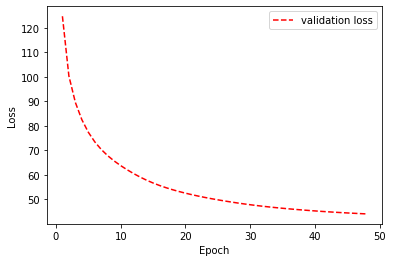

In [41]:
plot_loss("loss.png", history["dev_loss"][:-2],label = "validation loss")

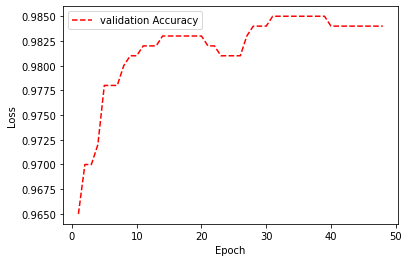

In [42]:
plot_loss("accuracy.png", history["dev_accuracies"][:-2], label='validation Accuracy')

In [43]:
history["dev_accuracies"]

[0.965,
 0.97,
 0.97,
 0.972,
 0.978,
 0.978,
 0.978,
 0.98,
 0.981,
 0.981,
 0.982,
 0.982,
 0.982,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.983,
 0.982,
 0.982,
 0.981,
 0.981,
 0.981,
 0.981,
 0.983,
 0.984,
 0.984,
 0.984,
 0.985,
 0.985,
 0.985,
 0.985,
 0.985,
 0.985,
 0.985,
 0.985,
 0.985,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984,
 0.984]